In [1]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, '/home/bishnu/bishnu/EIC/regressiononly_old/functions')
sys.path.insert(0, '/home/bishnu/bishnu/EIC/regressiononly_old/training')

from Clusterer import *
from plotting import *
from data_functions import *
import pandas as pd
import numpy as np
import compress_pickle as pickle  

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import mplhep as hep
hep.set_style(hep.style.CMS)




def square_root_res( ares, bres):
    result=np.where((ares**2 - bres**2)>0, np.sqrt(ares**2 - bres**2), 0)
    #result=np.sqrt(ares**2 - bres**2)
    return result

2023-11-07 06:33:18.924768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 06:33:19.619478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



Using variable strings ['E', 'X', 'Y', 'Z'] from binning_utils.py



/tmp/ipykernel_2885178/4026874494.py:19: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [29]:
granularity='z_sections'
n_z_sections=4
'/media/miguel/Elements/calice_sim_data/calice_pi+_log10discrete_1Gev_150GeV_5deg_13deg_Fe_09_23_size_6by6_hcal_size'

input_features=4
output_dim=2
'''
############# THIS IS FOR THE DISCRETE DATA INFERENCE #########
path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
discrete_inference'
path_to_result=f'{path}/results_4D_output1D_ECCE_zseg{n_z_sections}'
path_to_stat=f'{path}'
###   FOR CONTINUOUS DATA SET INFERENCE 
pred_file='predictions_appended_discrete_inference.npz'

path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08'
path_to_stat=f'{path}/preprocessed_input4D_output{output_dim}D_ECCE_zseg{n_z_sections}'
pred_file='test_predictions.npz'

if n_z_sections==8:
    block_name='ECCE_20230913-1906_deepsets_4D'
    print('Hello hello ', n_z_sections)
    
elif n_z_sections==32:
    block_name='ECCE_20230913-1923_deepsets_4D'
    print('Hello hello ', n_z_sections)

elif n_z_sections==2:
    block_name='ECCE_20230914-0315_deepsets_4D'
    print('Hello hello ', n_z_sections)  

elif n_z_sections==16:
    block_name='ECCE_20230914-0611_deepsets_4D'
    print('Hello hello ', n_z_sections)    
elif n_z_sections==1:
    block_name='ECCE_20230914-2011_deepsets_4D'
    print('hello', block_name)
elif n_z_sections==4:
    block_name='ECCE_20230918-1837_deepsets_4D'
    print('hello', block_name)    
    
'''    
#path_to_result=f'{path}/results_4D_output1D_ECCE_zseg{n_z_sections}/{block_name}'    
### CALICE 
#path_to_result=f'/media/miguel/Elements/bishnu/calice_sim_data/calice_hcal_only_deepset_models/\
#results_input4D_output2D_Fe_calice_hcalSize/ECCE_20230929-1748_deepsets_4D'
path_to_stat=f'/media/miguel/Elements/bishnu/calice_sim_data/calice_hcal_only_deepset_models/\
preprocessed_input4D_output2D_Fe_calice_hcalSize'  


path_to_result=f'/media/miguel/Elements/bishnu/zdc_models/results_4D_output2D_ZDCFe_zseg32_newThetacut/ECCE_20231011-0025_deepsets_4D'

#pred_file=f'test_predictions.npz'
#pred_file='predictions_appended_calice_hcalSize.npz
pred_file='predictions_appended_zseg32_newThetacut.npz'
#pred_file=f''
def get_1D_inference_from_discrete_data_local( path_to_result, path_to_stat, file=pred_file):

    npz_unpacked = np.load(f'{path_to_result}/{file}')
    print("path_to_result", path_to_result,'     c ', file)

    predictions_arr= npz_unpacked['outputs']
    targets_arr = npz_unpacked['targets']

    #means = pickle.load(f"preprocessed_data/means.p")

    means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'), compression='gzip')
    stdvs = pickle.load(open(f"{path_to_stat}/stdvs.p", 'rb'), compression='gzip')
    
    
    means=1.08664 #1.0594748857606133
    stdvs=0.631086 #0.6590587379489504
    #print(means)
    #print(stdvs)
    
    #targets_ene = 10**(targets_arr*stdvs['genP'] + means['genP'])
    #prediction_ene=10**(predictions_arr*stdvs['genP'] + means['genP'])
    
    targets_ene = 10**(targets_arr*stdvs + means)
    prediction_ene=10**(predictions_arr*stdvs + means)
    
    ### PREDICTED ENERGY
    #prediction_ene=predictions_arr*stdvs['genP'] + means['genP']
    
   
      
    return targets_ene, prediction_ene    



def get_2D_inference_from_discrete_data_local( path_to_result, path_to_stat, file=pred_file):

    npz_unpacked = np.load(f'{path_to_result}/{file}')
    print("path_to_result", path_to_result,'     c ', file)

    #means = pickle.load(f"preprocessed_data/means.p")

    means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'), compression='gzip')
    stdvs = pickle.load(open(f"{path_to_stat}/stdvs.p", 'rb'), compression='gzip')
    
    
    
    predictions_2 = npz_unpacked['outputs_scaled']
    targets_2 = npz_unpacked['targets_scaled']
    

    print(predictions_2.shape, '       ', targets_2.shape)
    ### True ENERGY
    targets_ene_plt = targets_2[:,0]   #*stdvs['genP'] + means['genP']
    #targets_ene_plt = 10**targets_ene

    ### PREDICTED ENERGY
    predictions_ene_plt =predictions_2[:,0]   #*stdvs['genP'] + means['genP']
    #predictions_ene_plt=10**prediction_ene

    ### True Theta
    targets_theta= targets_2[:,1] #*stdvs['theta'] + means['theta']


    ### PREDICTED THETA
    predictions_theta=predictions_2[:,1] #*stdvs['theta'] + means['theta']

   
      
    return targets_ene_plt, predictions_ene_plt, targets_theta, predictions_theta

path_to_result /media/miguel/Elements/bishnu/zdc_models/results_4D_output2D_ZDCFe_zseg32_newThetacut/ECCE_20231011-0025_deepsets_4D      c  predictions_appended_zseg32_newThetacut.npz
(134959, 2)         (134959, 2)


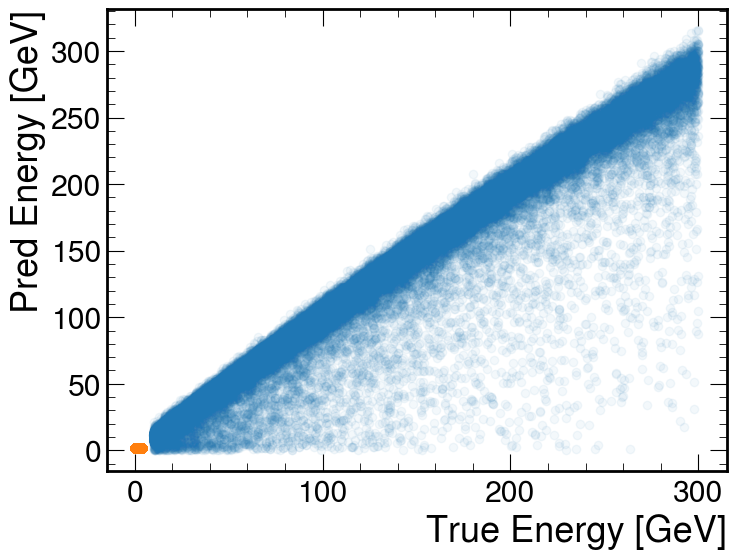

In [33]:
   
target_ene, pred_ene, target_theta, pred_theta=get_2D_inference_from_discrete_data_local( path_to_result, path_to_stat)


mask=target_ene>-1
pred_ene_mask=pred_ene[mask]
target_ene_mask=target_ene[mask] 
fig = plt.figure(figsize=(8, 6))
plt.scatter(target_ene, pred_ene , alpha=0.05)
plt.xlabel('True Energy [GeV]')
plt.ylabel('Pred Energy [GeV]')
#plt.ylim(0,310)
#plt.xlim(0.75, 2)






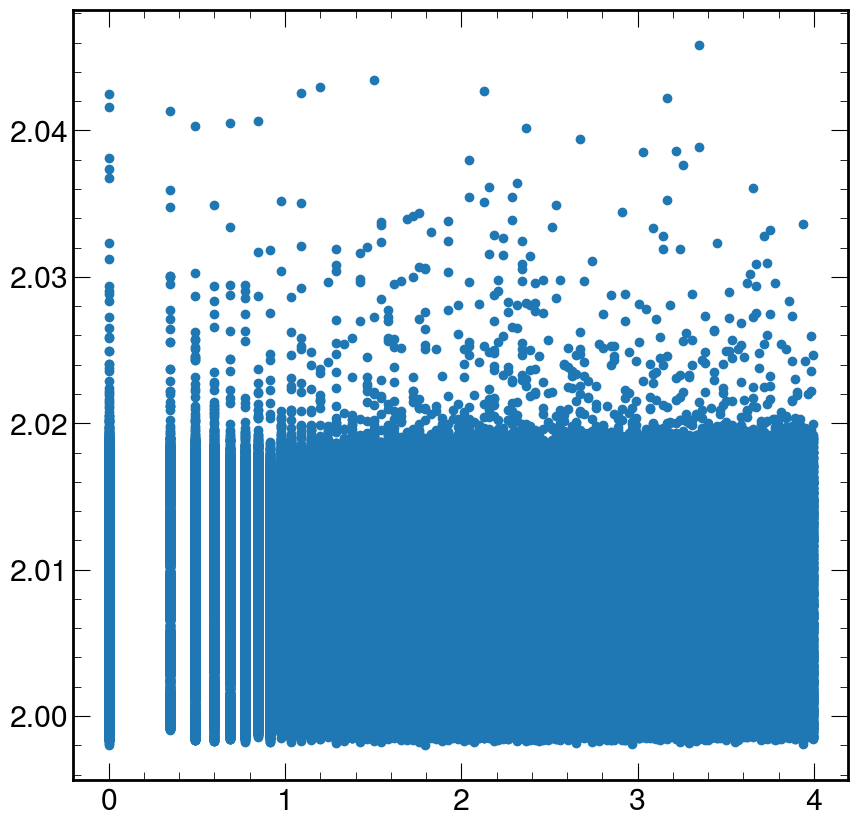

In [34]:
plt.scatter(target_theta,  pred_theta)

In [ ]:
nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='discrete'
a
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False

if data_type=='continuous':
    min_val=2
    max_val=130
    Nbins=26
    binning=np.linspace(min_val, max_val, Nbins)
elif data_type=='discrete':
    binning=[ 2, 3, 4, 5, 7, 8, 10, 12, 15, 18, 22, 27, 33, 41, 50, 60, 74,90, 109, 133, 150]

#resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,\
#slices_pred_truth,res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(target_ene,pred_ene,
#                                                    binning, nbins,data_type, particle, 'energy', fit_dist)

resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(target_ene_mask,pred_ene_mask, binning, nbins, data_type, particle, 'energy', fit=True, plot_range=0.6)

In [14]:
approach='ds_'
particle_detector=f'Input{input_features}D_{n_z_sections}Z'
particle_detector=f'Input{input_features}D_{output_dim}D'
name_tag=f'ds_{output_dim}D_output_'
particle='pp'

true_fit=np.round(true_fit, 2)    
print_parameter(true_fit, approach +'energy',particle_detector ) 
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )

ds_energy_Input4D_2D=np. array([  1.56,   3.  ,   4.  ,   5.45,   7.  ,   8.46,  10.47,  12.95,
        15.94,  19.47,  23.93,  29.39,  36.36,  44.87,  54.37,  66.31,
        81.24,  98.62, 120.01, 140.84])
ds_res_fit_Input4D_2D=np. array([0.278574, 0.23104 , 0.185586, 0.154374, 0.130422, 0.125763,
       0.114436, 0.102154, 0.093807, 0.087076, 0.079981, 0.071685,
       0.066938, 0.063458, 0.060923, 0.05809 , 0.057267, 0.056471,
       0.056845, 0.059434])
ds_scale_median_Input4D_2D=np. array([1.149183, 0.976687, 0.990437, 0.987131, 0.983192, 0.985645,
       0.989734, 0.994599, 0.996559, 0.999271, 0.997307, 0.998826,
       1.000338, 1.000736, 1.001628, 1.005018, 1.008293, 1.00801 ,
       0.997781, 0.978427])


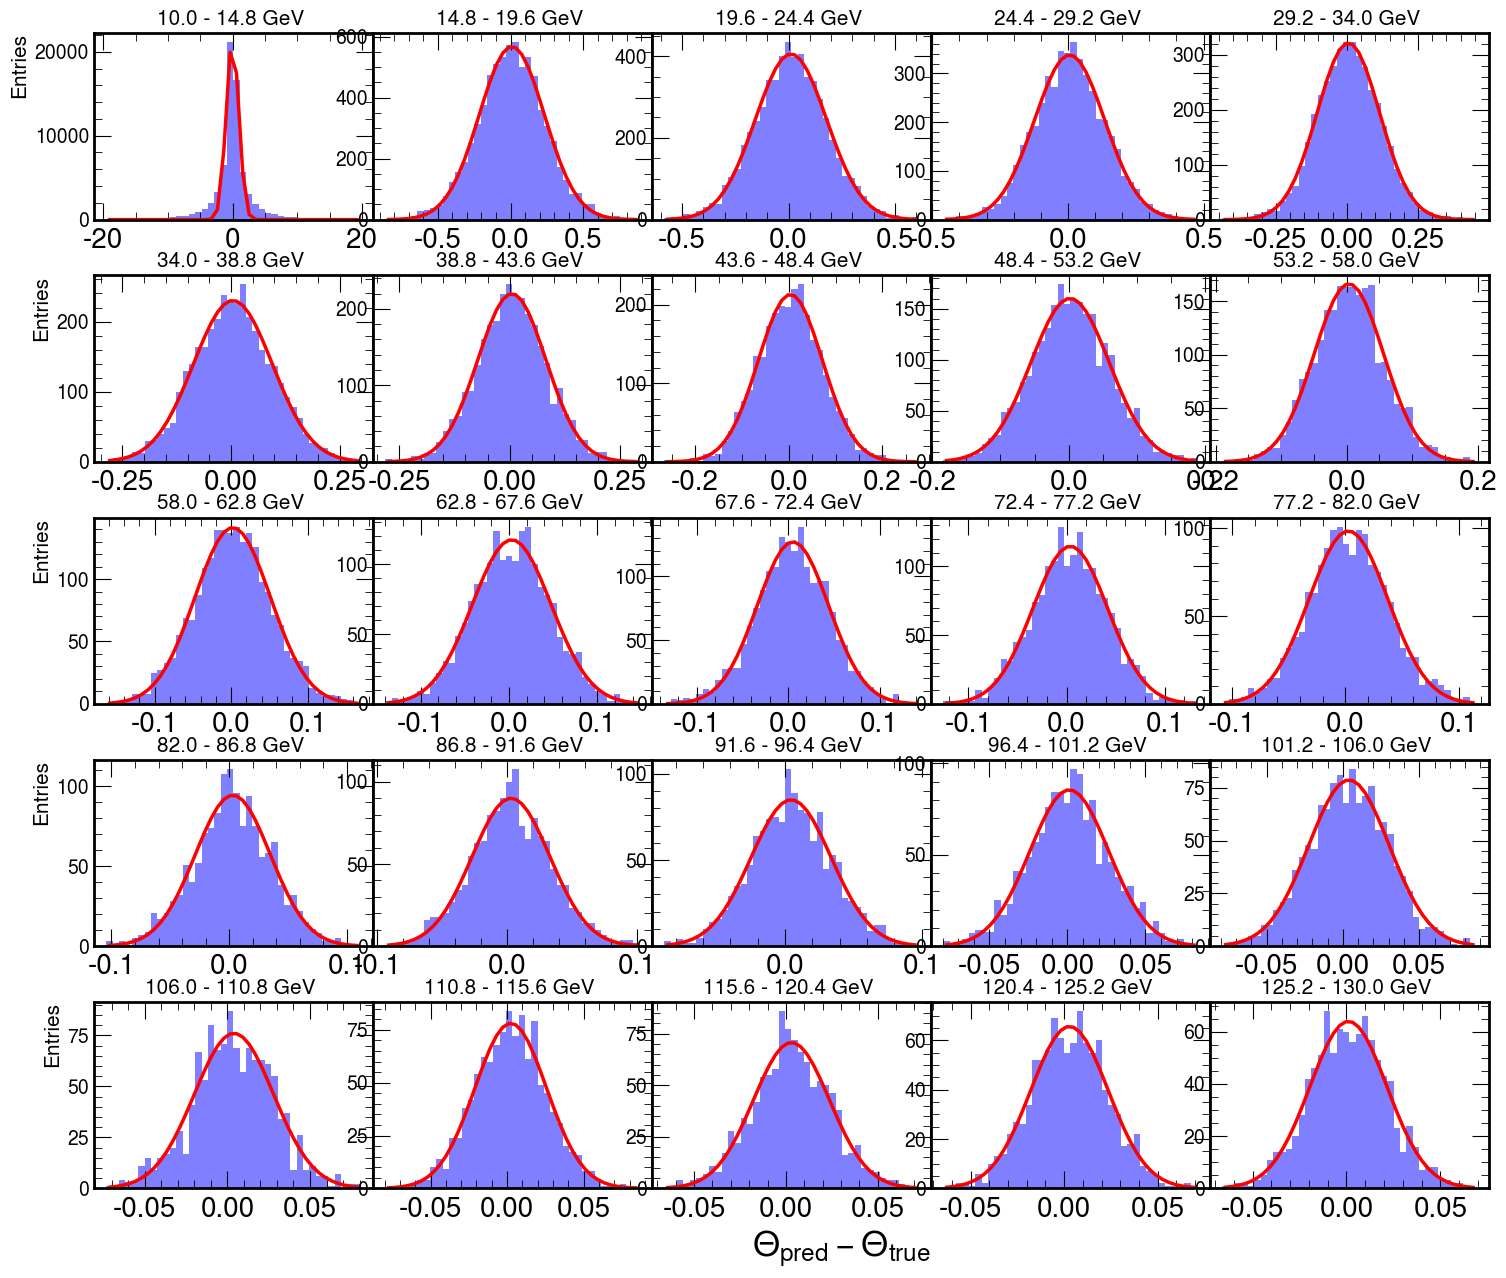

In [18]:
nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='continuous'
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=10
max_val=130
Nbins=26
binning=np.linspace(min_val, max_val, Nbins)
#targets_ene_plt, predictions_ene_plt, targets_theta, predictions_theta
theta_pred_true_over_true=(pred_theta - target_theta)  
#plt.scatter(targets_theta_plt, prediction_theta_plt, alpha=0.05)
#target_ene, pred_ene, target_theta, pred_theta
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(target_ene,theta_pred_true_over_true, binning, nbins, data_type, particle, 'theta-energy', fit=True, plot_range=0.6)

Text(0, 1, 'Resolution ')

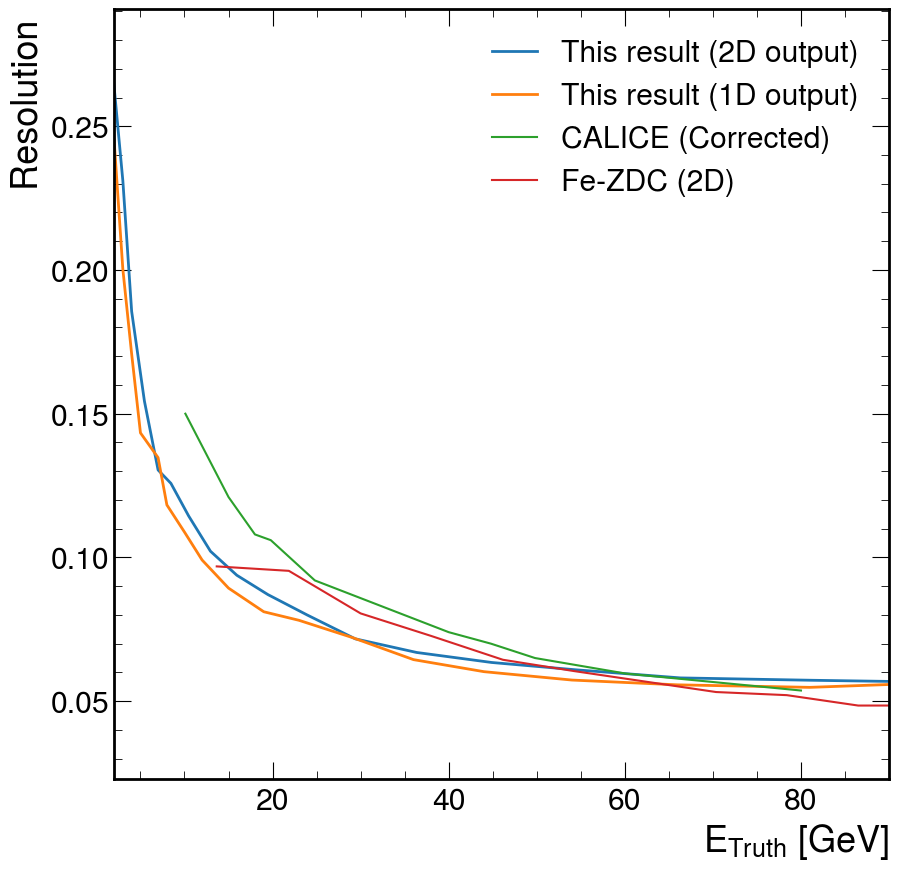

In [18]:

ds_energy_calice_Fedis_try=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  19.,
        23.,  29.,  36.,  44.,  54.,  66.,  81.,  98., 120.])
ds_res_fit_calice_Fedis_try=np. array([0.13852 , 0.24548 , 0.200248, 0.170773, 0.143326, 0.134712,
       0.118264, 0.108813, 0.099094, 0.089329, 0.081104, 0.078126,
       0.072189, 0.064448, 0.06026 , 0.057339, 0.055674, 0.0548  ,
       0.056687, 0.054403])
ds_scale_median_calice_Fedis_try=np. array([1.259423, 0.930573, 0.96828 , 0.984156, 0.989253, 0.994203,
       0.99087 , 0.991304, 0.99927 , 0.99555 , 0.996384, 1.001946,
       1.00284 , 1.0023  , 1.001465, 1.001094, 1.003411, 1.00529 ,
       1.005082, 1.004378])


ds_energy_Input4D_output2D_ZdcFe=np. array([ 13.66,  21.85,  30.  ,  38.03,  46.15,  54.2 ,  62.3 ,  70.36,
        78.39,  86.5 ,  94.49, 102.52, 110.66, 118.7 , 126.78, 134.82,
       142.87, 150.91, 158.95, 166.97, 175.19, 183.12, 191.37, 199.26,
       207.51, 215.33, 223.35, 231.48, 239.64, 247.73, 255.64, 263.81,
       271.73, 279.99, 287.88, 295.86])
ds_res_fit_Input4D_output2D_ZdcFe=np. array([0.096879, 0.095334, 0.080522, 0.072665, 0.064404, 0.060479,
       0.05682 , 0.053172, 0.05209 , 0.04847 , 0.04849 , 0.047058,
       0.043761, 0.043619, 0.042189, 0.041271, 0.042279, 0.038907,
       0.039308, 0.038525, 0.039479, 0.038831, 0.038143, 0.036598,
       0.037763, 0.039501, 0.03849 , 0.03715 , 0.039366, 0.036931,
       0.035057, 0.038091, 0.039369, 0.040198, 0.039752, 0.041683])
ds_scale_median_Input4D_output2D_ZdcFe=np. array([1.017114, 0.993721, 0.998943, 1.000682, 1.001505, 1.002168,
       1.002572, 1.001848, 1.00036 , 1.000509, 1.002899, 1.002123,
       1.000958, 1.005545, 1.003793, 1.00279 , 1.003036, 1.006434,
       1.004404, 1.004935, 1.005553, 1.005806, 1.002008, 1.006504,
       1.002932, 1.001516, 1.001382, 1.000184, 0.999009, 1.002433,
       1.002318, 0.996216, 0.995664, 0.994088, 0.989636, 0.986223])


ds_energy_Input4D_2D_dis=np. array([  1.56,   3.  ,   4.  ,   5.45,   7.  ,   8.46,  10.47,  12.95,
        15.94,  19.47,  23.93,  29.39,  36.36,  44.87,  54.37,  66.31,
        81.24,  98.62, 120.01, 140.84])
ds_res_fit_Input4D_2D_dis=np. array([0.278574, 0.23104 , 0.185586, 0.154374, 0.130422, 0.125763,
       0.114436, 0.102154, 0.093807, 0.087076, 0.079981, 0.071685,
       0.066938, 0.063458, 0.060923, 0.05809 , 0.057267, 0.056471,
       0.056845, 0.059434])
ds_scale_median_Input4D_2D_dis=np. array([1.149183, 0.976687, 0.990437, 0.987131, 0.983192, 0.985645,
       0.989734, 0.994599, 0.996559, 0.999271, 0.997307, 0.998826,
       1.000338, 1.000736, 1.001628, 1.])
### CALICE CORRECTED GLOBAL SC
ene_calice_corr_pm=[10.1, 15.0, 18.0, 19.8, 24.8, 35.1, 40.0, 44.8, 49.8, 60.1, 80.0]
res_calice_corr_pm=[0.150, 0.121, 0.108, 0.106, 0.0920, 0.0798, 0.0740, 0.0700, 0.0650, 0.0596, 0.0537]
                                          
plt.errorbar(ds_energy_Input4D_2D_dis, ds_res_fit_Input4D_2D_dis , linewidth=2, label='This result (2D output)' )
plt.errorbar(ds_energy_calice_Fedis_try, ds_res_fit_calice_Fedis_try, linewidth=2, label='This result (1D output)' )
plt.errorbar(ene_calice_corr_pm, res_calice_corr_pm, label='CALICE (Corrected)')
plt.errorbar(ds_energy_Input4D_output2D_ZdcFe, ds_res_fit_Input4D_output2D_ZdcFe, label='Fe-ZDC (2D)')

plt.legend()
plt.xlim(2, 90)
plt.xlabel('$E_{Truth}$ [GeV]')
plt.ylabel('Resolution ')

In [16]:
## Z segmentation with ECAL and HCAL 

#################### 1Z ##########################
ds_energy_Input4D_1Z=np. array([  3.18,   9.45,  14.65,  19.8 ,  24.96,  30.1 ,  35.25,  40.34,
        45.5 ,  50.58,  55.74,  60.83,  65.98,  71.1 ,  76.22,  81.35,
        86.41,  91.56,  96.68, 101.84, 106.9 , 112.04, 117.15, 122.28,
       127.44])

ds_res_fit_Input4D_1Z=np. array([0.211584, 0.168914, 0.14409 , 0.128176, 0.120832, 0.114701,
       0.10827 , 0.110626, 0.104947, 0.105057, 0.099757, 0.100591,
       0.097525, 0.095357, 0.101896, 0.098002, 0.092924, 0.089962,
       0.092673, 0.084974, 0.081939, 0.085741, 0.085208, 0.077516,
       0.069848])
ds_scale_median_Input4D_1Z=np. array([1.022383, 0.995111, 0.993661, 0.997463, 1.000113, 1.00173 ,
       1.002295, 0.999831, 1.001306, 1.002504, 1.002341, 1.001482,
       1.000365, 1.004903, 1.00444 , 1.007303, 1.00859 , 1.008598,
       1.005761, 1.007346, 1.008668, 0.998806, 0.997698, 0.996075,
       0.994738])

####################END OF 1Z ##########################

#################### 2Z ##########################
ds_energy_Input4D_2Z=np. array([  3.18,   9.45,  14.65,  19.8 ,  24.96,  30.1 ,  35.25,  40.34,
        45.5 ,  50.58,  55.74,  60.83,  65.98,  71.1 ,  76.22,  81.35,
        86.41,  91.56,  96.68, 101.84, 106.9 , 112.04, 117.15, 122.28,
       127.44])
ds_res_fit_Input4D_2Z=np. array([0.208568, 0.163967, 0.138121, 0.123635, 0.115076, 0.109822,
       0.104213, 0.104925, 0.101359, 0.100878, 0.097378, 0.094403,
       0.093071, 0.095193, 0.090358, 0.085481, 0.08771 , 0.088866,
       0.088378, 0.086999, 0.08611 , 0.083802, 0.084845, 0.076811,
       0.069907])
ds_scale_median_Input4D_2Z=np. array([1.018746, 0.993364, 0.990798, 0.994686, 0.998259, 0.997898,
       0.998178, 0.996419, 0.999125, 0.999549, 1.001006, 1.001007,
       1.000014, 1.00479 , 1.001871, 1.003798, 1.005955, 1.000911,
       1.000008, 1.001733, 1.005288, 0.999166, 0.998105, 0.998197,
       0.995746])

ds_energy_Input4D_4Z=np. array([  3.18,   9.45,  14.65,  19.8 ,  24.96,  30.1 ,  35.25,  40.34,
        45.5 ,  50.58,  55.74,  60.83,  65.98,  71.1 ,  76.22,  81.35,
        86.41,  91.56,  96.68, 101.84, 106.9 , 112.04, 117.15, 122.28,
       127.44])
ds_res_fit_Input4D_4Z=np. array([0.203169, 0.149674, 0.127098, 0.110628, 0.101928, 0.098581,
       0.093431, 0.092118, 0.089829, 0.090409, 0.08485 , 0.083388,
       0.082121, 0.084912, 0.082172, 0.079835, 0.079572, 0.079635,
       0.083232, 0.080304, 0.080108, 0.082095, 0.078627, 0.069297,
       0.066974])
ds_scale_median_Input4D_4Z=np. array([1.015438, 0.99166 , 0.993113, 0.996899, 0.998827, 0.997784,
       1.000029, 0.996675, 0.99802 , 0.999241, 0.999225, 1.000517,
       1.001949, 1.004203, 1.002812, 1.006138, 1.008103, 1.001987,
       1.007766, 1.004864, 1.009989, 1.006036, 1.005327, 1.004856,
       0.998343])
#################### 8Z ##########################
ds_energy_Input4D_8Z=np. array([  3.18,   9.45,  14.65,  19.8 ,  24.96,  30.1 ,  35.25,  40.34,
        45.5 ,  50.58,  55.74,  60.83,  65.98,  71.1 ,  76.22,  81.35,
        86.41,  91.56,  96.68, 101.84, 106.9 , 112.04, 117.15, 122.28,
       127.44])
ds_res_fit_Input4D_8Z=np. array([0.194354, 0.133767, 0.109717, 0.096782, 0.088572, 0.082851,
       0.076982, 0.075898, 0.072119, 0.07229 , 0.070208, 0.069751,
       0.067529, 0.068376, 0.06292 , 0.066372, 0.065605, 0.065087,
       0.067468, 0.06587 , 0.066324, 0.064122, 0.064578, 0.060042,
       0.056248])
ds_scale_median_Input4D_8Z=np. array([1.013852, 0.99449 , 0.994738, 0.997474, 1.000075, 1.001533,
       1.001168, 1.000377, 1.000922, 1.003372, 1.002058, 1.001756,
       1.00178 , 1.004808, 1.00314 , 1.00385 , 1.004636, 1.003487,
       1.004177, 1.005462, 1.008757, 1.007144, 1.008415, 1.006564,
       1.001114])

#################### 16Z ##########################
ds_energy_Input4D_16Z=np. array([  3.18,   9.45,  14.65,  19.8 ,  24.96,  30.1 ,  35.25,  40.34,
        45.5 ,  50.58,  55.74,  60.83,  65.98,  71.1 ,  76.22,  81.35,
        86.41,  91.56,  96.68, 101.84, 106.9 , 112.04, 117.15, 122.28,
       127.44])
ds_res_fit_Input4D_16Z=np. array([0.186977, 0.124779, 0.102914, 0.088418, 0.080058, 0.075782,
       0.071025, 0.065773, 0.065937, 0.0637  , 0.062994, 0.060583,
       0.061129, 0.060568, 0.059576, 0.058546, 0.05791 , 0.055207,
       0.059011, 0.057165, 0.058507, 0.058014, 0.057802, 0.05415 ,
       0.053148])
ds_scale_median_Input4D_16Z=np. array([1.009958, 0.990496, 0.993613, 0.998917, 0.999336, 0.999849,
       1.001392, 1.001793, 1.001711, 1.002233, 0.999349, 0.999924,
       1.00249 , 1.003944, 1.004052, 1.005905, 1.00753 , 1.005317,
       1.008707, 1.007631, 1.007928, 1.008067, 1.006146, 1.003672,
       1.003933])

#################### 32Z ##########################
ds_energy_Input4D_32Z=np. array([  3.18,   9.45,  14.65,  19.8 ,  24.96,  30.1 ,  35.25,  40.34,
        45.5 ,  50.58,  55.74,  60.83,  65.98,  71.1 ,  76.22,  81.35,
        86.41,  91.56,  96.68, 101.84, 106.9 , 112.04, 117.15, 122.28,
       127.44])
ds_res_fit_Input4D_32Z=np. array([0.18513 , 0.122679, 0.099654, 0.087032, 0.078053, 0.074655,
       0.070087, 0.065111, 0.063819, 0.061252, 0.062269, 0.060167,
       0.060394, 0.057846, 0.055923, 0.055964, 0.056246, 0.055584,
       0.056995, 0.056783, 0.054897, 0.055584, 0.051179, 0.050047,
       0.048185])
ds_scale_median_Input4D_32Z=np. array([1.011759, 0.993568, 0.994489, 0.998283, 1.000222, 1.002021,
       1.002101, 1.000006, 0.999465, 0.99986 , 0.99744 , 0.99772 ,
       1.000772, 1.001934, 1.002178, 1.001865, 1.005244, 1.003465,
       1.006599, 1.0059  , 1.008626, 1.005697, 1.005307, 1.00368 ,
       1.000035])

#################### 64Z ##########################
ds_energy_Input4D_64Z=np. array([  3.18,   9.46,  14.65,  19.8 ,  24.96,  30.09,  35.25,  40.37,
        45.44,  50.59,  55.73,  60.85,  65.97,  71.11,  76.19,  81.34,
        86.45,  91.6 ,  96.69, 101.86, 106.93, 112.01, 117.19, 122.31,
       127.43])
ds_res_fit_Input4D_64Z=np. array([0.166083, 0.110079, 0.091843, 0.079921, 0.071572, 0.066311,
       0.062452, 0.058659, 0.057269, 0.053776, 0.05138 , 0.049164,
       0.047767, 0.047729, 0.046442, 0.044711, 0.044001, 0.044736,
       0.04325 , 0.044431, 0.043283, 0.043172, 0.043446, 0.043263,
       0.041825])
ds_scale_median_Input4D_64Z=np. array([1.007683, 0.993125, 0.994919, 0.995349, 0.997715, 0.998074,
       0.997158, 0.997483, 0.999594, 0.998955, 0.998935, 0.999344,
       1.00146 , 0.99991 , 0.999894, 1.00047 , 1.000749, 1.000366,
       1.000126, 1.000413, 1.001051, 1.002388, 1.000237, 1.001909,
       1.001581])


################# ECCE STRAWMAN WITH AND WITHOUT FITTING THE PARAMETER 

straw_energy_ecal_hcal_ECCE_noFit=np. array([ 3.18,   9.46,  14.65,  19.8 ,  24.96,  30.09,  35.25,  40.37,
        45.44,  50.59,  55.73,  60.85,  65.97,  71.11,  76.19,  81.34,
        86.45,  91.6 ,  96.69, 101.86, 106.93, 112.01, 117.19, 122.31,
       127.43 ])
straw_res_fit_ecal_hcal_ECCE_noFit=np. array([0.336119, 0.254256, 0.227318, 0.226276, 0.218089, 0.205398,
       0.199659, 0.199185, 0.198225, 0.18949 , 0.196598, 0.194898,
       0.194327, 0.192281, 0.194713, 0.188557, 0.180066, 0.183329,
       0.192622, 0.192182, 0.195309, 0.184287, 0.190353, 0.176846,
       0.195394])
straw_scale_median_ecal_hcal_ECCE_noFit=np. array([0.671248, 0.729888, 0.74884 , 0.756633, 0.75853 , 0.773633,
       0.77193 , 0.776325, 0.770256, 0.782826, 0.774026, 0.77417 ,
       0.785979, 0.775975, 0.776483, 0.784657, 0.784334, 0.783166,
       0.781943, 0.767975, 0.773234, 0.773936, 0.778074, 0.78337 ,
       0.76931 ])


#### NOW 1D 2D AND 4D HITS WITH THE GRAPHNET AND DEEPSETS
### CALICE UNCORRECTED
ene_calice_uncorr_pm=[9.85, 14.8, 17.9, 20.0, 24.9, 34.9, 39.8, 45.0, 49.9, 59.8, 79.9]
res_calice_uncorr_pm=[0.174, 0.147, 0.133, 0.131, 0.118, 0.0980, 0.0945, 0.0895, 0.083, 0.0760, 0.0646]

### CALICE CORRECTED GLOBAL SC
ene_calice_corr_pm=[10.1, 15.0, 18.0, 19.8, 24.8, 35.1, 40.0, 44.8, 49.8, 60.1, 80.0]
res_calice_corr_pm=[0.150, 0.121, 0.108, 0.106, 0.0920, 0.0798, 0.0740, 0.0700, 0.0650, 0.0596, 0.0537]


ds_energy_4D_piyush=np. array([  3.18,   9.46,  14.65,  19.8 ,  24.96,  30.09,  35.25,  40.37,
        45.44,  50.59,  55.73,  60.85,  65.97,  71.11,  76.19,  81.34,
        86.45,  91.6 ,  96.69, 101.86, 106.93, 112.01, 117.19, 122.31,
       127.43])
ds_res_fit_4D_piyush=np. array([0.166083, 0.110079, 0.091843, 0.079921, 0.071572, 0.066311,
       0.062452, 0.058659, 0.057269, 0.053776, 0.05138 , 0.049164,
       0.047767, 0.047729, 0.046442, 0.044711, 0.044001, 0.044736,
       0.04325 , 0.044431, 0.043283, 0.043172, 0.043446, 0.043263,
       0.041825])
ds_scale_median_4D_piyush=np. array([1.007683, 0.993125, 0.994919, 0.995349, 0.997715, 0.998074,
       0.997158, 0.997483, 0.999594, 0.998955, 0.998935, 0.999344,
       1.00146 , 0.99991 , 0.999894, 1.00047 , 1.000749, 1.000366,
       1.000126, 1.000413, 1.001051, 1.002388, 1.000237, 1.001909,
       1.001581])

ds_energy_2D_piyush=np. array([  3.18,   9.46,  14.65,  19.8 ,  24.96,  30.09,  35.25,  40.37,
        45.44,  50.59,  55.73,  60.85,  65.97,  71.11,  76.19,  81.34,
        86.45,  91.6 ,  96.69, 101.86, 106.93, 112.01, 117.19, 122.31,
       127.43])
ds_res_fit_2D_piyush=np. array([0.166645, 0.111808, 0.093696, 0.080422, 0.072777, 0.068041,
       0.063975, 0.058972, 0.057782, 0.055385, 0.05288 , 0.050889,
       0.048821, 0.048806, 0.047168, 0.046885, 0.045312, 0.045507,
       0.045934, 0.046241, 0.045398, 0.043865, 0.044307, 0.044886,
       0.043261])
ds_scale_median_2D_piyush=np. array([1.009183, 0.993487, 0.995457, 0.995953, 0.997618, 0.998517,
       0.999238, 0.999937, 0.999987, 0.999709, 1.001088, 1.001032,
       1.001229, 0.999552, 1.000477, 1.000892, 1.001609, 1.001965,
       1.000455, 1.000638, 1.000733, 1.002735, 1.001256, 1.002085,
       1.000621])

ds_energy_1D_piyush=np. array([  3.18,   9.46,  14.65,  19.8 ,  24.96,  30.09,  35.25,  40.37,
        45.44,  50.59,  55.73,  60.85,  65.97,  71.11,  76.19,  81.34,
        86.45,  91.6 ,  96.69, 101.86, 106.93, 112.01, 117.19, 122.31,
       127.43])
ds_res_fit_1D_piyush=np. array([0.187244, 0.145597, 0.12248 , 0.108556, 0.098279, 0.089091,
       0.087449, 0.079708, 0.079985, 0.074787, 0.07179 , 0.072971,
       0.069556, 0.066812, 0.067999, 0.067443, 0.067116, 0.066629,
       0.063819, 0.066046, 0.065638, 0.060455, 0.061573, 0.059987,
       0.057317])
ds_scale_median_1D_piyush=np. array([1.016407, 0.994673, 0.996138, 0.996333, 0.999177, 1.001068,
       0.99946 , 1.001967, 1.000293, 1.001145, 1.003277, 1.001926,
       1.003116, 1.000447, 1.001437, 1.002231, 1.001623, 1.001794,
       0.999334, 1.001233, 1.002668, 1.004164, 1.004094, 1.002287,
       0.999563])



graph_energy_4D_piyush=np. array([  3.18,   9.46,  14.65,  19.8 ,  24.96,  30.09,  35.25,  40.37,
        45.44,  50.59,  55.73,  60.85,  65.97,  71.11,  76.19,  81.34,
        86.45,  91.6 ,  96.69, 101.86, 106.93, 112.01, 117.19, 122.31,
       127.43])
graph_res_fit_4D_piyush=np. array([0.149907, 0.094185, 0.078478, 0.068657, 0.062905, 0.05877 ,
       0.05566 , 0.05168 , 0.049818, 0.047612, 0.046304, 0.044074,
       0.042914, 0.043401, 0.041084, 0.041829, 0.040508, 0.041367,
       0.040632, 0.04203 , 0.040811, 0.039437, 0.040183, 0.041237,
       0.039323])
graph_scale_median_4D_piyush=np. array([1.004961, 0.995553, 0.997076, 0.997328, 0.998506, 0.998811,
       0.999134, 0.998612, 0.999468, 0.999185, 0.999978, 1.000527,
       1.000905, 0.998842, 0.99941 , 0.999578, 1.00032 , 1.001556,
       1.000421, 0.99952 , 0.999815, 1.000308, 1.000145, 1.000289,
       1.000103])



ratio_rel_to_1DDS_from_1D_ds=square_root_res(ds_res_fit_1D_piyush, ds_res_fit_1D_piyush)
ratio_rel_to_1DDS_from_2D_ds=square_root_res(ds_res_fit_1D_piyush, ds_res_fit_2D_piyush)
ratio_rel_to_1DDS_from_4D_ds=square_root_res(ds_res_fit_1D_piyush, ds_res_fit_4D_piyush)
ratio_rel_to_1DDS_from_4D_gnn=square_root_res(ds_res_fit_1D_piyush, graph_res_fit_4D_piyush)


### GET THE RESOLTUION RELATIVE TO THE 1Z SEGMENTATION
ratio_rel_to_1_from1=square_root_res( ds_res_fit_Input4D_1Z, ds_res_fit_Input4D_1Z)

ratio_rel_to_1_from2=square_root_res(ds_res_fit_Input4D_1Z, ds_res_fit_Input4D_2Z)
ratio_rel_to_1_from4=square_root_res(ds_res_fit_Input4D_1Z, ds_res_fit_Input4D_4Z)
ratio_rel_to_1_from8=square_root_res(ds_res_fit_Input4D_1Z, ds_res_fit_Input4D_8Z)
ratio_rel_to_1_from16=square_root_res(ds_res_fit_Input4D_1Z, ds_res_fit_Input4D_16Z)
ratio_rel_to_1_from32=square_root_res(ds_res_fit_Input4D_1Z, ds_res_fit_Input4D_32Z)
ratio_rel_to_1_from64=square_root_res(ds_res_fit_Input4D_1Z, ds_res_fit_Input4D_64Z)
print(ratio_rel_to_1_from2)



'''
### This is from the discrete data set 
## 1D deepsets#####
ds_energy_1D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_1D_piyush=np. array([0.237299, 0.208636, 0.196307, 0.181649, 0.168228, 0.157109,
       0.146026, 0.134882, 0.120319, 0.112107, 0.103063, 0.093275,
       0.087698, 0.080394, 0.075144, 0.071222, 0.067517, 0.065226,
       0.064975, 0.053601])
ds_scale_median_1D_piyush=np. array([0.97896 , 0.995032, 0.991876, 0.99185 , 0.988618, 0.994128,
       0.990392, 0.994048, 0.996182, 0.996979, 0.998218, 1.000313,
       0.999235, 1.000373, 1.001333, 1.001872, 1.00228 , 1.001383,
       1.003553, 0.998134])

## 2D Deepsets #####
ds_energy_2D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_2D_piyush=np. array([0.21601 , 0.187788, 0.166659, 0.149615, 0.132334, 0.12297 ,
       0.110728, 0.102695, 0.091899, 0.083294, 0.075993, 0.069369,
       0.064367, 0.059433, 0.054824, 0.050619, 0.047847, 0.046343,
       0.044921, 0.040494])
ds_scale_median_2D_piyush=np. array([0.975173, 0.986678, 0.98762 , 0.989685, 0.989581, 0.991298,
       0.989249, 0.994719, 0.995072, 0.996142, 0.996767, 0.998563,
       0.997451, 1.000381, 1.000945, 0.999761, 0.999902, 1.002389,
       1.001638, 1.001654])

## 4D Deepsets #####
ds_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_4D_piyush=np. array([0.214297, 0.189506, 0.16531 , 0.15202 , 0.12893 , 0.121123,
       0.108781, 0.100069, 0.090362, 0.082286, 0.075196, 0.06798 ,
       0.062594, 0.058485, 0.053639, 0.050004, 0.0471  , 0.044577,
       0.043786, 0.039804])
ds_scale_median_4D_piyush=np. array([0.976951, 0.985615, 0.989044, 0.989917, 0.98992 , 0.990864,
       0.989973, 0.995482, 0.994417, 0.995705, 0.995961, 0.99777 ,
       0.996169, 0.99825 , 0.999461, 0.998633, 1.000228, 1.000437,
       1.001119, 1.001662])
       
       
       

## 4D graph #####
graph_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
graph_res_fit_4D_piyush=np. array([0.200242, 0.169721, 0.14801 , 0.134654, 0.112682, 0.10604 ,
       0.095394, 0.08696 , 0.079006, 0.071803, 0.066224, 0.060836,
       0.057117, 0.052062, 0.048421, 0.044854, 0.043011, 0.041739,
       0.039855, 0.038486])
graph_scale_median_4D_piyush=np. array([0.983676, 0.987915, 0.987713, 0.990477, 0.990704, 0.992832,
       0.992831, 0.997063, 0.995847, 0.997023, 0.99829 , 0.998026,
       0.996847, 0.999621, 1.00032 , 0.998911, 1.000095, 1.00054 ,
       1.000383, 1.001598])
######   Below is from  IS FROM CONTINUOUS DATA SET. #################




straw_res_fit_ecal_hcal_ECCE_noFit=np. array([0.49569 , 0.36807 , 0.331013, 0.327877, 0.32336 , 0.299758,
       0.281544, 0.296442, 0.297384, 0.27244 , 0.291885, 0.29637 ,
       0.271185, 0.283252, 0.277882, 0.271621, 0.265437, 0.27613 ,
       0.277771, 0.295988, 0.282015, 0.264569, 0.275197, 0.265031,
       0.282735])

'''








[0.03559745 0.04058032 0.04104287 0.03381529 0.03684951 0.03309755
 0.02936058 0.03505505 0.02720709 0.02933603 0.02165604 0.03473648
 0.02913614 0.00559019 0.04709805 0.0479311  0.03068918 0.01399984
 0.02788573 0.         0.         0.0181313  0.0078568  0.01043075
 0.        ]


/tmp/ipykernel_2885178/4026874494.py:25: RuntimeWarning: invalid value encountered in sqrt
  result=np.where((ares**2 - bres**2)>0, np.sqrt(ares**2 - bres**2), 0)


'\n### This is from the discrete data set \n## 1D deepsets#####\nds_energy_1D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,\n        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])\nds_res_fit_1D_piyush=np. array([0.237299, 0.208636, 0.196307, 0.181649, 0.168228, 0.157109,\n       0.146026, 0.134882, 0.120319, 0.112107, 0.103063, 0.093275,\n       0.087698, 0.080394, 0.075144, 0.071222, 0.067517, 0.065226,\n       0.064975, 0.053601])\nds_scale_median_1D_piyush=np. array([0.97896 , 0.995032, 0.991876, 0.99185 , 0.988618, 0.994128,\n       0.990392, 0.994048, 0.996182, 0.996979, 0.998218, 1.000313,\n       0.999235, 1.000373, 1.001333, 1.001872, 1.00228 , 1.001383,\n       1.003553, 0.998134])\n\n## 2D Deepsets #####\nds_energy_2D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,\n        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])\nds_res_fit_2D_piyush=np. array([0.21601 , 0.187788, 0.166659, 0.1496

In [25]:
def get_resolution_fit_terms(energies, resolutions,  xpos, ypos, text_size, title, xlabel, ylabel):
    #energy_all=np.array(energies)
    #resolution_all=np.array(resolutions)
    #mask=np.logical_and(energy_all>energy_lim[0] , energy_all<energy_lim[1])
    #energy=energy_all[mask]
    #resolution=resolution_all[mask]
    p0=[0.5,0.5,0.1]
    plt.errorbar(energies, resolutions , marker='o', linestyle='None')
    plt.xlabel(xlabel,  fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    
    popt, pcov = curve_fit(fit_resolution_curve, energies, resolutions)
    plt.plot(energies, fit_resolution_curve(energies, *popt), color='red', linewidth=2.5, label=r'Fit to Insert data')
    stochastic_term, const_term=popt
    plt.text(xpos, ypos, f'$\sigma/E $ =  {stochastic_term:.2f}/$\sqrt{{E}} \quad \oplus$ {const_term:.2e} ', fontsize=text_size)     
    
    #goodness_of_fit=chi_sq #/dof
    plt.title(title, fontsize=20) 
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

DeepSets, 1D ouput, 32Z segments (4D) HCAL (4W_64Fe) + ECAL 


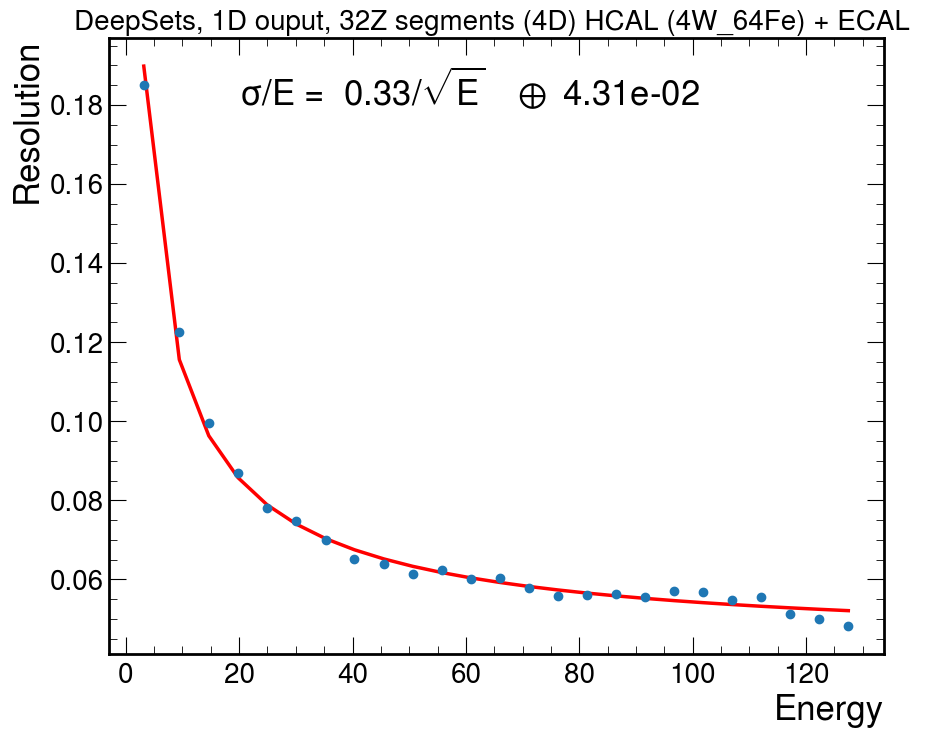

In [40]:
xpos=20
ypos=0.18
text_size=25
last_term=False
energy_lim=[15, 300]
label='DeepSets, 1D ouput, 32Z segments (4D) HCAL (4W_64Fe) + ECAL ' #', '2D']
xlabel="Energy"
ylabel="Resolution"
X_ene=ds_energy_Input4D_32Z 
Y_res=ds_res_fit_Input4D_32Z 
fig = plt.figure(figsize=(10, 8)) 
title=label
print(title)

get_resolution_fit_terms(X_ene,Y_res, xpos, ypos, text_size, title, \
                         xlabel, ylabel)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Default color cycle: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


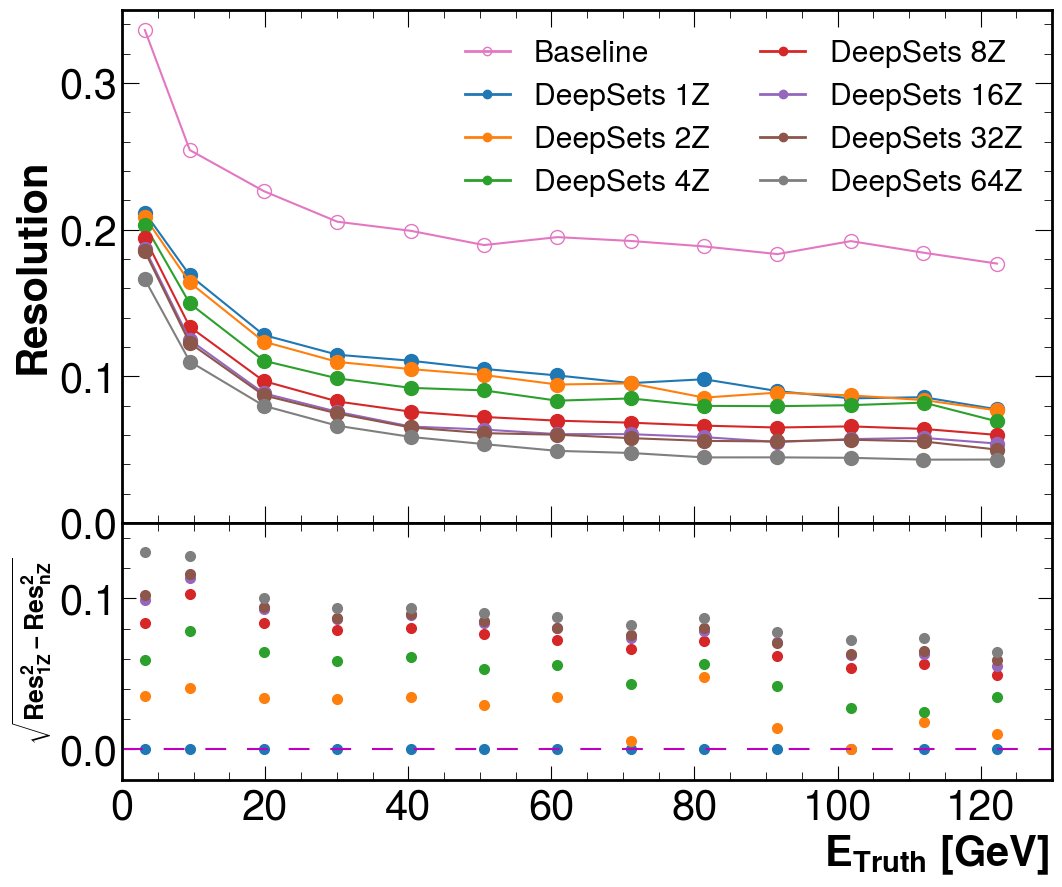

In [46]:
from matplotlib.lines import Line2D
default_color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Print and display the default colors
print("Default color cycle:", default_color_cycle)

# Create indices for plotting (include first two points, then skip one)
indices = [0, 1] + list(range(3, len(ds_energy_Input4D_8Z), 2))

fig,(ax,ax1) = plt.subplots(2,1,figsize=(12, 10),gridspec_kw={'height_ratios': [4, 2]},sharex=True)

ax.errorbar(straw_energy_ecal_hcal_ECCE_noFit[indices], straw_res_fit_ecal_hcal_ECCE_noFit[indices] ,
            marker='o', markerfacecolor='none', markersize='10', color=default_color_cycle[6])

ax.errorbar(ds_energy_Input4D_1Z[indices], ds_res_fit_Input4D_1Z[indices] ,
            marker='o', markersize='10', color=default_color_cycle[0])

ax.errorbar(ds_energy_Input4D_2Z[indices], ds_res_fit_Input4D_2Z[indices] ,
            marker='o',markersize='10', color=default_color_cycle[1])

ax.errorbar(ds_energy_Input4D_4Z[indices], ds_res_fit_Input4D_4Z[indices] ,
            marker='o',markersize='10', color=default_color_cycle[2])
ax.errorbar(ds_energy_Input4D_8Z[indices], ds_res_fit_Input4D_8Z[indices] ,
            marker='o',markersize='10', color=default_color_cycle[3])

ax.errorbar(ds_energy_Input4D_16Z[indices], ds_res_fit_Input4D_16Z[indices] ,
            marker='o',markersize='10', color=default_color_cycle[4])
ax.errorbar(ds_energy_Input4D_32Z[indices], ds_res_fit_Input4D_32Z[indices] ,
            marker='o',markersize='10', color=default_color_cycle[5])

ax.errorbar(ds_energy_Input4D_64Z[indices], ds_res_fit_Input4D_64Z[indices] ,
            marker='o',markersize='10', color=default_color_cycle[7])



ax.set_ylabel('Resolution',fontsize=30, loc='center', fontweight='bold')
ax.set_xlim(0,130)
ax.set_ylim(0, 0.35)
ax.xaxis.set_major_locator(MultipleLocator(20))

ax.legend(loc='upper left', fontsize=25)
ax.yaxis.set_tick_params(labelsize=30)
ax.xaxis.set_tick_params(labelsize=30)
plt.tick_params(direction='in',right=True,top=True,length=10)

# Create a custom legend by combining labels from different data series
legend1 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[6], marker='o',markerfacecolor='none',lw=2, label='Baseline'),
                             Line2D([0], [0], color=default_color_cycle[0], lw=2, marker='o', label='DeepSets 1Z'),
                             Line2D([0], [0], color=default_color_cycle[1], lw=2, marker='o', label='DeepSets 2Z'),
                            Line2D([0], [0], color=default_color_cycle[2], lw=2, marker='o', label='DeepSets 4Z')],
                    loc='upper center')

# Create an empty legend for the right side (ax)
legend2 = ax.legend(handles=[Line2D([0], [0],  color=default_color_cycle[3], lw=2, marker='o',label='DeepSets 8Z'),
                    Line2D([0], [0], color=default_color_cycle[4], lw=2, marker='o', label='DeepSets 16Z'),
                    Line2D([0], [0], color=default_color_cycle[5], lw=2, marker='o', label='DeepSets 32Z'),
                    Line2D([0], [0], color=default_color_cycle[7], lw=2, marker='o', label='DeepSets 64Z')],
                    loc='upper right')

# Add both legends back to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

legend = ax.legend(prop={'weight': 'normal'})



ax1.plot(ds_energy_Input4D_1Z[indices], ratio_rel_to_1_from1[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 1z', color=default_color_cycle[0])
ax1.plot(ds_energy_Input4D_2Z[indices], ratio_rel_to_1_from2[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 2z', color=default_color_cycle[1])
ax1.plot(ds_energy_Input4D_4Z[indices], ratio_rel_to_1_from4[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 4z', color=default_color_cycle[2])

ax1.plot(ds_energy_Input4D_2Z[indices], ratio_rel_to_1_from8[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 8z', color=default_color_cycle[3])
ax1.plot(ds_energy_Input4D_2Z[indices], ratio_rel_to_1_from16[indices],marker='o',markersize='7',\
         linestyle='None', label='DeepSets 16z', color=default_color_cycle[4])
ax1.plot(ds_energy_Input4D_2Z[indices], ratio_rel_to_1_from32[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 32z', color=default_color_cycle[5])
ax1.plot(ds_energy_Input4D_2Z[indices], ratio_rel_to_1_from64[indices],marker='o',markersize='7',\
         linestyle='None', label='DeepSets 64z', color=default_color_cycle[7])





ax1.set_ylim(-0.02, 0.15)
ax1.set_xlim(0,130)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))   
ax1.set_xlabel('$E_{Truth}$ [GeV] ', fontsize=30, fontweight='bold')
ax1.set_ylabel('$\sqrt{Res_{1Z}^2 - Res_{nZ}^2}$', fontsize=18, loc='center', fontweight='bold')

ax1.axhline(0.0, linestyle='dashed', color='m', dashes=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0)


ax1.yaxis.set_tick_params(labelsize=30)
ax1.xaxis.set_tick_params(labelsize=30)
# Add the legend for the 'ax' subplot here
#ax.legend(loc='upper right', fontsize=25)
plt.tick_params(direction='in',right=True,top=True,length=10)
#plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('z_section.pdf', bbox_inches='tight')
plt.show()




## Z SEGMENTATION RESOLTUION

Baseline
DeepSets 1Z
DeepSets 2Z 
DeepSets 8Z 
DeepSets 16Z
DeepSets 32Z
DeepSets 64Z


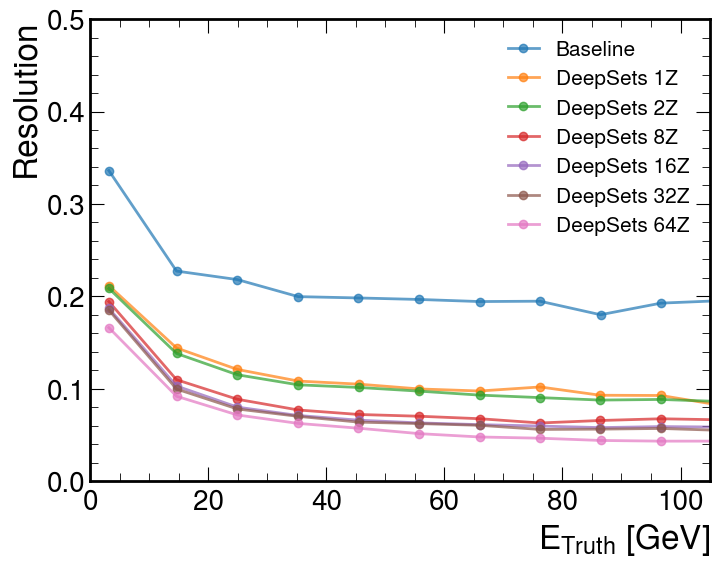

In [13]:
energy_min=2
energy_max=130

step=2

mask=np.logical_and(ds_energy_Input4D_1Z>energy_min, ds_energy_Input4D_1Z<energy_max)


labels=[ "Baseline",'DeepSets 1Z', 'DeepSets 2Z ' ,"DeepSets 8Z ", 'DeepSets 16Z', 'DeepSets 32Z', 'DeepSets 64Z']

var_X=[straw_energy_ecal_hcal_ECCE_noFit[::step], 
        ds_energy_Input4D_1Z[::step], 
      ds_energy_Input4D_2Z[::step], 
       ds_energy_Input4D_8Z[::step],
       ds_energy_Input4D_16Z[::step],
       ds_energy_Input4D_32Z[::step],
       ds_energy_Input4D_64Z[::step]
      ]


var_Y_res=[straw_res_fit_ecal_hcal_ECCE_noFit[::step], 
             ds_res_fit_Input4D_1Z[::step], 
        ds_res_fit_Input4D_2Z[::step], 
           ds_res_fit_Input4D_8Z[::step],
           ds_res_fit_Input4D_16Z[::step],
           ds_res_fit_Input4D_32Z[::step],
           ds_res_fit_Input4D_64Z[::step]
            
          ]

var_Y_scale=[straw_scale_median_ecal_hcal_ECCE_noFit[::step],
            ds_scale_median_Input4D_1Z[::step], 
            ds_scale_median_Input4D_2Z[::step], 
             ds_scale_median_Input4D_8Z[::step],
              ds_scale_median_Input4D_16Z[::step],
            ds_scale_median_Input4D_32Z[::step], 
             ds_scale_median_Input4D_64Z[::step]
            ]



particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,105]
ylim_max=[0.0,0.5]
draw_plot_res_scale(var_X[0:], var_Y_res[0:], labels[0:], title,  xlim_max, ylim_max, particle, detector, 
                    'upper right')

## Z SEGMENTATION SCALE Plot for the paper

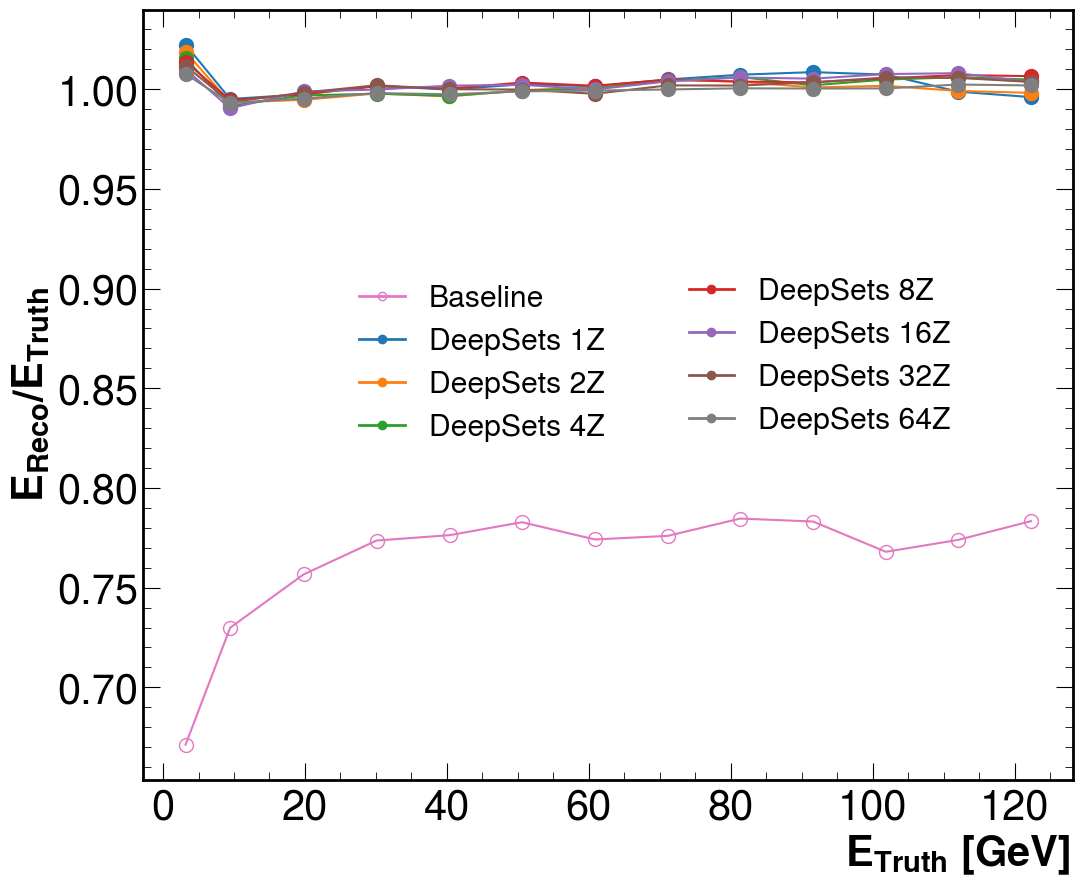

<Figure size 1000x1000 with 0 Axes>

In [45]:
fig,ax = plt.subplots(figsize=(12, 10))
ax.errorbar(straw_energy_ecal_hcal_ECCE_noFit[indices], straw_scale_median_ecal_hcal_ECCE_noFit[indices] ,
            marker='o', markerfacecolor='none', markersize='10', color=default_color_cycle[6])

ax.errorbar(ds_energy_Input4D_1Z[indices], ds_scale_median_Input4D_1Z[indices] ,
            marker='o', markersize='10', color=default_color_cycle[0])

ax.errorbar(ds_energy_Input4D_2Z[indices], ds_scale_median_Input4D_2Z[indices] ,
            marker='o', markersize='10', color=default_color_cycle[1])

ax.errorbar(ds_energy_Input4D_4Z[indices], ds_scale_median_Input4D_4Z[indices] ,
            marker='o', markersize='10', color=default_color_cycle[2])

ax.errorbar(ds_energy_Input4D_8Z[indices], ds_scale_median_Input4D_8Z[indices] ,
            marker='o',markersize='10', color=default_color_cycle[3])

ax.errorbar(ds_energy_Input4D_16Z[indices], ds_scale_median_Input4D_16Z[indices] ,
            marker='o', markersize='10', color=default_color_cycle[4])
ax.errorbar(ds_energy_Input4D_32Z[indices], ds_scale_median_Input4D_32Z[indices] ,
            marker='o', markersize='10', color=default_color_cycle[5])

ax.errorbar(ds_energy_Input4D_64Z[indices], ds_scale_median_Input4D_64Z[indices] ,
            marker='o', markersize='10', color=default_color_cycle[7])

ax.set_xlabel('$E_{Truth}$ [GeV] ', fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=30)
ax.xaxis.set_tick_params(labelsize=30)
ax.set_ylabel('$E_\mathbf{Reco}/E_\mathbf{Truth}$', fontsize=30, loc='center', fontweight='bold')

# Create a custom legend by combining labels from different data series
legend1 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[6], marker='o',markerfacecolor='none',lw=2, label='Baseline'),
                             Line2D([0], [0], color=default_color_cycle[0], lw=2, marker='o', label='DeepSets 1Z'),
                             Line2D([0], [0], color=default_color_cycle[1], lw=2, marker='o', label='DeepSets 2Z'),
                            Line2D([0], [0], color=default_color_cycle[2], lw=2, marker='o', label='DeepSets 4Z')],
                     bbox_to_anchor=(0.2, 0.400),  prop={'weight': 'normal'})

# Create an empty legend for the right side (ax)
legend2 = ax.legend(handles=[Line2D([0], [0],  color=default_color_cycle[3], lw=2, marker='o',label='DeepSets 8Z'),
                    Line2D([0], [0], color=default_color_cycle[4], lw=2, marker='o', label='DeepSets 16Z'),
                    Line2D([0], [0], color=default_color_cycle[5], lw=2, marker='o', label='DeepSets 32Z'),
                    Line2D([0], [0], color=default_color_cycle[7], lw=2, marker='o', label='DeepSets 64Z')],
                    loc='center right', bbox_to_anchor=(0.9, 0.550), prop={'weight': 'normal'})

ax.add_artist(legend1)
#ax.add_artist(legend2)
#legend2 = ax.legend(prop={'weight': 'normal'})
plt.show()
plt.savefig('Scale_z_section.pdf', bbox_inches='tight')


Default color cycle: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Baseline
DeepSets 1Z
DeepSets 2Z 
DeepSets 8Z 
DeepSets 16Z
DeepSets 32Z
DeepSets 64Z


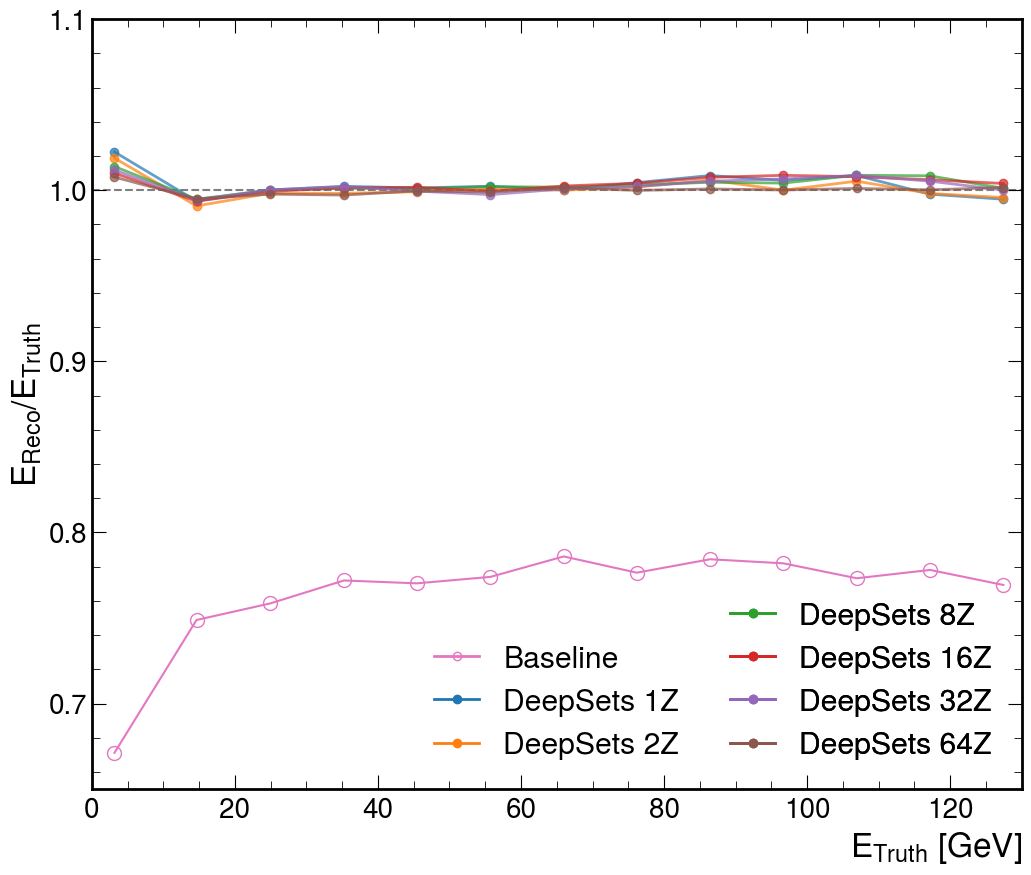

In [15]:

fig,ax = plt.subplots(figsize=(12, 10),gridspec_kw={'height_ratios': [4, 2]},sharex=True)





def draw_plot_res_scale_local(var_X, var_Y,labels, title, xlimits,ylimits, particle, detector, legend_position):
    fig=plt.figure(figsize=(12,10))
    greek_particle=get_greek_particle(particle)
    default_color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Print and display the default colors
    print("Default color cycle:", default_color_cycle)
    #plt.title("AI Codesign Scale",fontsize=25
    if title=='scale':
        plt.ylabel("$E_\mathrm{Reco}/E_\mathrm{Truth}$",fontsize=24, loc='center')
        ylim_min=0.9
        title_head='Energy Scale for '+ greek_particle + ' in ' +' '+detector
    elif title=='resolution':
        #plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
        plt.ylabel("Resolution",fontsize=24)
        ylim_min=0
        title_head='Energy Resolution for '+ greek_particle + ' in' +' '+ detector
    elif title=='angular-resolution-theta':
        #plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
        ax.set_ylabel(r"$\sigma_{\theta} \quad [mrad]$",fontsize=24)
        ylim_min=0
        title_head='Angular Resolution  for '+ greek_particle + ' in' +' '+ detector
        
    elif title=='angular-resolution-phi':
        #plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
        plt.ylabel(r"$\sigma_{\phi} \quad [mrad]$",fontsize=24)
        ylim_min=0
        title_head='Angular Resolution  for '+ greek_particle + ' in' +' '+ detector    
    plt.xlabel("$E_\mathrm{Truth}$ [GeV]",fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tick_params(direction='in',right=True,top=True,length=10)
    plt.axhline(y=1.0, color='k', linestyle='--',alpha=0.5)#plt.ylim(-0.02,0.4)
    plt.ylim(ylimits)
    plt.xlim(xlimits)
    #plt.grid()
    #errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred
    ax = plt.subplot(1,1,1)
    for x,y,label in zip(var_X,var_Y,labels):
        print(label)
        if label=='Baseline':
            plt.errorbar(x,y, marker='o', markerfacecolor='none', label='Baseline',markersize='10', \
                         color=default_color_cycle[6])
        else:
            plt.errorbar(x, y,linewidth=2.0,marker="o",alpha=0.7,  label=label)
    #plt.errorbar(straw_X,straw_Y,linewidth=2.0,marker="o",alpha=0.7,\
    #             label="Strawman")
    #plt.legend(fontsize=15,loc=legend_position)
    # Create a custom legend by combining labels from different data series
    legend1 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[6], marker='o',markerfacecolor='none', lw=2, label='Baseline'),
                             Line2D([0], [0], color=default_color_cycle[0], marker='o', lw=2, label='DeepSets 1Z'),
                             Line2D([0], [0], color=default_color_cycle[1], marker='o', lw=2, label='DeepSets 2Z')],
                    loc='lower center')

    # Create an empty legend for the right side (ax)
    legend2 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[2], lw=2, marker='o', label='DeepSets 8Z'),
                    Line2D([0], [0], color=default_color_cycle[3], lw=2, marker='o', label='DeepSets 16Z'),
                    Line2D([0], [0], color=default_color_cycle[4], lw=2, marker='o', label='DeepSets 32Z'),
                    Line2D([0], [0], color=default_color_cycle[5], lw=2, marker='o', label='DeepSets 64Z')],
                    loc='lower right')
    # Add both legends back to the plot
    ax.add_artist(legend1)
    ax.add_artist(legend2)
title='scale'
xlim_max=[0,130]
ylim_max=[0.65,1.10]
draw_plot_res_scale_local(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

Baseline
DeepSets 1Z
DeepSets 2Z 
DeepSets 8Z 
DeepSets 32Z
DeepSets 64Z


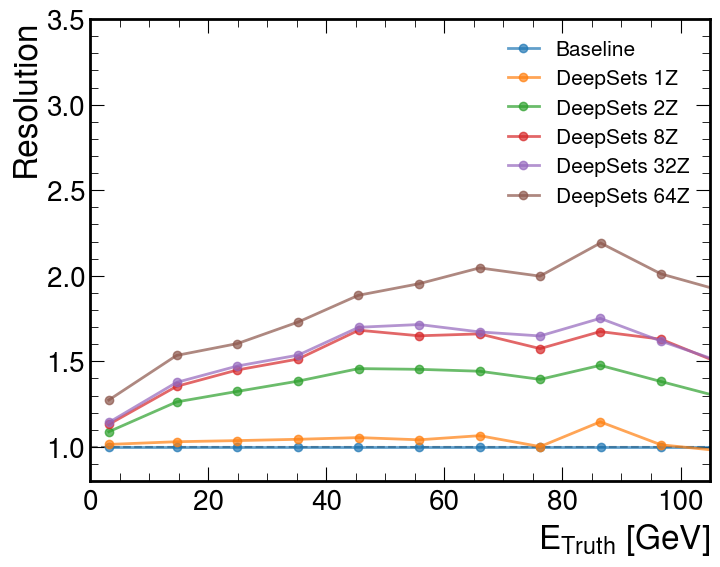

In [15]:
energy_min=2
energy_max=130

step=2


labels=[ "Baseline",'DeepSets 1Z', 'DeepSets 2Z ' ,"DeepSets 8Z ", 'DeepSets 32Z', 'DeepSets 64Z']
#labels=[ "Baseline",'DeepSets 1Z sections', 'Deepset 2Z sections' ,"Deepset 8Z sections", 'Deepset 32z sections', 'Deepset 64Z sections']

var_X=[straw_energy_ecal_hcal_ECCE_noFit[::step], 
        ds_energy_Input4D_1Z[::step], 
      ds_energy_Input4D_2Z[::step], 
       ds_energy_Input4D_8Z[::step],
       ds_energy_Input4D_32Z[::step],
       ds_energy_Input4D_64Z[::step]
      ]


var_Y_ratio_res=[ ratio_rel_to_1_from1[indices],
           ratio_rel_to_1_from2[indices],
           ratio_rel_to_1_from8[indices],
           ratio_rel_to_1_from16[indices],
           ratio_rel_to_1_from32[indices],
           ratio_rel_to_1_from64[indices]
         
            
          ]

particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,105]
ylim_max=[0.80,3.5]
draw_plot_res_scale(var_X[0:], var_Y_ratio_res[0:], labels[0:], title,  xlim_max, ylim_max, particle, detector, 
                    'upper right')

## Loss Curves

In [142]:
npz_unpacked_loss = np.load(path_to_result + "/losses.npz")

train_loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
#print(val_loss.shape)
val_mean_loss=np.mean(val_loss, axis=1)
train_mean_loss=np.mean(train_loss, axis=1)
#print(val_mean_loss.shape)

plt.plot(train_mean_loss,label='train ')

plt.plot(val_mean_loss, label='val')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss (MAE)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(0.06,0.12)
plt.legend(fontsize=15)
plt.grid()

NameError: name 'path_to_result' is not defined

## DIFFERENT INPUT DIMENTISON PIYUSH RESULT

Default color cycle: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Baseline
DeepSets 1D
DeepSets 2D
DeepSets 4D
Graphnet 4D
[0.671248 0.729888 0.74884  0.756633 0.75853  0.773633 0.77193  0.776325
 0.770256 0.782826 0.774026 0.77417  0.785979 0.775975 0.776483 0.784657
 0.784334 0.783166 0.781943 0.767975 0.773234 0.773936 0.778074 0.78337
 0.76931 ]


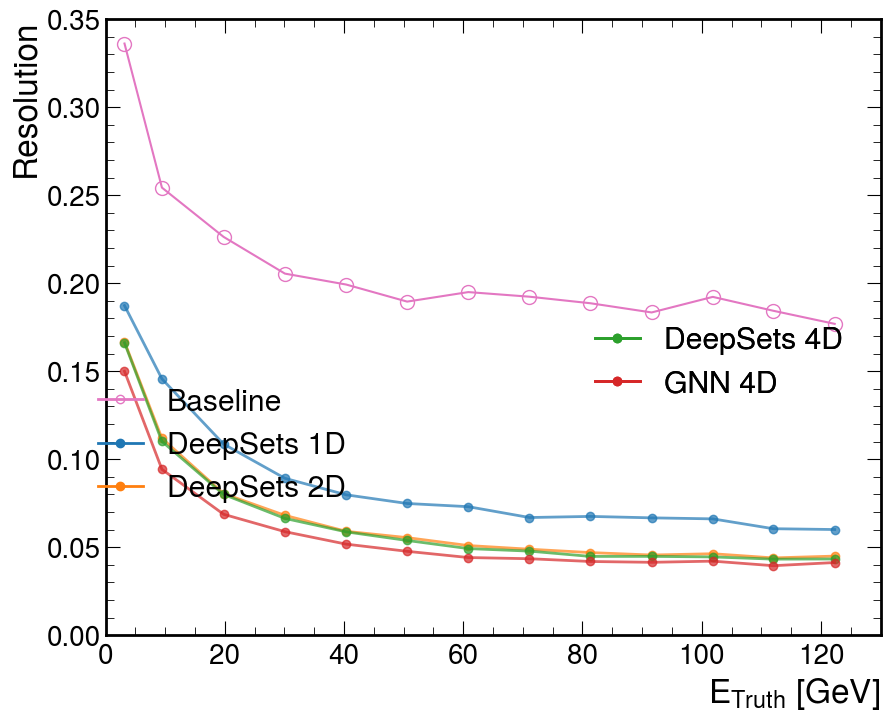

In [219]:

def draw_plot_res_scale_local_inputFeatures(var_X, var_Y,labels, title, xlimits,ylimits, particle, detector, 
                                            legend1_loc, legend2_loc):
    fig=plt.figure(figsize=(10,8))
    greek_particle=get_greek_particle(particle)
    default_color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    # Print and display the default colors
    print("Default color cycle:", default_color_cycle)
    #plt.title("AI Codesign Scale",fontsize=25
    if title=='scale':
        plt.ylabel("$E_\mathrm{Reco}/E_\mathrm{Truth}$",fontsize=24)
        ylim_min=0.9
        title_head='Energy Scale for '+ greek_particle + ' in ' +' '+detector
    elif title=='resolution':
        #plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
        plt.ylabel("Resolution",fontsize=24)
        ylim_min=0
        title_head='Energy Resolution for '+ greek_particle + ' in' +' '+ detector
    elif title=='angular-resolution-theta':
        #plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
        plt.ylabel(r"$\sigma_{\theta} \quad [mrad]$",fontsize=24)
        ylim_min=0
        title_head='Angular Resolution  for '+ greek_particle + ' in' +' '+ detector
        
    elif title=='angular-resolution-phi':
        #plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
        plt.ylabel(r"$\sigma_{\phi} \quad [mrad]$",fontsize=24)
        ylim_min=0
        title_head='Angular Resolution  for '+ greek_particle + ' in' +' '+ detector    
    plt.xlabel("$E_\mathrm{Truth}$ [GeV]",fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tick_params(direction='in',right=True,top=True,length=10)
    plt.axhline(y=1.0, color='k', linestyle='--',alpha=0.5)#plt.ylim(-0.02,0.4)
    plt.ylim(ylimits)
    plt.xlim(xlimits)
    #plt.grid()
    #errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred
    ax = plt.subplot(1,1,1)
    for x,y,label in zip(var_X,var_Y,labels):
        print(label)
        if label=='Baseline':
            plt.errorbar(x,y, marker='o', markerfacecolor='none', label='Baseline',markersize='10', \
                         color=default_color_cycle[6])
        else:
            plt.errorbar(x, y,linewidth=2.0,marker="o",alpha=0.7,  label=label)
    #plt.errorbar(straw_X,straw_Y,linewidth=2.0,marker="o",alpha=0.7,\
    #             label="Strawman")
    #plt.legend(fontsize=15,loc=legend_position)
    
    # Create a custom legend by combining labels from different data series
    legend1 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[6], marker='o', markerfacecolor='none', lw=2, label='Baseline'),
                             Line2D([0], [0], color=default_color_cycle[0], marker='o', lw=2, label='DeepSets 1D'),
                             Line2D([0], [0], color=default_color_cycle[1], marker='o', lw=2, label='DeepSets 2D')],
                    loc=legend1_loc, bbox_to_anchor=(0.15, 0.45))
    
    # Create an empty legend for the right side (ax)
    legend2 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[2], lw=2, marker='o',label='DeepSets 4D'),
                    Line2D([0], [0], color=default_color_cycle[3], lw=2, marker='o',label='GNN 4D')],
                    loc=legend2_loc, bbox_to_anchor=(0.99, 0.550))
    
    # Add both legends back to the plot
    ax.add_artist(legend1)
    ax.add_artist(legend2)

    

energy_min=2
energy_max=130

step=2
#[indices]
mask=np.logical_and(ds_energy_1D_piyush>energy_min, ds_energy_1D_piyush<energy_max)
# Create indices for plotting (include first two points, then skip one)
indices = [0, 1] + list(range(3, len(ds_energy_4D_piyush), 2))
#labels=[  'Deepset 1D' ,"Deepset 2D", 'Deepset 4D', 'Graphnet 4D']
labels=[ "Baseline", 'DeepSets 1D' ,"DeepSets 2D", 'DeepSets 4D', 'Graphnet 4D']

var_X=[straw_energy_ecal_hcal_ECCE_noFit[indices] ,
       ds_energy_1D_piyush[mask][indices],
       ds_energy_2D_piyush[mask][indices],  ds_energy_4D_piyush[mask][indices], graph_energy_4D_piyush[mask][indices],
 ]


var_Y_res=[straw_res_fit_ecal_hcal_ECCE_noFit[indices] , 
        ds_res_fit_1D_piyush[mask][indices], ds_res_fit_2D_piyush[mask][indices], ds_res_fit_4D_piyush[mask][indices],
           graph_res_fit_4D_piyush[mask][indices],
            res_calice_uncorr_pm, res_calice_corr_pm
          
]
           
var_Y_scale=[straw_scale_median_ecal_hcal_ECCE_noFit[indices],
            ds_scale_median_1D_piyush[mask][indices], ds_scale_median_2D_piyush[mask][indices],
            ds_scale_median_4D_piyush[mask][indices], graph_scale_median_4D_piyush[mask][indices],
            ]



particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,130]
ylim_max=[0.0,0.35]
draw_plot_res_scale_local_inputFeatures(var_X[0:], var_Y_res[0:], labels[0:], title,  xlim_max, ylim_max, particle, detector, \
                                        'upper center', 'upper right')

print(straw_scale_median_ecal_hcal_ECCE_noFit)
#print(straw_scale_median_ecal_hcal_ECCE_notFit)

## ENERGY SCALE WITH DIFFERENT INPUT HIT DIMENSION

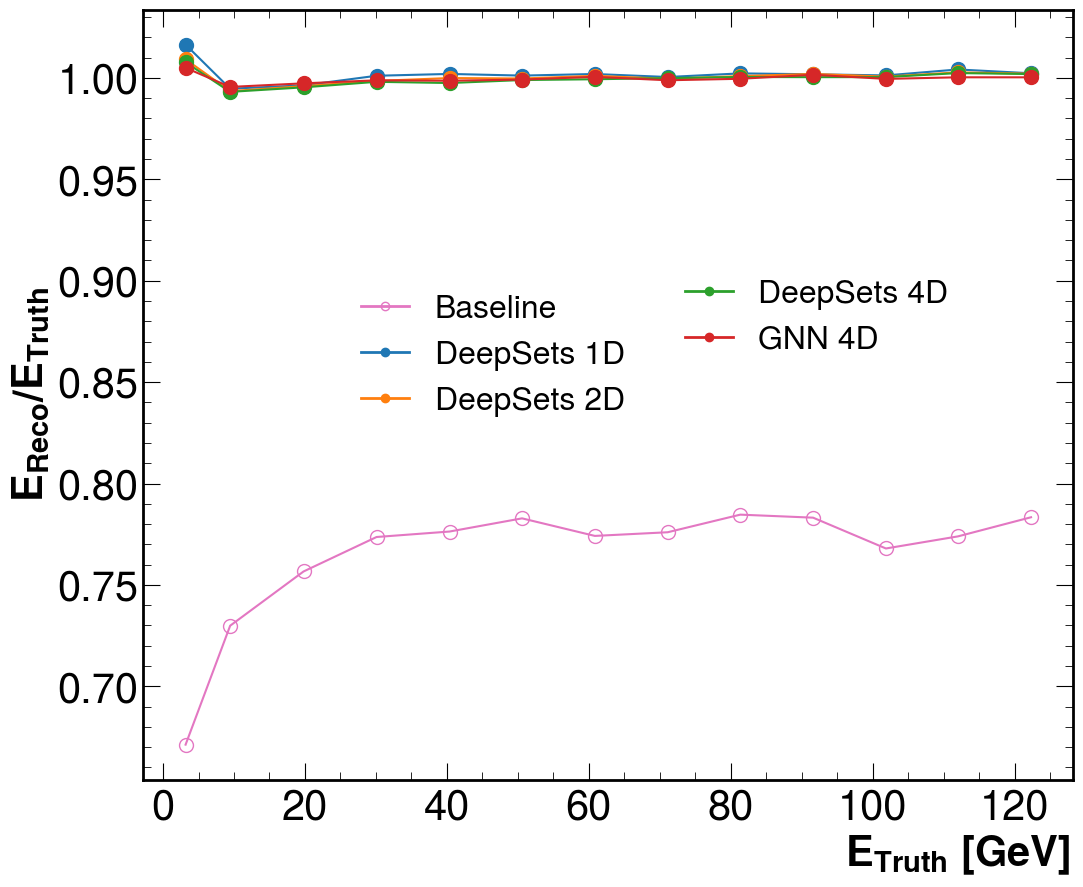

In [47]:
fig,ax = plt.subplots(figsize=(12, 10))

ax.errorbar(straw_energy_ecal_hcal_ECCE_noFit[indices], straw_scale_median_ecal_hcal_ECCE_noFit[indices] ,
            marker='o', markerfacecolor='none',markersize='10', color=default_color_cycle[6])

ax.errorbar(ds_energy_1D_piyush[indices], ds_scale_median_1D_piyush[indices] ,
            marker='o',markersize='10')

ax.errorbar(ds_energy_2D_piyush[indices], ds_scale_median_2D_piyush[indices] ,
            marker='o', markersize='10')

ax.errorbar(ds_energy_4D_piyush[indices], ds_scale_median_4D_piyush[indices] ,
            marker='o',markersize='10')

ax.errorbar(graph_energy_4D_piyush[indices], graph_scale_median_4D_piyush[indices] ,
            marker='o',markersize='10')
#ax.errorbar(graph_energy_4D_piyush[indices], graph_scale_median_4D_piyush[indices] ,
#            marker='o', label='GNN 4D',markersize='0', color='w', alpha=0)



ax.set_xlabel('$E_{Truth}$ [GeV] ', fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=30)
ax.xaxis.set_tick_params(labelsize=30)
ax.set_ylabel('$E_\mathbf{Reco}/E_\mathbf{Truth}$', fontsize=30, loc='center', fontweight='bold')
# Create a custom legend by combining labels from different data series
legend1 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[6], marker='o',markerfacecolor='none',lw=2, label='Baseline'),
                             Line2D([0], [0], color=default_color_cycle[0], lw=2, marker='o', label='DeepSets 1D'),
                             Line2D([0], [0], color=default_color_cycle[1], lw=2, marker='o', label='DeepSets 2D')],
                     bbox_to_anchor=(0.2, 0.430), fontsize=23)

# Create an empty legend for the right side (ax)
legend2 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[2], lw=2, marker='o', label='DeepSets 4D'),
                            Line2D([0], [0],  color=default_color_cycle[3], lw=2, marker='o',label='GNN 4D')],
                            # Line2D([0], [0], color='w', lw=2, marker='o', label='')],
                    loc='center right', bbox_to_anchor=(0.9, 0.60), fontsize=23)

ax.add_artist(legend1)
#ax.add_artist(legend2)
plt.savefig('scale_graphnet_deepset.pdf', bbox_inches='tight')


## Different input features with resolution difference 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Default color cycle: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


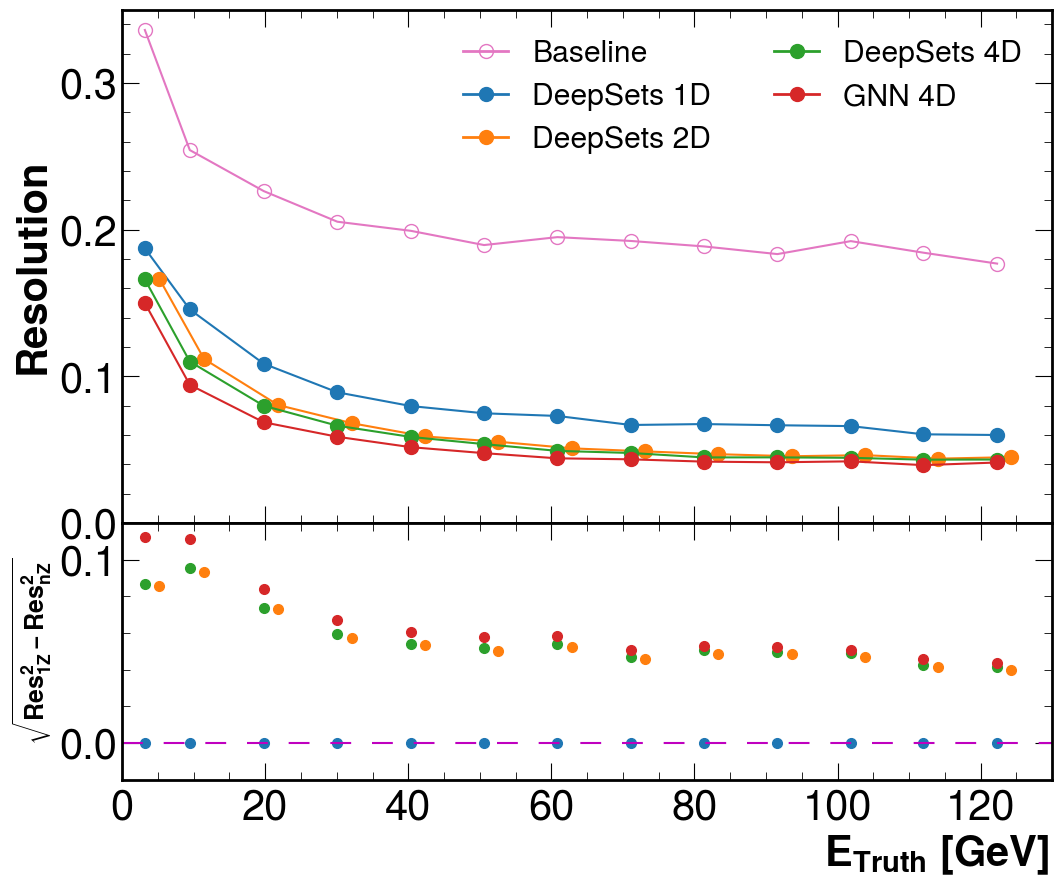

In [48]:
from matplotlib.lines import Line2D
default_color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Print and display the default colors
print("Default color cycle:", default_color_cycle)

# Create indices for plotting (include first two points, then skip one)
indices = [0, 1] + list(range(3, len(ds_energy_Input4D_8Z), 2))
ds_energy_2D_piyush_shift=np.add(ds_energy_2D_piyush ,2)

fig,(ax,ax1) = plt.subplots(2,1,figsize=(12, 10),gridspec_kw={'height_ratios': [4, 2]},sharex=True)

ax.errorbar(straw_energy_ecal_hcal_ECCE_noFit[indices], straw_res_fit_ecal_hcal_ECCE_noFit[indices] ,
            marker='o', markerfacecolor='none', markersize='10', color=default_color_cycle[6])

#ratio_rel_to_1DDS_from_1D_ds
ds_energy_1D_piyush
ax.errorbar(ds_energy_1D_piyush[indices], ds_res_fit_1D_piyush[indices],
             marker='o',markersize='10') #,markerfacecolor='none'

ax.errorbar(ds_energy_2D_piyush_shift[indices], ds_res_fit_2D_piyush[indices] ,
             marker='o',markersize='10')


ax.errorbar(ds_energy_4D_piyush[indices], ds_res_fit_4D_piyush[indices] ,
            marker='o', markersize='10')

ax.errorbar(graph_energy_4D_piyush[indices], graph_res_fit_4D_piyush[indices] ,
           marker='o', markersize='10')

#ax.errorbar(graph_energy_4D_piyush[indices], graph_res_fit_4D_piyush[indices] ,
#           marker='o', label='dummy',markersize='10')


ax.set_ylabel('Resolution',fontsize=30, loc='center', fontweight='bold')
ax.set_xlim(0,130)
ax.set_ylim(0, 0.35)
ax.xaxis.set_major_locator(MultipleLocator(20))

ax.legend(loc='upper left', fontsize=25)
ax.yaxis.set_tick_params(labelsize=30)
ax.xaxis.set_tick_params(labelsize=30)

# Create a custom legend by combining labels from different data series
legend1 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[6], marker='o',markerfacecolor='none',lw=2, \
                                    label='Baseline', markersize='10'),
                             Line2D([0], [0], color=default_color_cycle[0], lw=2, marker='o', label='DeepSets 1D'\
                                  ,markersize='10'),
                             Line2D([0], [0], color=default_color_cycle[1], lw=2, marker='o', label='DeepSets 2D'\
                                 ,markersize='10' )],
                             loc='upper center' )

# Create an empty legend for the right side (ax)
legend2 = ax.legend(handles=[Line2D([0], [0],  color=default_color_cycle[2], lw=2, marker='o',label='DeepSets 4D'\
                                  ,markersize='10'),
                    Line2D([0], [0], color=default_color_cycle[3], lw=2, marker='o', label='GNN 4D',markersize='10')],
                    #Line2D([0], [0], color='w', lw=0, marker='o', label='dummy', markersize='10')],
                    loc='upper right')
'''
for ii,text in enumerate(legend2.get_texts()):
    print(ii, "    ",text)
    if ii==2:
        plt.setp(text, color = 'w')
'''        
# Add both legends back to the plot
ax.add_artist(legend1)
#ax.add_artist(legend2)
 
ax1.plot(ds_energy_1D_piyush[indices], ratio_rel_to_1DDS_from_1D_ds[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 1D')
ax1.plot(ds_energy_2D_piyush_shift[indices], ratio_rel_to_1DDS_from_2D_ds[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 2D')
ax1.plot(ds_energy_4D_piyush[indices], ratio_rel_to_1DDS_from_4D_ds[indices],marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 4D')
ax1.plot(graph_energy_4D_piyush[indices], ratio_rel_to_1DDS_from_4D_gnn[indices],marker='o',markersize='7',\
         linestyle='None', label='GNN 4D')




ax1.set_ylim(-0.02, 0.12)
ax1.set_xlim(0,130)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))   
ax1.set_xlabel('$E_{Truth}$ [GeV] ', fontsize=30,  fontweight='bold')
ax1.set_ylabel('$\sqrt{Res_{1Z}^2 - Res_{nZ}^2}$', fontsize=18, loc='center', fontweight='bold')

ax1.axhline(0.0, linestyle='dashed', color='m', dashes=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0)


ax1.yaxis.set_tick_params(labelsize=30)
ax1.xaxis.set_tick_params(labelsize=30)
plt.savefig('res_graphnet_deepset.pdf', bbox_inches='tight')
# Add the legend for the 'ax' subplot here
#ax.legend(loc='upper right', fontsize=25)

#plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## This is not working for now I used Main repo for running the code and is giving me problem 

## At some point I need to delete it

path_to_result /media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/results_4D_output1D_ECCE_graphnet/ECCE_20231007-1811_graphnet_4D      c  predictions_appended_test.npz


"\nresolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2(target_ene_mask,pred_ene_mask, binning, nbins, data_type, particle, 'energy', fit=True, plot_range=0.6)\n"

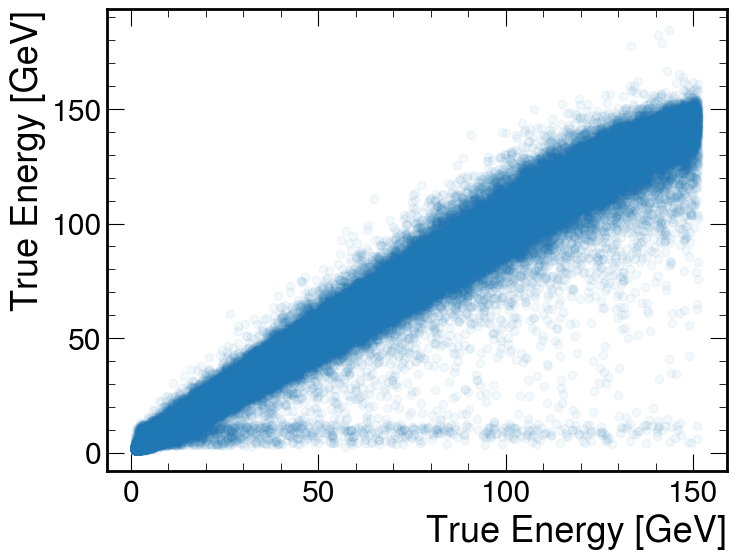

In [11]:
granularity='full_cell_hits'
detector='hcal'
particle='pi+'
input_features='4D'
output_dim='1D'
model='graphnet'
absorber='4W_60Fe'

#path=f'/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30'
#path='/media/miguel/Elements/DeepSet_models/Output3D_10_30deg_ecal_hcal_full_cell_hits'
path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08'


#path_to_stat=f'{path}/preprocessed_input{input_features}D_output{output_dim}D_ECCE'



conditions = {
    ('hcal', 'pi+', '4D', '1D', '4W_60Fe',  'graphnet'):{
    'result_path': f'{path}/results_4D_output1D_ECCE_graphnet/ECCE_20231007-1811_graphnet_4D',
    'path_to_stat': f'{path}/preprocessed_input4D_output1D_ECCE_graphnet',
    },
    
    ('hcal', 'pi+', '4D', '1D', '0W_64Fe',  'deepset'):{
    'result_path': f'{path}/results_4D_output1D_ECCE_deepsets_64Fe/ECCE_20231011-0031_deepsets_4D',
    'path_to_stat': f'{path}/preprocessed_input4D_output1D_ECCE_deepsets_64Fe',
    },
    
    ('hcal', 'pi+', '4D', '1D', '4W_60Fe',  'deepset'):{
    'result_path': f'{path}/results_4D_output1D_ECCE/ECCE_20230908-1814_deepsets_4D',
    'path_to_stat': f'{path}',
    },
    
    ('hcal', 'pi+', '2D', '1D', '4W_60Fe',  'deepset'):{
    'result_path': f'{path}/results_2D_output1D_ECCE/ECCE_20230909-0734_deepsets_2D',
    'path_to_stat': f'{path}',
    },

    ('hcal', 'pi+', '1D', '1D', '4W_60Fe',  'deepset'):{
    'result_path': f'{path}/results_2D_output1D_ECCE/ECCE_20230910-0613_deepsets_1D',
    'path_to_stat': f'{path}',
    }  
}
'''    
if input_features==4:
    block_name='ECCE_20230908-1814_deepsets_4D'
    print('Hello hello ', input_features)
    
elif input_features==2:
    block_name='ECCE_20230909-0734_deepsets_2D'
    print('Hello hello ', input_features)
    
elif input_features==1:
    block_name='ECCE_20230910-0613_deepsets_1D'    
    print('Hello hello ', input_features)
'''    



default_entry = {
    'result_path': 'No_File',
    'path_to_stat': 'No_Title',
}

entry = conditions.get((detector, particle, input_features, output_dim, absorber, model), default_entry)
path_to_result = entry['result_path']
path_to_stat = entry['path_to_stat']

if entry['result_path'] == 'No_File':
    print('File not found')


    
pred_file='predictions_appended_test.npz'

def get_1D_inference_from_discrete_data_local( path_to_result, path_to_stat, file=pred_file):

    npz_unpacked = np.load(f'{path_to_result}/{file}')
    print("path_to_result", path_to_result,'     c ', file)

    prediction_ene= npz_unpacked['outputs_scaled']
    targets_ene = npz_unpacked['targets_scaled']

    
   
      
    return targets_ene, prediction_ene    
    
target_ene, pred_ene=get_1D_inference_from_discrete_data_local( path_to_result, path_to_stat, file=pred_file)

fig = plt.figure(figsize=(8, 6))
plt.scatter(target_ene, pred_ene , alpha=0.05)
plt.xlabel('True Energy [GeV]')
plt.ylabel('True Energy [GeV]')
#plt.ylim(0,310)
#plt.xlim(0.75, 2)




nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='discrete'
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=1
max_val=130
if data_type=='continuous':
    Nbins=26
    binning=np.linspace(min_val, max_val, Nbins)
elif data_type=='discrete':
    binning=[ 2, 3, 4, 5, 7, 8, 10, 12, 15, 18, 22, 27, 33, 41, 50, 60, 74,90, 109, 133, 150]
    

mask=target_ene>1.3
pred_ene_mask=pred_ene[mask]
target_ene_mask=target_ene[mask]
#binning=np.linspace(min_val, max_val, Nbins)


    

#resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,\
#slices_pred_truth,res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(target_ene,pred_ene,
#                                                    binning, nbins,data_type, particle, 'energy', fit_dist)
'''
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(target_ene_mask,pred_ene_mask, binning, nbins, data_type, particle, 'energy', fit=True, plot_range=0.6)
'''

In [ ]:
git_repo='main' #'my' #main
## 1D OUTPUT 4D INPUT ECCE 4W 60 FE CAL WITH ECAL FROM MY DIRECTORY AT SSD DISK
if git_repo=='my':
    path_to_result=f'/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
results_4D_output1D_ECCE_deepsets_FromMyDir/ECCE_20231012-1758_deepsets_4D'
elif git_repo=='main':
    ## 1D OUTPUT 4D INPUT ECCE 4W 60 FE CAL WITH ECAL FROM GIT MAIN REPO AT SSD DISK
    path_to_result=f'/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
results_4D_output1D_ECCE_deepsets_FromMainRepo/ECCE_20231012-1945_deepsets_4D'
npz_unpacked_loss = np.load(path_to_result + "/losses.npz")

train_loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
#print(val_loss.shape)
val_mean_loss=np.mean(val_loss, axis=1)
train_mean_loss=np.mean(train_loss, axis=1)
#print(val_mean_loss.shape)

plt.plot(train_mean_loss,label='train ')

plt.plot(val_mean_loss, label='val')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss (MAE)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.25,0.5)
plt.legend(fontsize=15)
plt.grid()

## This are training from myDir (same used in paper)
## Use this from Now onward for Discrete Inference

path_to_resut /media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/results_4D_output1D_ECCE_64Fe_deepsets_FromMyDir//ECCE_20231013-0022_deepsets_4D
path_to_result /media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/results_4D_output1D_ECCE_64Fe_deepsets_FromMyDir//ECCE_20231013-0022_deepsets_4D     predictions_appended_test.npz


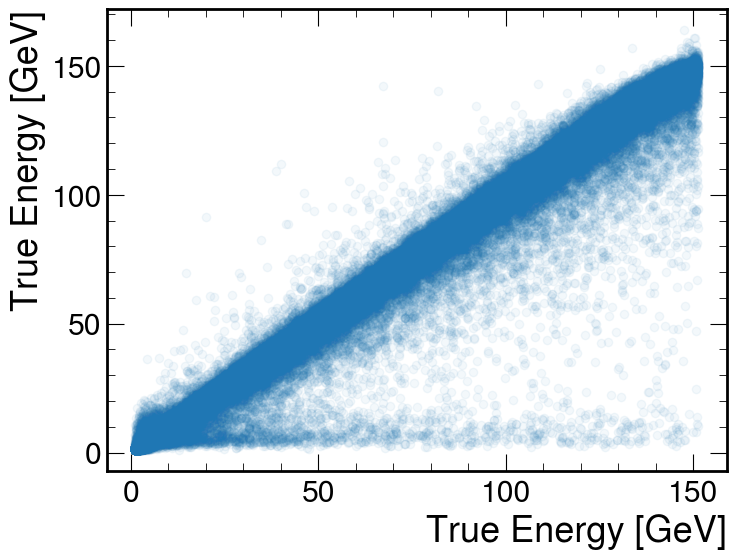

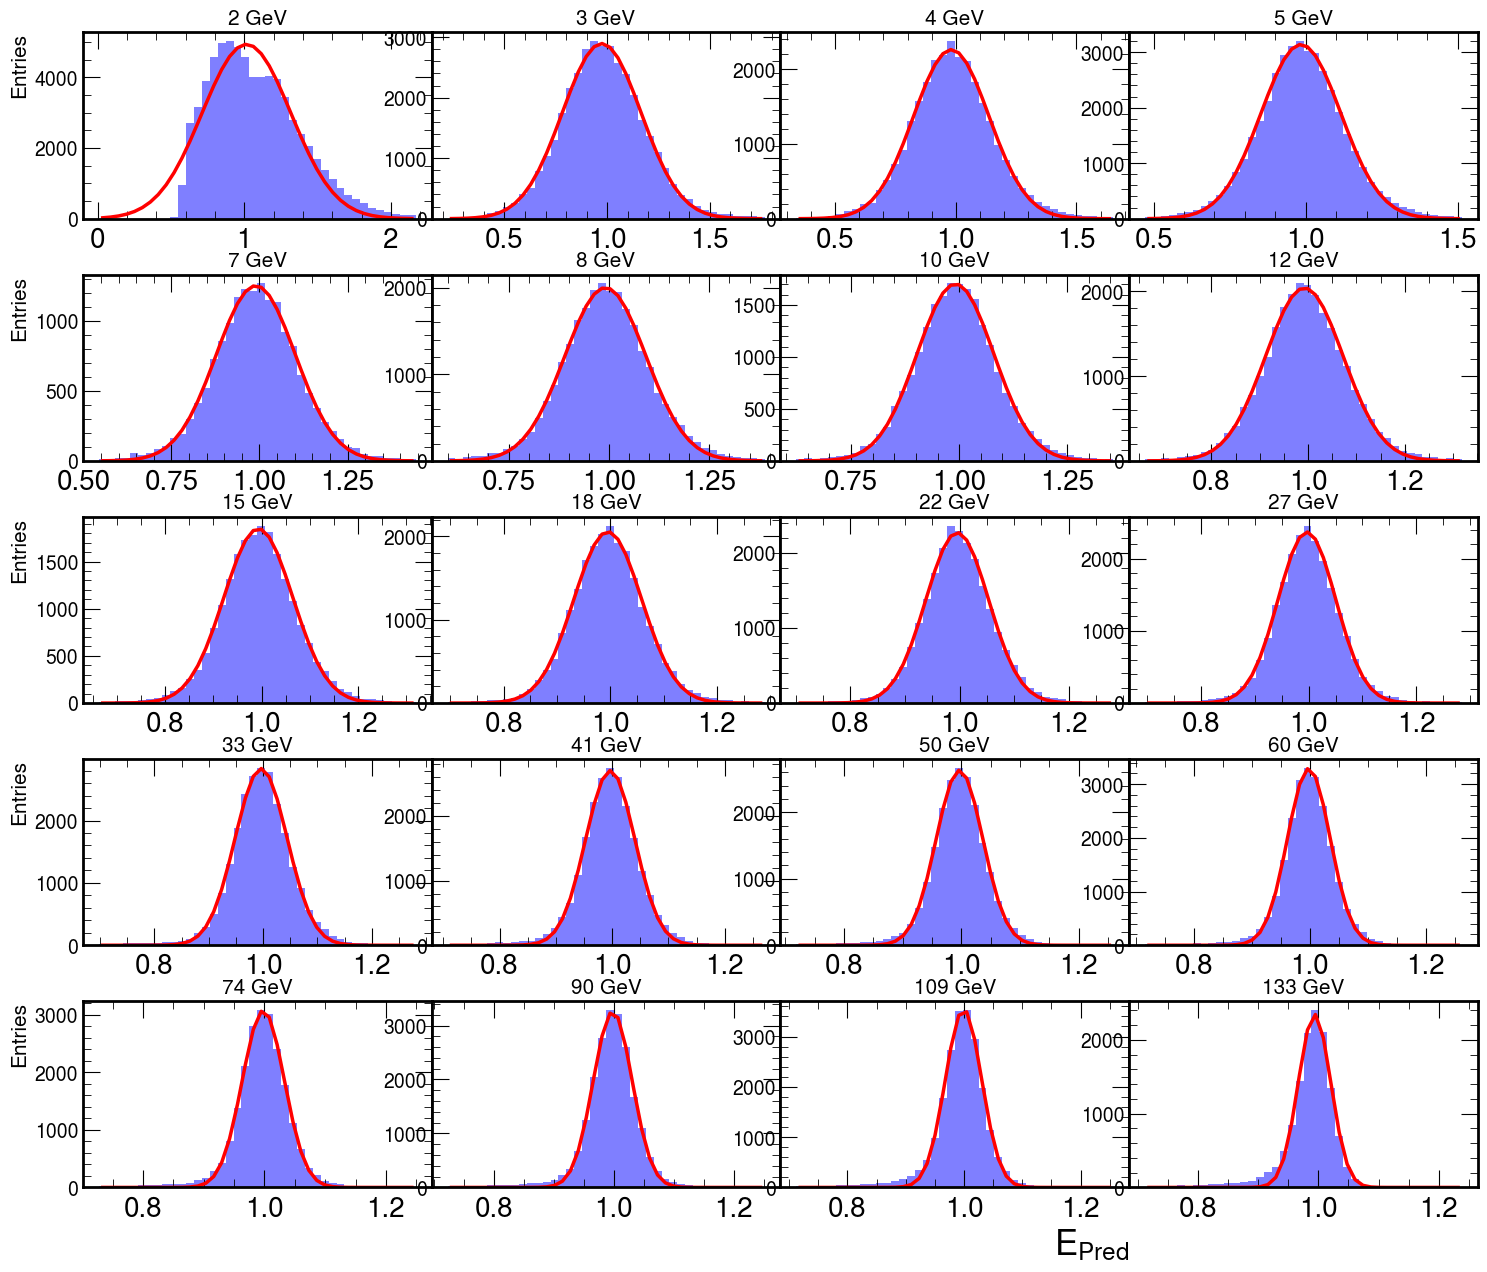

In [26]:
granularity='full_cell_hits'
detector='hcal'
particle='pi+'
input_features='4D'
output_dim='1D'
model='deepsets'
absorber='0W_64Fe'

path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08'


#path_to_stat=f'{path}/preprocessed_input{input_features}D_output{output_dim}D_ECCE'



conditions = {
    ('hcal', 'pi+', '4D', '1D', '4W_60Fe',  'graphnet'):{
    'result_path': f'{path}/results_4D_output1D_ECCE_graphnet/ECCE_20231007-1811_graphnet_4D',
    'path_to_stat': f'{path}/preprocessed_input4D_output1D_ECCE_graphnet',
    },
     ### This is good
    ('hcal', 'pi+', '4D', '1D', '0W_64Fe',  'deepsets'):{
    'result_path': f'{path}/results_4D_output1D_ECCE_64Fe_deepsets_FromMyDir//ECCE_20231013-0022_deepsets_4D',
    'path_to_stat': f'{path}/preprocessed_input4D_output1D_ECCE_64Fe_deepsets_fromMyDir',
    },
    ## This is good
    ('hcal', 'pi+', '4D', '1D', '4W_60Fe',  'deepsets'):{
    'result_path': f'{path}/results_4D_output1D_ECCE_deepsets_FromMyDir/ECCE_20231012-1758_deepsets_4D',
    'path_to_stat': f'{path}/preprocessed_input4D_output1D_ECCE_deepsets_fromMyDir',
    },
    
    ('hcal', 'pi+', '2D', '1D', '4W_60Fe',  'deepsets'):{
    'result_path': f'{path}/results_2D_output1D_ECCE/ECCE_20230909-0734_deepsets_2D',
    'path_to_stat': f'{path}',
    },

    ('hcal', 'pi+', '1D', '1D', '4W_60Fe',  'deepsets'):{
    'result_path': f'{path}/results_2D_output1D_ECCE/ECCE_20230910-0613_deepsets_1D',
    'path_to_stat': f'{path}',
    }  
}



default_entry = {
    'result_path': 'No_File',
    'path_to_stat': 'No_Title',
}

entry = conditions.get((detector, particle, input_features, output_dim, absorber, model), default_entry)
path_to_result = entry['result_path']
path_to_stat = entry['path_to_stat']
print('path_to_resut', path_to_result)

if entry['result_path'] == 'No_File':
    print('File not found')


    
pred_file='predictions_appended_test.npz'

def get_1D_inference_from_discrete_data_local( path_to_result, path_to_stat, file=pred_file):

    npz_unpacked = np.load(f'{path_to_result}/{file}')
    print("path_to_result", path_to_result,'   ', file)

    prediction_ene= npz_unpacked['outputs_scaled']
    targets_ene = npz_unpacked['targets_scaled']

    
   
      
    return targets_ene, prediction_ene    
    
target_ene, pred_ene=get_1D_inference_from_discrete_data_local( path_to_result, path_to_stat, file=pred_file)

fig = plt.figure(figsize=(8, 6))
plt.scatter(target_ene, pred_ene , alpha=0.05)
plt.xlabel('True Energy [GeV]')
plt.ylabel('True Energy [GeV]')





nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='discrete'
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=1
max_val=130
if data_type=='continuous':
    Nbins=26
    binning=np.linspace(min_val, max_val, Nbins)
elif data_type=='discrete':
    binning=[ 2, 3, 4, 5, 7, 8, 10, 12, 15, 18, 22, 27, 33, 41, 50, 60, 74,90, 109, 133, 150]
    

mask=target_ene>1.3
pred_ene_mask=pred_ene[mask]
target_ene_mask=target_ene[mask]
#binning=np.linspace(min_val, max_val, Nbins)


    
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(target_ene_mask,pred_ene_mask, binning, nbins, data_type, particle, 'energy', fit=True, plot_range=0.6)



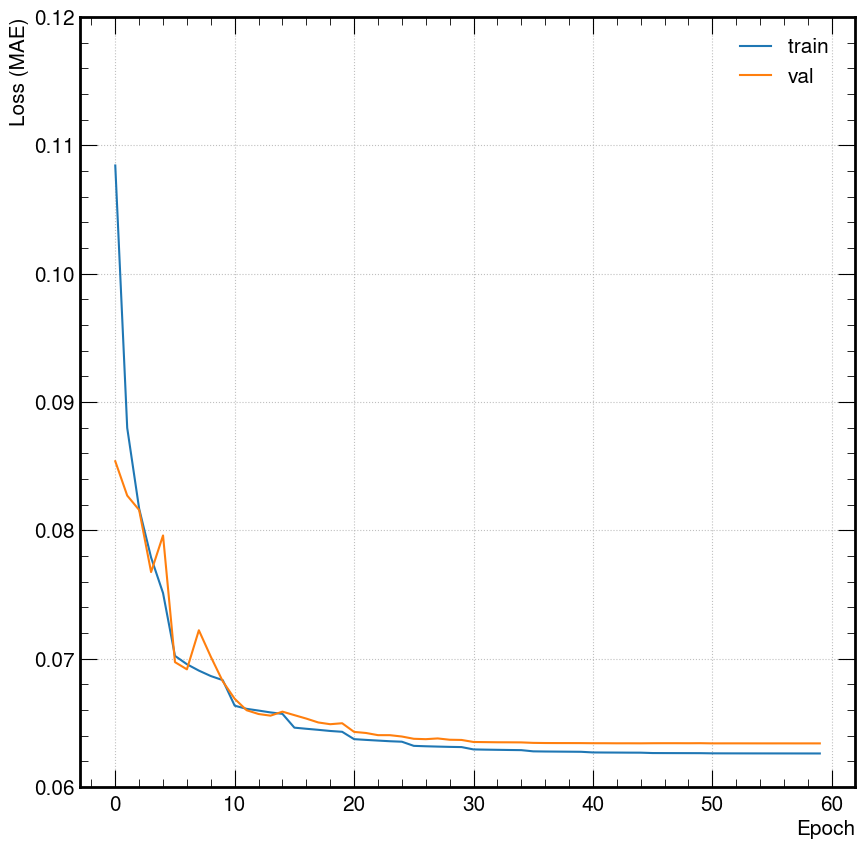

In [28]:

npz_unpacked_loss = np.load(path_to_result + "/losses.npz")

train_loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
#print(val_loss.shape)
val_mean_loss=np.mean(val_loss, axis=1)
train_mean_loss=np.mean(train_loss, axis=1)
#print(val_mean_loss.shape)

plt.plot(train_mean_loss,label='train ')

plt.plot(val_mean_loss, label='val')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss (MAE)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.06,0.12)
plt.legend(fontsize=15)
plt.grid()


In [29]:
approach='ds_'
particle_detector=f'Input{input_features}_{absorber}_1Doutput'
name_tag=f'ds_{output_dim}D_output_'
particle='pp'

true_fit=np.round(true_fit,2)      
print_parameter(true_fit, approach +'energy',particle_detector ) 
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )

ds_energy_Input4D_0W_64Fe_1Doutput=np. array([  1.79,   3.  ,   4.  ,   5.46,   7.  ,   8.47,  10.48,  12.95,
        15.96,  19.44,  23.91,  29.4 ,  36.35,  44.85,  54.34,  66.29,
        81.26,  98.74, 120.1 , 140.87])
ds_res_fit_Input4D_0W_64Fe_1Doutput=np. array([0.298329, 0.196647, 0.15915 , 0.133034, 0.11345 , 0.101698,
       0.089349, 0.080689, 0.071924, 0.063814, 0.057682, 0.053711,
       0.048034, 0.043829, 0.039984, 0.036937, 0.034701, 0.032561,
       0.031232, 0.027194])
ds_scale_median_Input4D_0W_64Fe_1Doutput=np. array([1.014874, 0.973248, 0.981291, 0.98418 , 0.989626, 0.991219,
       0.991406, 0.992396, 0.993359, 0.995186, 0.995817, 0.996842,
       0.996448, 0.996632, 0.997078, 0.998205, 0.998109, 0.998326,
       0.999235, 0.993671])


In [45]:
ds_energy_Input4D_4W_60Fe_1Doutput=np. array([  1.79,   3.  ,   4.  ,   5.45,   7.  ,   8.47,  10.48,  12.95,
        15.97,  19.43,  23.92,  29.41,  36.36,  44.83,  54.32,  66.24,
        81.21,  98.76, 120.12, 140.97])
ds_res_fit_Input4D_4W_60Fe_1Doutput=np. array([0.305491, 0.217438, 0.180307, 0.154858, 0.135941, 0.123382,
       0.107789, 0.098065, 0.091306, 0.082163, 0.074479, 0.068302,
       0.061912, 0.056659, 0.052855, 0.048813, 0.045647, 0.044004,
       0.043144, 0.03474 ])
ds_scale_median_Input4D_4W_60Fe_1Doutput=np. array([1.022502, 0.973373, 0.98069 , 0.983239, 0.985832, 0.989974,
       0.991314, 0.991996, 0.993618, 0.993382, 0.997047, 0.996062,
       0.997068, 0.997251, 0.997806, 0.998708, 0.999789, 0.999352,
       1.00047 , 0.989843])

ds_energy_Input4D_0W_64Fe_1Doutput=np. array([  1.79,   3.  ,   4.  ,   5.46,   7.  ,   8.47,  10.48,  12.95,
        15.96,  19.44,  23.91,  29.4 ,  36.35,  44.85,  54.34,  66.29,
        81.26,  98.74, 120.1 , 140.87])
ds_res_fit_Input4D_0W_64Fe_1Doutput=np. array([0.298329, 0.196647, 0.15915 , 0.133034, 0.11345 , 0.101698,
       0.089349, 0.080689, 0.071924, 0.063814, 0.057682, 0.053711,
       0.048034, 0.043829, 0.039984, 0.036937, 0.034701, 0.032561,
       0.031232, 0.027194])
ds_scale_median_Input4D_0W_64Fe_1Doutput=np. array([1.014874, 0.973248, 0.981291, 0.98418 , 0.989626, 0.991219,
       0.991406, 0.992396, 0.993359, 0.995186, 0.995817, 0.996842,
       0.996448, 0.996632, 0.997078, 0.998205, 0.998109, 0.998326,
       0.999235, 0.993671])

ds_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_4D_piyush=np. array([0.214297, 0.189506, 0.16531 , 0.15202 , 0.12893 , 0.121123,
       0.108781, 0.100069, 0.090362, 0.082286, 0.075196, 0.06798 ,
       0.062594, 0.058485, 0.053639, 0.050004, 0.0471  , 0.044577,
       0.043786, 0.039804])
ds_scale_median_4D_piyush=np. array([0.976951, 0.985615, 0.989044, 0.989917, 0.98992 , 0.990864,
       0.989973, 0.995482, 0.994417, 0.995705, 0.995961, 0.99777 ,
       0.996169, 0.99825 , 0.999461, 0.998633, 1.000228, 1.000437,
       1.001119, 1.001662])


ratio_64_to_60Fe_from_1D_ds=square_root_res(ds_res_fit_Input4D_4W_60Fe_1Doutput, ds_res_fit_Input4D_0W_64Fe_1Doutput)
'''
plt.errorbar(ds_energy_4D_piyush,ds_res_fit_4D_piyush, label='Plot on Paper (4W + 60 Fe)' )
plt.errorbar(ds_energy_Input4D_4W_60Fe_1Doutput, ds_res_fit_Input4D_4W_60Fe_1Doutput, label='4W + 60 Fe')

plt.errorbar(ds_energy_Input4D_0W_64Fe_1Doutput, ds_res_fit_Input4D_0W_64Fe_1Doutput, label='0W + 64 Fe')
plt.xlabel('$E_{Truth}$')
plt.ylabel('Resolution')
plt.legend()
'''

"\nplt.errorbar(ds_energy_4D_piyush,ds_res_fit_4D_piyush, label='Plot on Paper (4W + 60 Fe)' )\nplt.errorbar(ds_energy_Input4D_4W_60Fe_1Doutput, ds_res_fit_Input4D_4W_60Fe_1Doutput, label='4W + 60 Fe')\n\nplt.errorbar(ds_energy_Input4D_0W_64Fe_1Doutput, ds_res_fit_Input4D_0W_64Fe_1Doutput, label='0W + 64 Fe')\nplt.xlabel('$E_{Truth}$')\nplt.ylabel('Resolution')\nplt.legend()\n"

In [46]:
print(ratio_64_to_60Fe_from_1D_ds)
print(ds_res_fit_Input4D_0W_64Fe_1Doutput)
print(ds_res_fit_Input4D_4W_60Fe_1Doutput)

[0.065761 0.092786 0.084746 0.079265 0.074894 0.069862 0.060293 0.055732
 0.056247 0.051755 0.047116 0.042194 0.039062 0.035906 0.034568 0.031912
 0.029656 0.0296   0.029765 0.021618]
[0.298329 0.196647 0.15915  0.133034 0.11345  0.101698 0.089349 0.080689
 0.071924 0.063814 0.057682 0.053711 0.048034 0.043829 0.039984 0.036937
 0.034701 0.032561 0.031232 0.027194]
[0.305491 0.217438 0.180307 0.154858 0.135941 0.123382 0.107789 0.098065
 0.091306 0.082163 0.074479 0.068302 0.061912 0.056659 0.052855 0.048813
 0.045647 0.044004 0.043144 0.03474 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Default color cycle: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


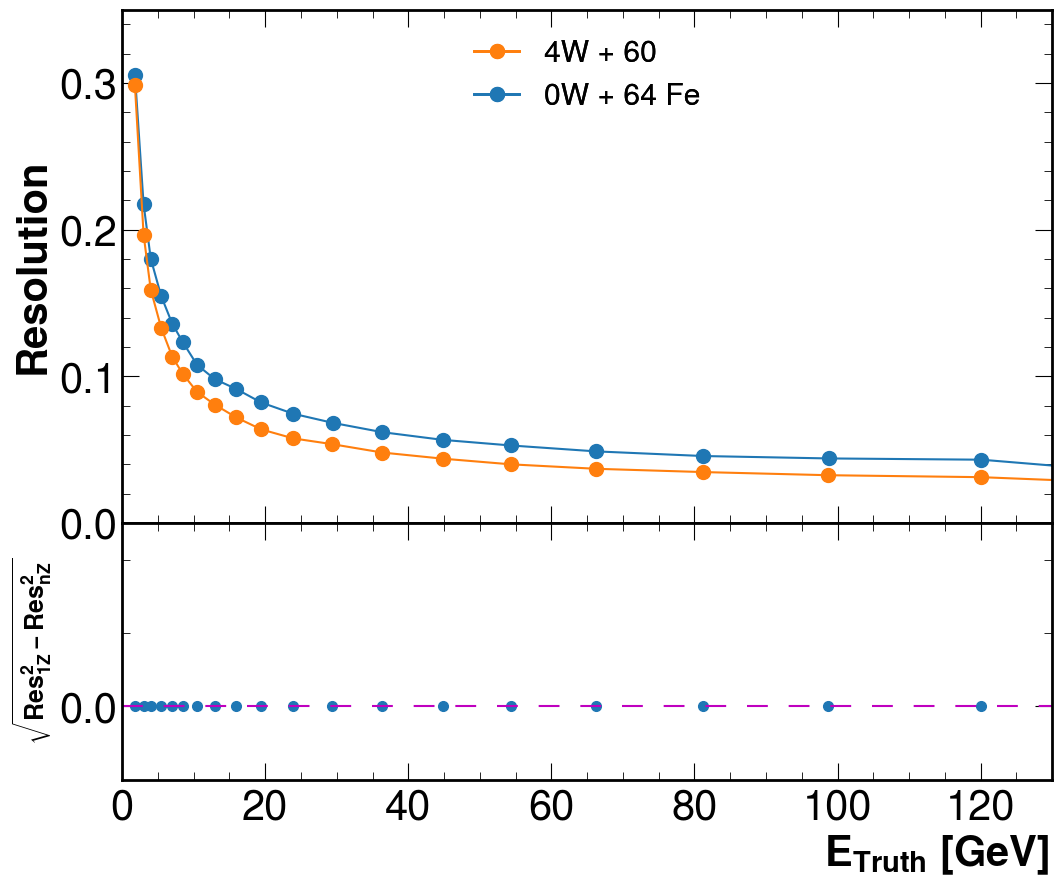

In [47]:
from matplotlib.lines import Line2D
default_color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Print and display the default colors
print("Default color cycle:", default_color_cycle)


fig,(ax,ax1) = plt.subplots(2,1,figsize=(12, 10),gridspec_kw={'height_ratios': [4, 2]},sharex=True)

ax.errorbar(ds_energy_Input4D_4W_60Fe_1Doutput, ds_res_fit_Input4D_4W_60Fe_1Doutput,  
            marker='o', markersize='10')

#ratio_rel_to_1DDS_from_1D_ds

ax.errorbar(ds_energy_Input4D_0W_64Fe_1Doutput, ds_res_fit_Input4D_0W_64Fe_1Doutput,
             marker='o',markersize='10') #,markerfacecolor='none'


ax.set_ylabel('Resolution',fontsize=30, loc='center', fontweight='bold')
ax.set_xlim(0,130)
ax.set_ylim(0, 0.35)
ax.xaxis.set_major_locator(MultipleLocator(20))

ax.legend(loc='upper left', fontsize=25)
ax.yaxis.set_tick_params(labelsize=30)
ax.xaxis.set_tick_params(labelsize=30)

# Create a custom legend by combining labels from different data series
legend1 = ax.legend(handles=[Line2D([0], [0], color=default_color_cycle[1], marker='o',lw=2, \
                                    label='4W + 60', markersize='10'),
                             Line2D([0], [0], color=default_color_cycle[0], lw=2, marker='o', label='0W + 64 Fe'\
                                  ,markersize='10')],
                             loc='upper center' )
  
# Add both legends back to the plot
ax.add_artist(legend1)

 
ax1.plot(ds_energy_Input4D_0W_64Fe_1Doutput, ratio_64_to_60Fe__from_1D_ds,marker='o',markersize='7',\
         linestyle='None',  label='DeepSets 1D')





ax1.set_ylim(-0.02, 0.05)
ax1.set_xlim(0,130)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))   
ax1.set_xlabel('$E_{Truth}$ [GeV] ', fontsize=30,  fontweight='bold')
ax1.set_ylabel('$\sqrt{Res_{1Z}^2 - Res_{nZ}^2}$', fontsize=18, loc='center', fontweight='bold')

ax1.axhline(0.0, linestyle='dashed', color='m', dashes=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0)


ax1.yaxis.set_tick_params(labelsize=30)
ax1.xaxis.set_tick_params(labelsize=30)
plt.savefig('res_graphnet_deepset.pdf', bbox_inches='tight')
# Add the legend for the 'ax' subplot here
#ax.legend(loc='upper right', fontsize=25)

#plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [38]:
print(ratio_64_to_60Fe__from_1D_ds)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


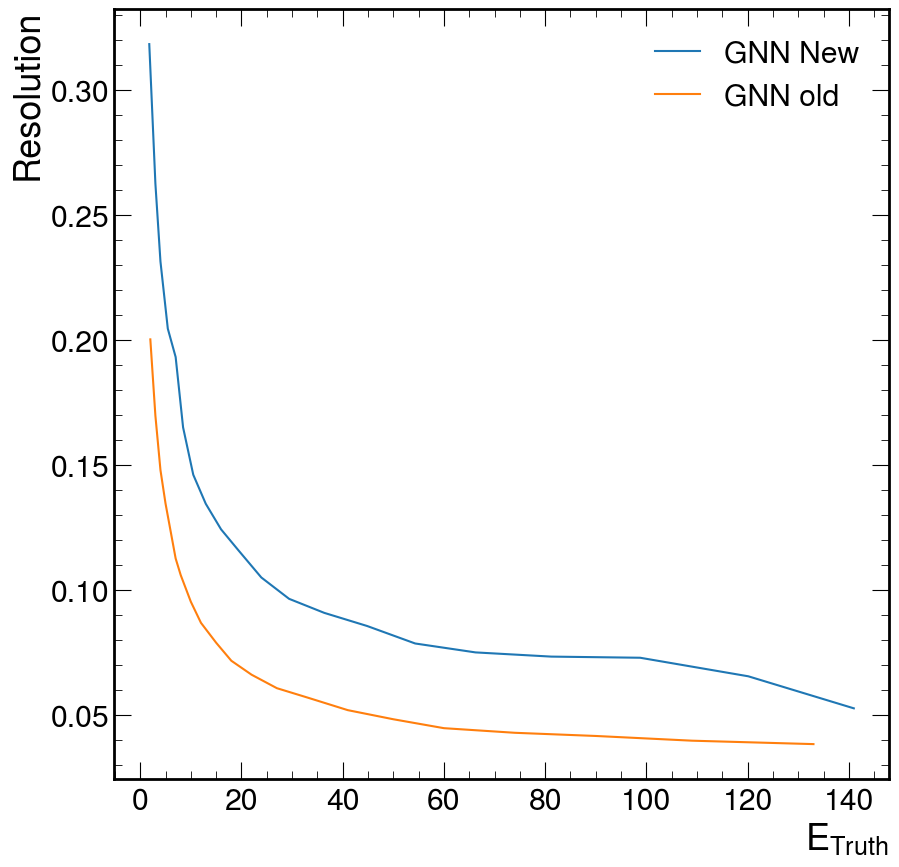

In [23]:
## 4D Deepsets #####
ds_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_4D_piyush=np. array([0.214297, 0.189506, 0.16531 , 0.15202 , 0.12893 , 0.121123,
       0.108781, 0.100069, 0.090362, 0.082286, 0.075196, 0.06798 ,
       0.062594, 0.058485, 0.053639, 0.050004, 0.0471  , 0.044577,
       0.043786, 0.039804])
ds_scale_median_4D_piyush=np. array([0.976951, 0.985615, 0.989044, 0.989917, 0.98992 , 0.990864,
       0.989973, 0.995482, 0.994417, 0.995705, 0.995961, 0.99777 ,
       0.996169, 0.99825 , 0.999461, 0.998633, 1.000228, 1.000437,
       1.001119, 1.001662])

## 4D graph #####
graph_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
graph_res_fit_4D_piyush=np. array([0.200242, 0.169721, 0.14801 , 0.134654, 0.112682, 0.10604 ,
       0.095394, 0.08696 , 0.079006, 0.071803, 0.066224, 0.060836,
       0.057117, 0.052062, 0.048421, 0.044854, 0.043011, 0.041739,
       0.039855, 0.038486])
graph_scale_median_4D_piyush=np. array([0.983676, 0.987915, 0.987713, 0.990477, 0.990704, 0.992832,
       0.992831, 0.997063, 0.995847, 0.997023, 0.99829 , 0.998026,
       0.996847, 0.999621, 1.00032 , 0.998911, 1.000095, 1.00054 ,
       1.000383, 1.001598])

### BISHNU RESULT FOR 4W_60FE
graph_energy_Input4D_4W_60Fe_1Doutput=np. array([  1.79,   3.  ,   4.  ,   5.45,   7.  ,   8.47,  10.48,  12.95,
        15.97,  19.43,  23.92,  29.41,  36.36,  44.83,  54.32,  66.24,
        81.21,  98.76, 120.12, 140.97])
graph_res_fit_Input4D_4W_60Fe_1Doutput=np. array([0.31824 , 0.262478, 0.231358, 0.204535, 0.193182, 0.165075,
       0.146139, 0.13454 , 0.124321, 0.115873, 0.10509 , 0.09655 ,
       0.090938, 0.085687, 0.078701, 0.075136, 0.073457, 0.073002,
       0.065592, 0.052786])
graph_scale_median_Input4D_4W_60Fe_1Doutput=np. array([1.032231, 0.962937, 0.968173, 0.971366, 0.974693, 0.979897,
       0.985341, 0.985378, 0.98894 , 0.989042, 0.994099, 0.994306,
       0.993148, 0.996071, 0.998043, 0.99771 , 0.998594, 1.002031,
       1.000155, 0.973918])




plt.errorbar(graph_energy_Input4D_4W_60Fe_1Doutput,graph_res_fit_Input4D_4W_60Fe_1Doutput, \
             label='GNN New')

#plt.errorbar(ds_energy_4D_piyush, ds_res_fit_4D_piyush, label='Deepsets ' )
plt.errorbar(graph_energy_4D_piyush,graph_res_fit_4D_piyush, label='GNN old ' )
plt.xlabel('$E_{Truth}$')
plt.ylabel('Resolution')
plt.legend()

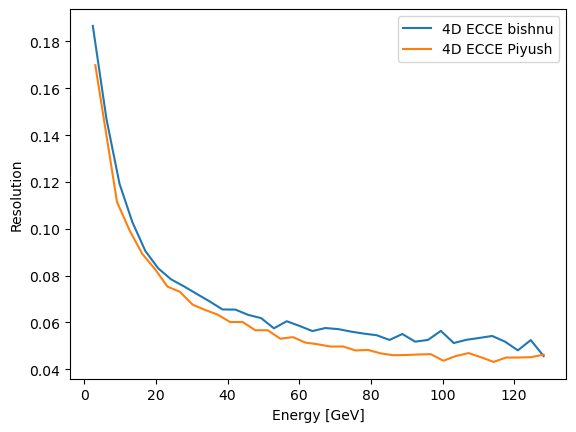

In [78]:
ds_energy_Input4D_bishnu_ECCE=np. array([  2.176474,   5.404758,   8.500068,  11.551666,  14.557277,
        17.588542,  20.670739,  23.667076,  26.732631,  29.741468,
        32.763297,  35.806183,  38.849479,  41.892185,  44.897945,
        47.871095,  50.898158,  53.976647,  56.994647,  60.05793 ,
        63.08858 ,  66.082762,  69.059942,  72.090625,  75.184249,
        78.214644,  81.18962 ,  84.222143,  87.250446,  90.300418,
        93.379237,  96.348726,  99.403284, 102.387569, 105.446593,
       108.454368])
ds_res_fit_Input4D_bishnu_ECCE=np. array([0.190945, 0.164186, 0.145981, 0.131303, 0.127477, 0.121498,
       0.118262, 0.114003, 0.110499, 0.109007, 0.101697, 0.103358,
       0.0994  , 0.106523, 0.096936, 0.095341, 0.098919, 0.097812,
       0.099128, 0.099301, 0.093137, 0.090296, 0.09496 , 0.08914 ,
       0.094007, 0.086948, 0.090697, 0.094177, 0.08959 , 0.083112,
       0.092683, 0.082336, 0.092338, 0.08321 , 0.081552, 0.094074])
ds_scale_median_Input4D_bishnu_ECCE=np. array([1.033272, 0.989142, 0.993093, 0.998177, 1.000808, 1.002983,
       1.006759, 1.00983 , 1.013797, 1.019088, 1.015656, 1.022715,
       1.01938 , 1.017122, 1.02074 , 1.029359, 1.025705, 1.025649,
       1.027123, 1.021237, 1.021233, 1.031018, 1.028482, 1.024588,
       1.018591, 1.020874, 1.023142, 1.01907 , 1.021204, 1.016729,
       1.015561, 1.014262, 1.019083, 1.009566, 1.01577 , 1.012007])




ds_energy_Input2D_bishnu_ECCE=np. array([  2.176474,   5.404758,   8.500068,  11.551666,  14.557277,
        17.588542,  20.670739,  23.667076,  26.732631,  29.741468,
        32.763297,  35.806183,  38.849479,  41.892185,  44.897945,
        47.871095,  50.898158,  53.976647,  56.994647,  60.05793 ,
        63.08858 ,  66.082762,  69.059942,  72.090625,  75.184249,
        78.214644,  81.18962 ,  84.222143,  87.250446,  90.300418,
        93.379237,  96.348726,  99.403284, 102.387569, 105.446593,
       108.454368])
ds_res_fit_Input2D_bishnu_ECCE=np. array([0.179775, 0.134082, 0.116791, 0.106767, 0.098351, 0.094747,
       0.088082, 0.087571, 0.082881, 0.079728, 0.080382, 0.081529,
       0.076492, 0.082593, 0.081671, 0.079153, 0.077801, 0.075907,
       0.076646, 0.078678, 0.083932, 0.071596, 0.077116, 0.076151,
       0.078642, 0.077783, 0.075702, 0.071751, 0.075464, 0.072026,
       0.072335, 0.065657, 0.071107, 0.066101, 0.066965, 0.074437])
ds_scale_median_Input2D_bishnu_ECCE=np. array([1.031921, 0.99089 , 0.994928, 0.999528, 1.003698, 1.010091,
       1.010648, 1.012728, 1.01642 , 1.01217 , 1.00592 , 1.010754,
       1.006413, 1.009281, 1.008002, 1.015959, 1.020647, 1.015643,
       1.023505, 1.020631, 1.02067 , 1.027877, 1.027897, 1.024475,
       1.021314, 1.02271 , 1.02984 , 1.027303, 1.026446, 1.028927,
       1.026521, 1.028945, 1.032674, 1.019794, 1.02411 , 1.020425])




ds_energy_Input1D_bishnu_ECCE=np. array([  2.176474,   5.404758,   8.500068,  11.551666,  14.557277,
        17.588542,  20.670739,  23.667076,  26.732631,  29.741468,
        32.763297,  35.806183,  38.849479,  41.892185,  44.897945,
        47.871095,  50.898158,  53.976647,  56.994647,  60.05793 ,
        63.08858 ,  66.082762,  69.059942,  72.090625,  75.184249,
        78.214644,  81.18962 ,  84.222143,  87.250446,  90.300418,
        93.379237,  96.348726,  99.403284, 102.387569, 105.446593,
       108.454368])
ds_res_fit_Input1D_bishnu_ECCE=np. array([0.169741, 0.156617, 0.142558, 0.134611, 0.12683 , 0.122552,
       0.111557, 0.118563, 0.116909, 0.108214, 0.104346, 0.100524,
       0.104962, 0.110082, 0.105083, 0.112537, 0.104392, 0.112988,
       0.106881, 0.113282, 0.107318, 0.097133, 0.101674, 0.101417,
       0.096239, 0.093476, 0.100176, 0.09557 , 0.091289, 0.094311,
       0.092198, 0.089047, 0.092393, 0.090305, 0.088174, 0.086163])
ds_scale_median_Input1D_bishnu_ECCE=np. array([1.038275, 1.014147, 1.002116, 1.009898, 1.009416, 1.002812,
       0.997164, 1.009888, 1.011621, 1.019095, 1.019572, 1.02379 ,
       1.025749, 1.020043, 1.030132, 1.022982, 1.033169, 1.029049,
       1.042128, 1.030955, 1.036929, 1.044099, 1.044192, 1.040742,
       1.041694, 1.045779, 1.046668, 1.04267 , 1.047126, 1.035073,
       1.034445, 1.036176, 1.030806, 1.025933, 1.02761 , 1.024317])




ds_energy_4D_piyush=np. array([  3.099422,   9.145847,  12.664438,  16.180701,  19.694877,
        23.231979,  26.725415,  30.229615,  33.740199,  37.202355,
        40.72041 ,  44.206536,  47.739864,  51.215684,  54.721521,
        58.228727,  61.701431,  65.224619,  68.734245,  72.205273,
        75.73361 ,  79.251632,  82.741664,  86.238305,  89.747478,
        93.230728,  96.713701, 100.242632, 103.743684, 107.268885,
       110.755433, 114.240708, 117.700037, 121.261466, 124.749318,
       128.247651])
ds_res_fit_4D_piyush=np. array([0.169866, 0.111485, 0.099328, 0.089347, 0.082877, 0.075323,
       0.073065, 0.067631, 0.065349, 0.063373, 0.060172, 0.060203,
       0.05668 , 0.056682, 0.053065, 0.053742, 0.051412, 0.050671,
       0.049711, 0.049754, 0.048039, 0.048263, 0.046784, 0.046026,
       0.046099, 0.046319, 0.046465, 0.043659, 0.045671, 0.046918,
       0.045151, 0.043149, 0.045011, 0.045033, 0.045185, 0.046253])
ds_scale_median_4D_piyush=np. array([1.006059, 0.992379, 0.993937, 0.995025, 0.99513 , 0.99786 ,
       0.997654, 0.997278, 0.997045, 0.996704, 0.998113, 0.998251,
       1.000747, 0.998558, 0.998434, 0.99921 , 0.999198, 0.999377,
       1.00224 , 1.00034 , 0.999076, 1.000618, 1.000841, 1.001026,
       1.000568, 0.999799, 1.001656, 0.999807, 1.000378, 0.998887,
       1.001617, 1.003972, 1.000497, 1.001372, 1.000893, 1.001773])






ds_energy_Input4D_bishnu_ECCE_1Doutput_updatedScript=np. array([  2.401166,   6.205574,   9.849825,  13.451515,  17.058221,
        20.660772,  24.258053,  27.835471,  31.413804,  35.039233,
        38.588092,  42.187533,  45.772346,  49.367   ,  52.945266,
        56.535378,  60.080243,  63.690324,  67.274481,  70.88645 ,
        74.493473,  77.996259,  81.625339,  85.203795,  88.783186,
        92.346519,  95.925227,  99.545983, 103.138377, 106.696027,
       110.313382, 113.874542, 117.448574, 121.031003, 124.624015,
       128.222694])
ds_res_fit_Input4D_bishnu_ECCE_1Doutput_updatedScript=np. array([0.186646, 0.146911, 0.119239, 0.102816, 0.090529, 0.083097,
       0.078397, 0.075427, 0.072189, 0.068963, 0.065563, 0.065494,
       0.063239, 0.061857, 0.057505, 0.060522, 0.058529, 0.056329,
       0.05762 , 0.057168, 0.056084, 0.05525 , 0.054554, 0.052532,
       0.055077, 0.051812, 0.052532, 0.056399, 0.051217, 0.052605,
       0.0534  , 0.05423 , 0.051798, 0.048094, 0.052475, 0.045649])
ds_scale_median_Input4D_bishnu_ECCE_1Doutput_updatedScript=np. array([1.020273, 0.989738, 0.99298 , 0.995503, 0.994805, 0.99658 ,
       0.997403, 0.998867, 0.9989  , 1.00034 , 0.999883, 0.999127,
       0.999921, 1.000329, 0.997558, 0.997876, 0.998134, 1.001883,
       0.998847, 1.001342, 1.002804, 0.999088, 1.000966, 1.002905,
       1.003229, 0.998622, 1.002525, 1.001112, 1.003272, 1.006694,
       1.004252, 1.003582, 1.004126, 1.002657, 1.002596, 1.001919])


ds_energy_Input2D_bishnu_ECCE_1Doutput_updatedScript=np. array([  2.401166,   6.205574,   9.849825,  13.451515,  17.058221,
        20.660772,  24.258053,  27.835471,  31.413804,  35.039233,
        38.588092,  42.187533,  45.772346,  49.367   ,  52.945266,
        56.535378,  60.080243,  63.690324,  67.274481,  70.88645 ,
        74.493473,  77.996259,  81.625339,  85.203795,  88.783186,
        92.346519,  95.925227,  99.545983, 103.138377, 106.696027,
       110.313382, 113.874542, 117.448574, 121.031003, 124.624015,
       128.222694])
ds_res_fit_Input2D_bishnu_ECCE_1Doutput_updatedScript=np. array([0.182726, 0.146382, 0.117564, 0.100328, 0.0906  , 0.083042,
       0.077487, 0.074671, 0.072144, 0.067558, 0.063808, 0.063733,
       0.061441, 0.061429, 0.058891, 0.059985, 0.056935, 0.057068,
       0.056348, 0.054921, 0.054222, 0.052831, 0.052301, 0.049236,
       0.053357, 0.051654, 0.050873, 0.05267 , 0.051702, 0.049864,
       0.050492, 0.049738, 0.051218, 0.04625 , 0.04917 , 0.045307])
ds_scale_median_Input2D_bishnu_ECCE_1Doutput_updatedScript=np. array([1.019265, 0.987925, 0.993896, 0.995182, 0.993803, 0.996862,
       0.99864 , 0.999523, 0.998995, 0.998898, 0.999866, 0.997816,
       0.99862 , 0.999856, 0.99832 , 0.998027, 0.997189, 1.002789,
       0.998609, 1.000947, 1.004146, 1.000838, 1.00195 , 1.003854,
       1.004663, 0.99984 , 1.002747, 0.999729, 1.002754, 1.006312,
       1.004146, 1.003541, 1.004205, 1.00269 , 1.003461, 1.004203])



ds_energy_Input1D_bishnu_ECCE_1Doutput_updatedScript=np. array([  2.896761,   8.473419,  13.72936 ,  18.9261  ,  24.144467,
        29.325616,  34.503982,  39.63073 ,  44.842459,  49.972745,
        55.168102,  60.271018,  65.457108,  70.633659,  75.818672,
        80.988787,  86.093542,  91.280852,  96.441656, 101.612323,
       106.707767, 111.895448, 117.041444, 122.225309, 127.426798])
ds_res_fit_Input1D_bishnu_ECCE_1Doutput_updatedScript=np. array([0.19934 , 0.165096, 0.133148, 0.118118, 0.10622 , 0.099876,
       0.092443, 0.090251, 0.085345, 0.086822, 0.083101, 0.079399,
       0.076851, 0.076477, 0.072505, 0.072335, 0.070936, 0.072656,
       0.073183, 0.069944, 0.069467, 0.06875 , 0.065891, 0.062857,
       0.061141])
ds_scale_median_Input1D_bishnu_ECCE_1Doutput_updatedScript=np. array([1.019176, 0.991529, 0.99155 , 0.995941, 1.001308, 0.998119,
       1.001233, 0.999139, 1.002124, 1.0014  , 0.998064, 1.000163,
       1.000004, 1.001723, 1.004354, 1.004143, 1.004929, 1.001129,
       1.002983, 1.004054, 1.006765, 1.004417, 1.003211, 1.002762,
       1.000331])




ds_energy_Input2D_bishnu_ECCE_1Doutput_updatedScript_25=np. array([  2.896761,   8.473419,  13.72936 ,  18.9261  ,  24.144467,
        29.325616,  34.503982,  39.63073 ,  44.842459,  49.972745,
        55.168102,  60.271018,  65.457108,  70.633659,  75.818672,
        80.988787,  86.093542,  91.280852,  96.441656, 101.612323,
       106.707767, 111.895448, 117.041444, 122.225309, 127.426798])
ds_res_fit_Input2D_bishnu_ECCE_1Doutput_updatedScript_25=np. array([0.178451, 0.127284, 0.099042, 0.086195, 0.078706, 0.073655,
       0.068451, 0.063453, 0.06239 , 0.061455, 0.059553, 0.057272,
       0.056587, 0.055112, 0.053887, 0.052296, 0.050865, 0.052279,
       0.051459, 0.052216, 0.050076, 0.050914, 0.048189, 0.047379,
       0.046706])
ds_scale_median_Input2D_bishnu_ECCE_1Doutput_updatedScript_25=np. array([1.012184, 0.991622, 0.995161, 0.995364, 0.998797, 0.998796,
       0.999113, 0.999358, 0.998448, 0.999782, 0.99754 , 0.99821 ,
       1.000777, 1.000856, 1.002726, 1.002129, 1.003578, 1.00147 ,
       1.001809, 1.001928, 1.005072, 1.004867, 1.003764, 1.002591,
       1.003784])








#plt.errorbar(ds_energy_Input1D_bishnu_ECCE, ds_res_fit_Input1D_bishnu_ECCE, label='1D ECCE')
#plt.errorbar(ds_energy_Input2D_bishnu_ECCE, ds_res_fit_Input2D_bishnu_ECCE, label='2D ECCE')
#plt.errorbar(ds_energy_Input4D_bishnu_ECCE, ds_res_fit_Input4D_bishnu_ECCE, label='4D ECCE')
plt.errorbar(ds_energy_Input4D_bishnu_ECCE_1Doutput_updatedScript, \
             ds_res_fit_Input4D_bishnu_ECCE_1Doutput_updatedScript, label='4D ECCE bishnu')
plt.errorbar(ds_energy_4D_piyush, ds_res_fit_4D_piyush, label='4D ECCE Piyush')
plt.xlabel("Energy [GeV]")
plt.ylabel("Resolution")
plt.legend()

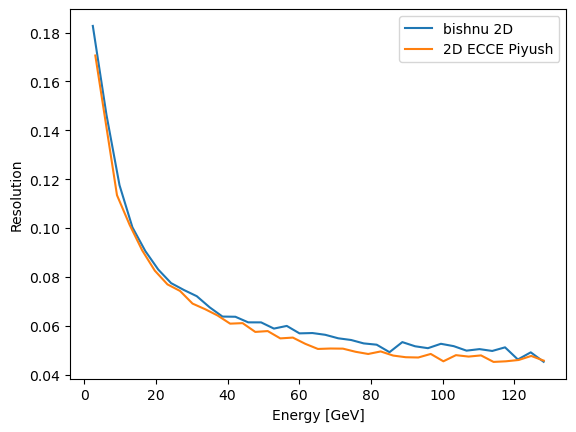

In [55]:
plt.errorbar(ds_energy_Input2D_bishnu_ECCE_1Doutput_updatedScript, ds_res_fit_Input2D_bishnu_ECCE_1Doutput_updatedScript,
            label='bishnu 2D')


plt.errorbar(ds_energy_2D_piyush, ds_res_fit_2D_piyush, label='2D ECCE Piyush')
plt.xlabel("Energy [GeV]")
plt.ylabel("Resolution")
plt.legend()

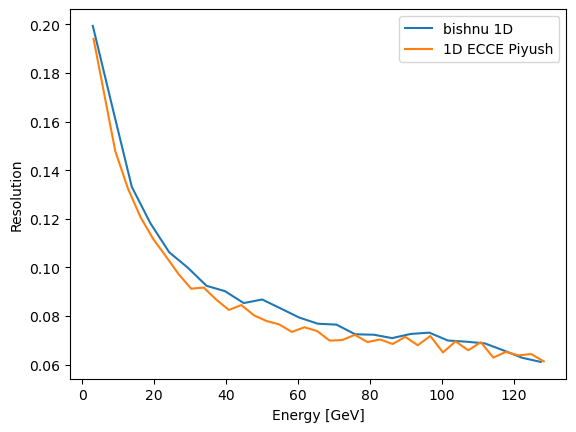

In [58]:
plt.errorbar(ds_energy_Input1D_bishnu_ECCE_1Doutput_updatedScript, ds_res_fit_Input1D_bishnu_ECCE_1Doutput_updatedScript,
            label='bishnu 1D')
plt.errorbar(ds_energy_1D_piyush, ds_res_fit_1D_piyush, label='1D ECCE Piyush')
plt.xlabel("Energy [GeV]")
plt.ylabel("Resolution")
plt.legend()

## Extract the Fit parameters resolution and Scale from Piyush training using Discrete Data 

In [20]:
input_features=4
#approach='deepsets'
approach='graphnet'
path_to_piyush='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
discrete_inference/piyush_result_1D-4D_InputFeatures'
result_dir=f'predictions_appended_{approach}_{input_features}D.npz'

data=np.load(f'{path_to_piyush}/{result_dir}')

In [21]:
target_ene=data['targets_scaled']
pred_ene=data['outputs_scaled']

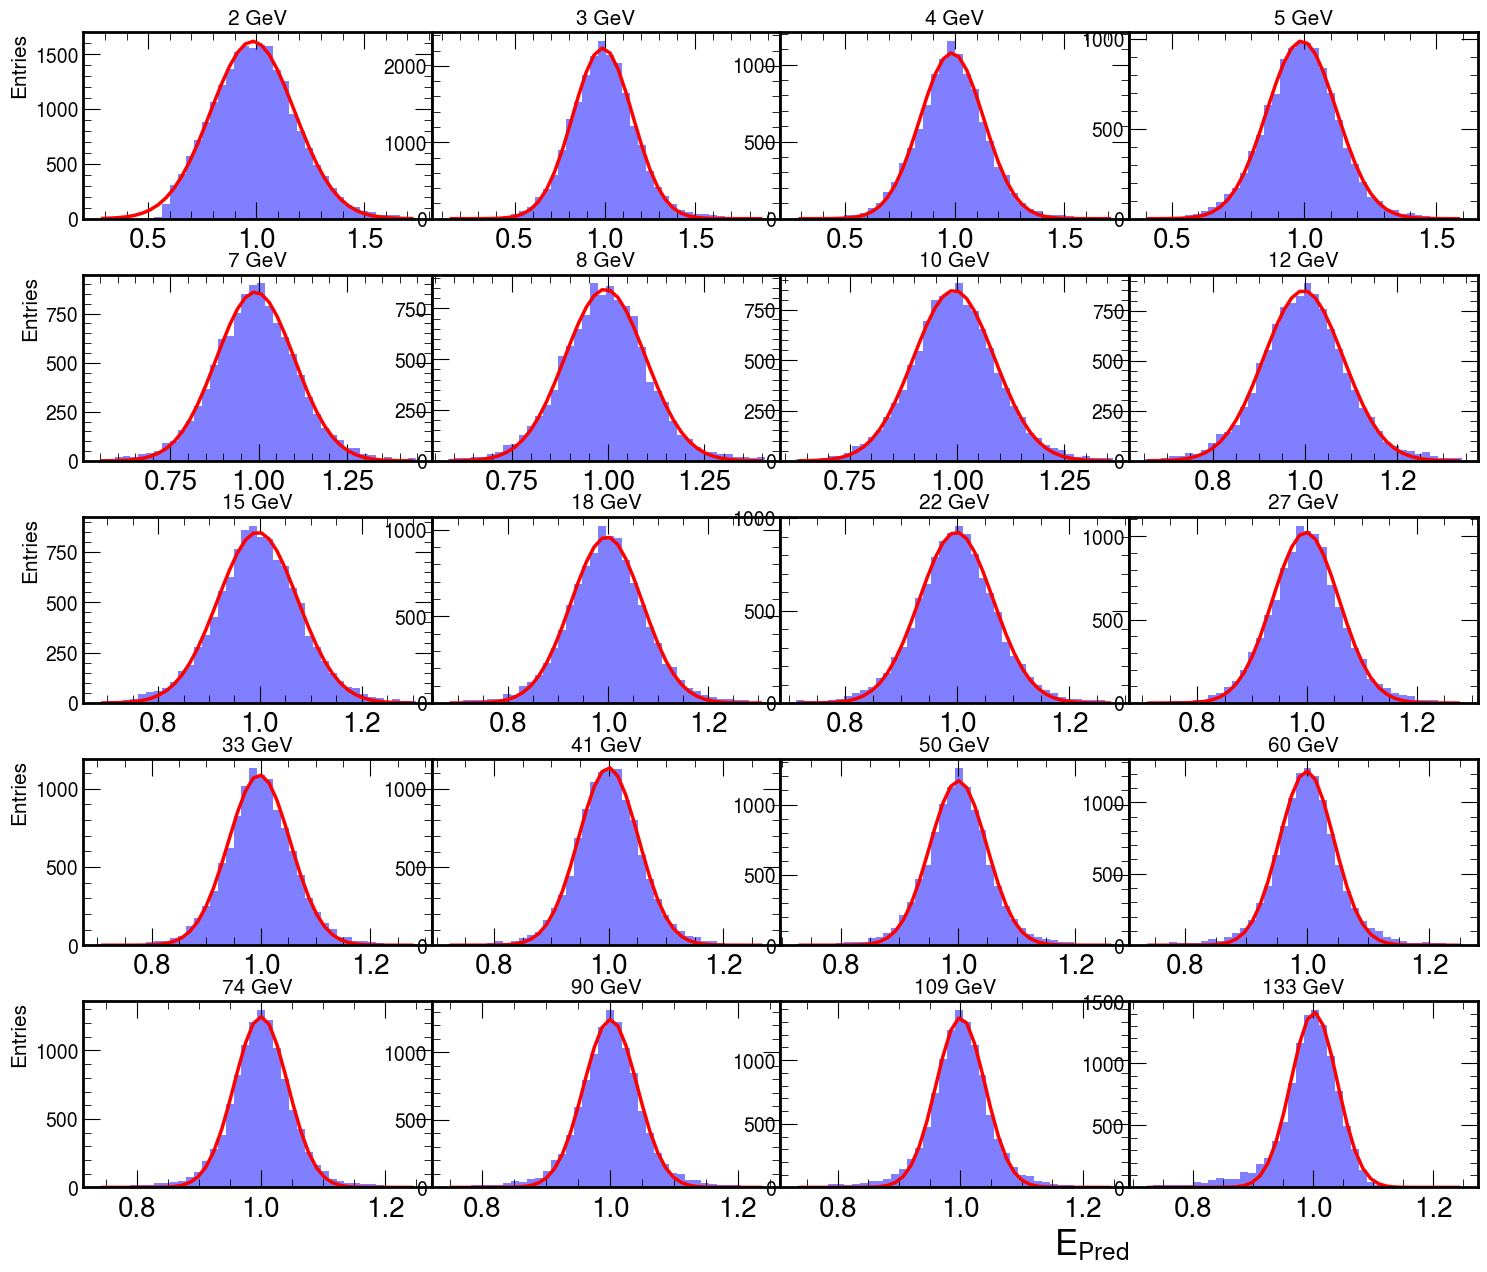

In [22]:
nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='discrete'
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=2
max_val=130
Nbins=26

if data_type=='continuous':
    Nbins=26
    binning=np.linspace(min_val, max_val, Nbins)
elif data_type=='discrete':
    binning=[ 2, 3, 4, 5, 7, 8, 10, 12, 15, 18, 22, 27, 33, 41, 50, 60, 74,90, 109, 133, 150]
#binning=np.linspace(min_val, max_val, Nbins)

mask=target_ene>1.3
pred_ene_mask=pred_ene[mask]
target_ene_mask=target_ene[mask]

resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(target_ene_mask,pred_ene_mask, binning, nbins, data_type, particle, 'energy', fit=fit_dist, plot_range=0.6)

In [24]:
output_dim=1
#approach='graph'
approach='graph'
name_tag=f'ds_{output_dim}D_output_'
particle='pp'
#input_dim='4D'
learning_rate='e3'
latent_size=64
error_type='mse'
num_layer=4


    #include_ecal=False
particle_detector=f'{input_features}D_piyush'
    

#true_fit=np.round(true_fit,2)    
print_parameter(true_fit, approach +'_energy',particle_detector ) 
#print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
print_parameter(resolution_fit, approach +'_res_fit', particle_detector ) ## sigma over mean fit 
print_parameter( pred_over_truth_fit, approach +'_scale_median', particle_detector )

graph_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
graph_res_fit_4D_piyush=np. array([0.200242, 0.169721, 0.14801 , 0.134654, 0.112682, 0.10604 ,
       0.095394, 0.08696 , 0.079006, 0.071803, 0.066224, 0.060836,
       0.057117, 0.052062, 0.048421, 0.044854, 0.043011, 0.041739,
       0.039855, 0.038486])
graph_scale_median_4D_piyush=np. array([0.983676, 0.987915, 0.987713, 0.990477, 0.990704, 0.992832,
       0.992831, 0.997063, 0.995847, 0.997023, 0.99829 , 0.998026,
       0.996847, 0.999621, 1.00032 , 0.998911, 1.000095, 1.00054 ,
       1.000383, 1.001598])


<ErrorbarContainer object of 3 artists>

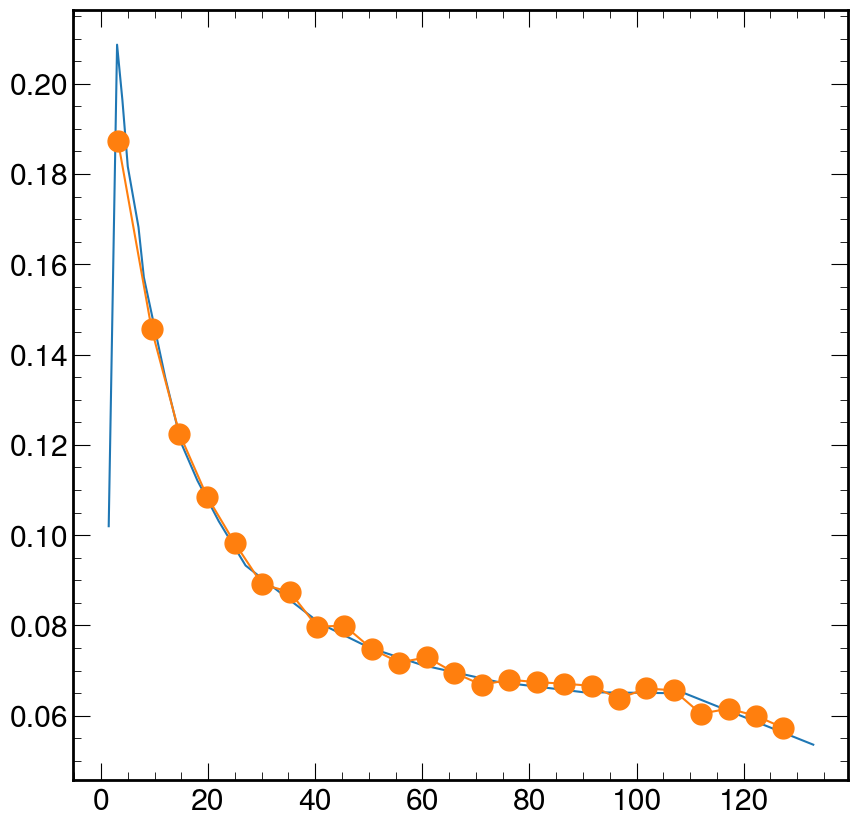

In [21]:
## 1D deepsets#####
ds_energy_1D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_1D_piyush=np. array([0.237299, 0.208636, 0.196307, 0.181649, 0.168228, 0.157109,
       0.146026, 0.134882, 0.120319, 0.112107, 0.103063, 0.093275,
       0.087698, 0.080394, 0.075144, 0.071222, 0.067517, 0.065226,
       0.064975, 0.053601])
ds_scale_median_1D_piyush=np. array([0.97896 , 0.995032, 0.991876, 0.99185 , 0.988618, 0.994128,
       0.990392, 0.994048, 0.996182, 0.996979, 0.998218, 1.000313,
       0.999235, 1.000373, 1.001333, 1.001872, 1.00228 , 1.001383,
       1.003553, 0.998134])

## 2D Deepsets #####
ds_energy_2D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_2D_piyush=np. array([0.21601 , 0.187788, 0.166659, 0.149615, 0.132334, 0.12297 ,
       0.110728, 0.102695, 0.091899, 0.083294, 0.075993, 0.069369,
       0.064367, 0.059433, 0.054824, 0.050619, 0.047847, 0.046343,
       0.044921, 0.040494])
ds_scale_median_2D_piyush=np. array([0.975173, 0.986678, 0.98762 , 0.989685, 0.989581, 0.991298,
       0.989249, 0.994719, 0.995072, 0.996142, 0.996767, 0.998563,
       0.997451, 1.000381, 1.000945, 0.999761, 0.999902, 1.002389,
       1.001638, 1.001654])

## 4D Deepsets #####
ds_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
ds_res_fit_4D_piyush=np. array([0.214297, 0.189506, 0.16531 , 0.15202 , 0.12893 , 0.121123,
       0.108781, 0.100069, 0.090362, 0.082286, 0.075196, 0.06798 ,
       0.062594, 0.058485, 0.053639, 0.050004, 0.0471  , 0.044577,
       0.043786, 0.039804])
ds_scale_median_4D_piyush=np. array([0.976951, 0.985615, 0.989044, 0.989917, 0.98992 , 0.990864,
       0.989973, 0.995482, 0.994417, 0.995705, 0.995961, 0.99777 ,
       0.996169, 0.99825 , 0.999461, 0.998633, 1.000228, 1.000437,
       1.001119, 1.001662])

## 4D graph #####
graph_energy_4D_piyush=np. array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,  22.,
        27.,  33.,  41.,  50.,  60.,  74.,  90., 109., 133.])
graph_res_fit_4D_piyush=np. array([0.200242, 0.169721, 0.14801 , 0.134654, 0.112682, 0.10604 ,
       0.095394, 0.08696 , 0.079006, 0.071803, 0.066224, 0.060836,
       0.057117, 0.052062, 0.048421, 0.044854, 0.043011, 0.041739,
       0.039855, 0.038486])
graph_scale_median_4D_piyush=np. array([0.983676, 0.987915, 0.987713, 0.990477, 0.990704, 0.992832,
       0.992831, 0.997063, 0.995847, 0.997023, 0.99829 , 0.998026,
       0.996847, 0.999621, 1.00032 , 0.998911, 1.000095, 1.00054 ,
       1.000383, 1.001598])


plt.errorbar(ds_energy_1D_piyush_discrete, ds_res_fit_1D_piyush_discrete)
plt.errorbar(ds_energy_1D_piyush, ds_res_fit_1D_piyush,
             marker='o',label='DeepSets 1D',markersize='15') #,markerfacecolor='none'

## Resolution and energy scale using the discrete data set 
##  Output = 3D, ECAL + HCAL , Angle 10 - 30 deg
## Different Z seg or Input = 1d, 2D, 3D and 4D

In [121]:
granularity='with_input_features' #, 'with_input_features' #z_seg
#
output_dim=3
#/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/discrete_inference/Input2D_Output3D_ecal_hcal
if granularity=='with_input_features':
    input_features=2
    path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/discrete_inference'
    result=f'Input{input_features}D_Output{output_dim}D_ecal_hcal_try'
    
elif granularity=='z_seg':
    n_Z_layers=1
    path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/discrete_inference/z_segmentation'
    result=f'Zseg_{n_Z_layers}Z_Output{output_dim}D_ecal_hcal'
    
path_to_stat=f'{path}/{result}/test'
path_to_result=f'{path}/{result}'







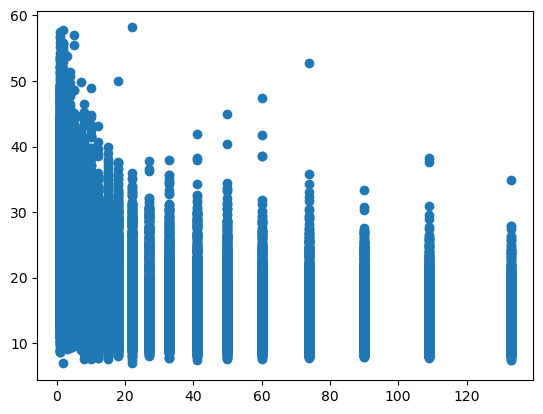

In [4]:
plt.scatter(target_ene,pred_ene)

## Inspect the continuous training (1D, 2D ..4D)

In [160]:
#path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30'
path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output/Deepset_Models/\
ECAL_HCAL_range_angle'
#granularity='z_sections' #, 'with_input_features' #z_seg
granularity='with_input_features'
n_Z_layers=1
output_dim=3


if granularity=='with_input_features':
    input_features=1      ### CHANGES MAY REQUIRED HERE
    
    if input_features==4:
        block='Block_20230601_0630_concatTrue'
    elif input_features==1:
        block='Block_20230601_0851_concatTrue'
    '''
    if input_features==1:
        block='Block_20230818_0958_concatTrue'
    elif input_features==2:
        block='Block_20230817_0915_concatTrue'
    elif input_features==3:
        block='Block_20230818_1754_concatTrue'
    elif input_features==4:
        #block='Block_20230816_1911_concatTrue'  
        block='Block_20230822_1712_concatTrue'
    '''   
        
    result=f'results_{input_features}D_size64_lre3_4Lay_pp_mse'# _nhits_gt2'
    path_to_stat=f'{path}/preprocessed_data_pp_{input_features}D/test' #_nhits_gt2/test'
    path_to_result=f'{path}/{result}/{block}'
    
elif granularity=='z_sections':  
        ### CHANGES MAY REQUIRED HERE
    
    #result=f'results_{input_features}D_size64_lre3_4Lay_pp_mse'
    if n_Z_layers==1:
        #block='Block_20230820_2253_concatTrue'
        block='Block_20230825_0931_concatTrue'  ## ECAL + HCAL 
    elif n_Z_layers==2:
        block='Block_20230822_0647_concatTrue'
    elif n_Z_layers==4:
        block='Block_20230822_1334_concatTrue'
    elif n_Z_layers==8:
        block='Block_20230821_0821_concatTrue'
    elif n_Z_layers==16:
        block='Block_20230821_1424_concatTrue'
    elif n_Z_layers==32:
        block='Block_20230821_1926_concatTrue'   
        
        
    elif n_Z_layers==5:
        print("M I here")
        block='Block_20230825_0035_concatTrue' 
        
    result=f'results_{n_Z_layers}Z_seg_size64_lre3_4Lay_pp_mse'
    path_to_stat=f'{path}/z_segmentation/preprocessed_data_pp_{n_Z_layers}Z_seg/test'  #z_segmentaion_models
    
    path_to_result=f'{path}/z_segmentation/{result}/{block}'
    


means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'), compression='gzip')
def get_loss_curve():
    npz_unpacked_loss = np.load(path_to_result+"/losses.npz")
    loss = npz_unpacked_loss['training']
    val_loss = npz_unpacked_loss['validation']
    #Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here
    plt.plot(loss[:,-1],label='train ')
    plt.plot(val_loss[:,-1], label='val')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.ylim(0.0,0.5)
    plt.legend()
#get_loss_curve()

## CONTINUOUS DATA 
if output_dim==3:
    target_ene, pred_ene, target_theta, pred_theta, target_phi, pred_phi=\
    get_3D_inference_from_discrete_data( path_to_result, path_to_stat, granularity)  
    
    
elif output_dim==1:
    target_ene, pred_ene=get_1D_inference_from_discrete_data(granularity, path_to_result, path_to_stat, \
                                                         file="test_predictions.npz")
fig = plt.figure(figsize=(8, 6))
plt.hist(target_ene, bins=100, histtype='step', label='true')
plt.hist(pred_ene, bins=100, histtype='step', label='pred')




fig = plt.figure(figsize=(8, 6))
plt.hist(target_theta, bins=100, histtype='step', label='true')
plt.hist(pred_theta, bins=100, histtype='step', label='pred')

fig = plt.figure(figsize=(8, 6))
plt.hist(target_phi, bins=100, histtype='step', label='true')
plt.hist(pred_phi, bins=100, histtype='step', label='pred')

print("Done")



plt.legend()

IndexError: index 2 is out of bounds for axis 1 with size 2

Text(0, 0.5, 'Pred Phi [Deg]')

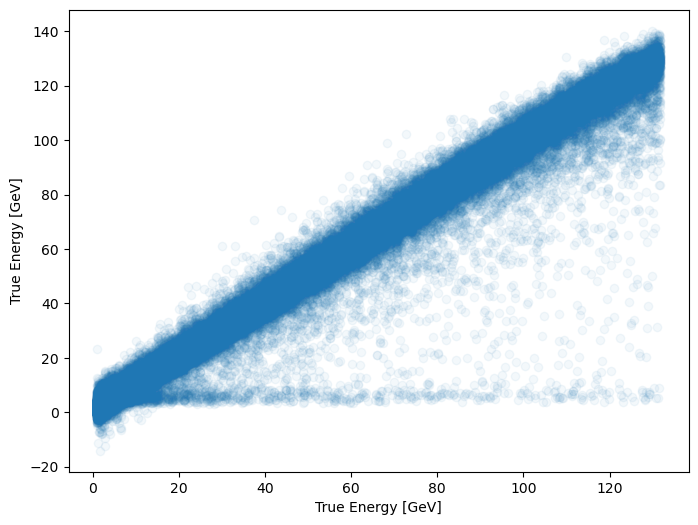

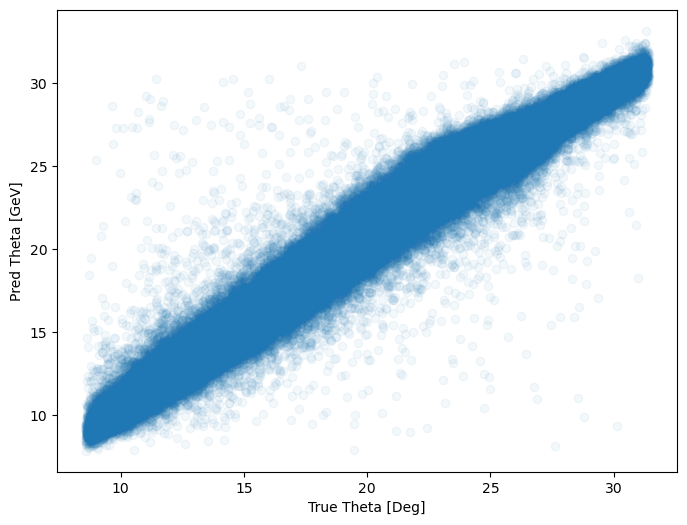

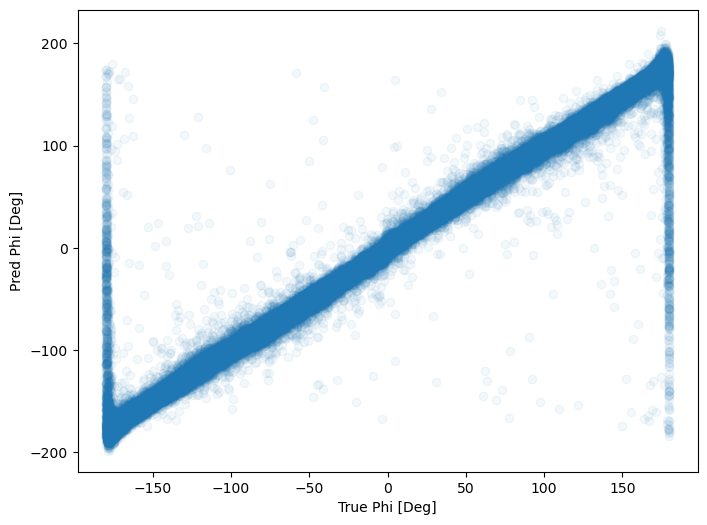

In [5]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(target_ene, pred_ene , alpha=0.05)
plt.xlabel('True Energy [GeV]')
plt.ylabel('True Energy [GeV]')
#plt.ylim(0,310)
#plt.xlim(0.75, 2)


fig = plt.figure(figsize=(8, 6))
plt.scatter(target_theta, pred_theta, alpha=0.05)
plt.xlabel('True Theta [Deg]')
plt.ylabel('Pred Theta [GeV]')


fig = plt.figure(figsize=(8, 6))
plt.scatter(target_phi, pred_phi, alpha=0.05)
plt.xlabel('True Phi [Deg]')
plt.ylabel('Pred Phi [Deg]')


## Inspect the continuous training on Different Z segmentation

In [136]:
granularity='z_sections'
output_dim=3
#granularity='full_cell_hits'
## ECCE MODEL 
#path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30'
#result=f'results_{input_features}D_size64_lre3_4Lay_pp_mse'
#path_to_stat=f'{path}/preprocessed_data_pp_{input_features}D/test'

## ATHENA MODEL 
if granularity=='z_sections':
    n_Z_layers=5
    input_features=4
    path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output/Deepset_Models/\
ECAL_HCAL_range_angle/z_segmentation/'
    result=f'results_{n_Z_layers}Z_seg_{input_features}D_size64_lre3_4Lay_pp_mse_try'
    path_to_stat=f'{path}/preprocessed_data_pp_{n_Z_layers}Z/test'  #_seg_{input_features}D
    
elif granularity=='full_cell_hits': 
    input_features=2
    #path='/media/miguel/Elements/DeepSet_models/Output3D_10_30deg_ecal_hcal_full_cell_hits'
    path='/media/miguel/Elements/DeepSet_models/Output1D_10_30deg_ecal_hcal_full_cell_hits'
    result=f'results_{input_features}D_size64_lre3_4Lay_pp_mse'
    path_to_stat=f'{path}/preprocessed_data_pp_{input_features}D/test'
'''
if input_features==1:
    #block='Block_20230818_0958_concatTrue'
    block='Block_20230715_0707_concatTrue'
elif input_features==2:
    #block='Block_20230817_0915_concatTrue'
     block='Block_20230714_2313_concatTrue'
elif input_features==3:
    #block='Block_20230818_1754_concatTrue'
    block='Block_20230714_2002_concatTrue'
elif input_features==4:
    #block='Block_20230816_1911_concatTrue'
    block='Block_20230714_1536_concatTrue'
    
'''
if (n_Z_layers==11) & (input_features==4):
    #block='Block_20230825_0548_concatTrue'
    #block='Block_20230828_0120_concatTrue'
    
    block='Block_20230826_1809_concatTrue'
elif (n_Z_layers==11) & (input_features==2):  
    
    block='Block_20230825_1943_concatTrue'
elif (n_Z_layers==11) & (input_features==1): 
    print('I am here ')
    block='Block_20230826_0025_concatTrue'

elif (n_Z_layers==5) & (output_dim==3):
    #block='Block_20230827_1016_concatTrue'
    block='Block_20230829_0629_concatTrue'
    print('I am here')
    
elif n_Z_layers==55:
    block='Block_20230828_0129_concatTrue'

'''
path_to_result=f'{path}/{result}/{block}'

def get_loss_curve():
    npz_unpacked_loss = np.load(path_to_result+"/losses.npz")
    loss = npz_unpacked_loss['training']
    val_loss = npz_unpacked_loss['validation']
    #Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here
    plt.plot(loss[:,-1],label='train ')
    plt.plot(val_loss[:,-1], label='val')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    #plt.ylim(0.0,1)
    plt.legend()

    
## CONTINUOUS DATA     
#target_ene, pred_ene, target_theta, pred_theta, target_phi, pred_phi=\
#    get_3D_inference_from_discrete_data( path_to_result, path_to_stat, granularity)   

target_ene, pred_ene=get_1D_inference_from_discrete_data(granularity, path_to_result, path_to_stat, file="test_predictions.npz")

plt.hist(target_ene, bins=100, histtype='step', label='true')
plt.hist(pred_ene, bins=100, histtype='step', label='pred')
print("Done")
'''

I am here


'\npath_to_result=f\'{path}/{result}/{block}\'\n\ndef get_loss_curve():\n    npz_unpacked_loss = np.load(path_to_result+"/losses.npz")\n    loss = npz_unpacked_loss[\'training\']\n    val_loss = npz_unpacked_loss[\'validation\']\n    #Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here\n    plt.plot(loss[:,-1],label=\'train \')\n    plt.plot(val_loss[:,-1], label=\'val\')\n    plt.xlabel("Epoch")\n    plt.ylabel("Loss (MSE)")\n    #plt.ylim(0.0,1)\n    plt.legend()\n\n    \n## CONTINUOUS DATA     \n#target_ene, pred_ene, target_theta, pred_theta, target_phi, pred_phi=#    get_3D_inference_from_discrete_data( path_to_result, path_to_stat, granularity)   \n\ntarget_ene, pred_ene=get_1D_inference_from_discrete_data(granularity, path_to_result, path_to_stat, file="test_predictions.npz")\n\nplt.hist(target_ene, bins=100, histtype=\'step\', label=\'true\')\nplt.hist(pred_ene, bins=100, histtype=\'step\', label=\'pred\')\nprint("Done")\n'

In [21]:
def read_root_files_chain_local(data_dir, hadronic_detector, start,total_files, ecal_hcal_both=True):
   
    root_files_total = np.sort(glob.glob(data_dir+'*root'))
    file_list=root_files_total[start:total_files]
    #print('Hello ', file_list, '   ', data_dir )    
    genP=[]
    cluster_sums_hcal=[]
    cluster_sums_ecal=[]
    tot_energy=[]
    thetas=[]
    for file_num in file_list:
        #print(file_num)
        ur_tree=ur.open(file_num)['events']
        num_entries=ur_tree.numentries
        print("Total Entries. == ", num_entries)
        
        genPx = ur_tree.array('MCParticles.momentum.x')[:,2]
        genPy = ur_tree.array('MCParticles.momentum.y')[:,2]
        genPz = ur_tree.array('MCParticles.momentum.z')[:,2]
        mass = ur_tree.array("MCParticles.mass")[:,2]
        root_gen_P = np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
        gen_energy=np.sqrt(root_gen_P**2 + mass**2)
        theta = np.arccos(genPz/root_gen_P)*180/np.pi
        
        cluster_sum_hcal= get_cluster_sum_from_hits(hadronic_detector, ur_tree)
        if ecal_hcal_both:
            cluster_sum_ecal= get_cluster_sum_from_hits('ecal', ur_tree)
            total_clust_energy = cluster_sum_hcal +  cluster_sum_ecal
            cluster_sums_ecal.append(cluster_sum_ecal)
                   
        else:
            total_clust_energy = cluster_sum_hcal
            
        cluster_sums_hcal.append(cluster_sum_hcal)  
    
        genP.append(gen_energy)
        thetas.append(theta)

        tot_energy.append(total_clust_energy)
        
     
    #print(cluster_sums_hcal.shape)
    combined_cluster_sums_hcal= np.concatenate(cluster_sums_hcal)   
    combined_genP = np.concatenate(genP)
    combined_thetas=np.concatenate(thetas)
    
    combined_total_energy=np.concatenate(tot_energy)
    #print(combined_total_energy)
    
    if ecal_hcal_both:
        combined_cluster_sums_ecal= np.concatenate(cluster_sums_ecal)
        return combined_genP, combined_thetas, combined_cluster_sums_hcal,  combined_cluster_sums_ecal, combined_total_energy 
    else:
        combined_cluster_sums_ecal=combined_cluster_sums_hcal ## if there is not ecal then hcal = ecal for easy ness
        return combined_genP, combined_thetas, combined_cluster_sums_hcal,  None, combined_total_energy


## Strawman approach

In [25]:
hadronic_detector='hcal'
angle_range='10_30deg'
ecal_hcal_both=False

start=0
total_files=1
approach='straw'

## Same size that of HCAL
data_dir='/media/miguel/Elements/calice_sim_data/calice_pi+_log10discrete_1Gev_150GeV_5deg_13deg_Fe_09_23_size_6by6_hcal_size/'
#data_dir='/media/miguel/Elements/calice_sim_data/calice_Fe_log10continuous_Size_equal_to_ECCE_HCAL_10_30deg_1_90Gev_09_20/'
## size equivalent to CALICE
#data_dir='/media/miguel/Elements/calice_sim_data/calice_pi+_log10discrete_1Gev_150GeV_5deg_13deg_Fe_09_23_size_6by6/'


#data_dir='/media/miguel/Elements/calice_sim_data/calice_Fe_log10continuous_Size_equal_to_ECCE_HCAL_10_30deg_1_90Gev_09_20/'
#data_dir='/media/miguel/Elements/calice_sim_data/calice_pi+_log10discrete_80Gev_80GeV_5deg_13deg_Fe_09_23_size_3by3/'

#data_dir='/media/miguel/Elements/calice_sim_data/calice_Fe_log10continuous_10_30deg_1_90Gev_09_20/'
#data_dir='/media/miguel/Elements/calice_sim_data/calice_pi+_log10continuous_1Gev_150GeV_5deg_13deg_Fe_09_23/'
#data_dir='/media/miguel/Elements/calice_sim_data/calice_pi+_log10continuous_1Gev_150GeV_5deg_13deg_Fe_09_23_size_3by3/'
print(data_dir)
combined_genP, combined_thetas, combined_cluster_sums_hcal,  combined_cluster_sums_ecal, combined_total_energy=\
read_root_files_chain(data_dir, hadronic_detector, start,total_files, ecal_hcal_both) 


/media/miguel/Elements/calice_sim_data/calice_pi+_log10discrete_1Gev_150GeV_5deg_13deg_Fe_09_23_size_6by6_hcal_size/
Total Entries. ==  5000


In [25]:
#plt.hist(np.rint(combined_genP))
#plt.scatter(combined_genP, combined_total_energy)
print(np.unique(np.rint(combined_genP)))

[  1.   2.   3.   4.   5.   7.   8.  10.  12.  15.  18.  22.  27.  33.
  41.  50.  60.  74.  90. 109. 133.]


(array([220., 537., 590., 555., 611., 567., 569., 551., 557., 243.]),
 array([ 8.686113, 10.955839, 13.225564, 15.49529 , 17.765015, 20.03474 ,
        22.304466, 24.574192, 26.843916, 29.113642, 31.383368]),
 <BarContainer object of 10 artists>)

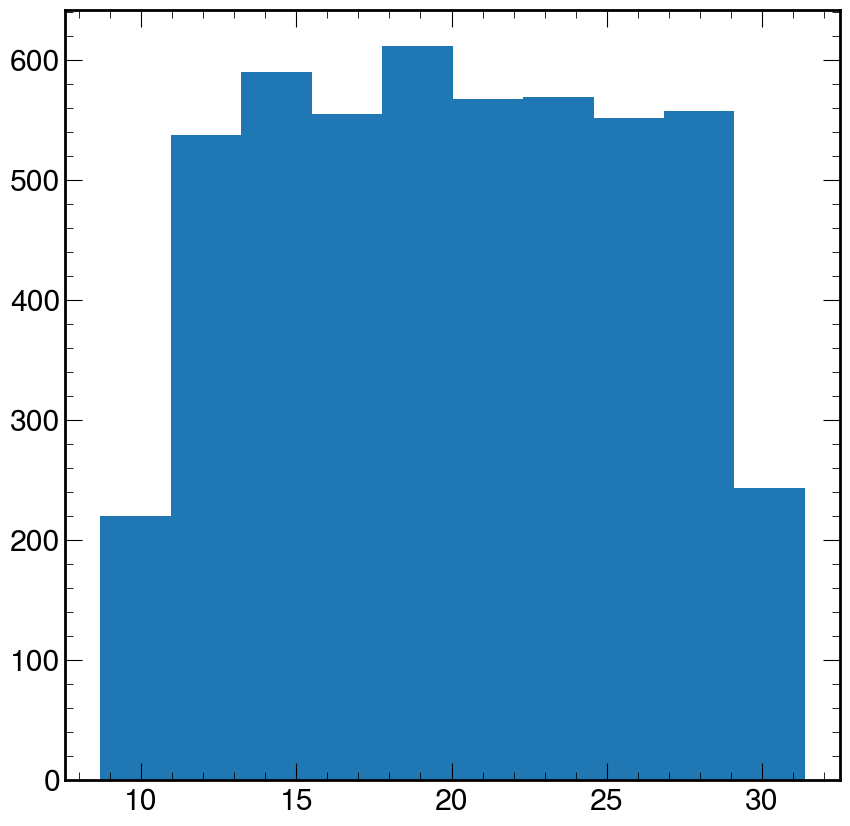

In [26]:
plt.hist(combined_thetas)

In [15]:
def get_res_scale_fit_log10_log2_local(truth,pred, binning, nbins, data_type, particle, label='energy', fit='True', plot_range=3):   
    N_Bins=len(binning)
    plot_range=3
    FIT_SIGMA=2 ## fit within +- 3 sigma                                                                                                                                                                                                             
    row=math.ceil(np.sqrt(N_Bins-1))
    if (row**2-N_Bins)>1:
        col=row-1
    else:
        col=row

    resolution_arr=[]
    mean_arr=[]
    resolution_cor_arr=[]
    scale_arr=[]
    avg_truth_arr=[]
    slices_arr=[]
    slices_pred_truth_arr=[]
    slices_truth_arr=[]
    scale_median_arr=[]
    
    res_stdev_pred_median_arr=[]
    res_sigma_median_arr=[]
    
    if label=='energy':
        xtitle='$E_{Pred}$'
        unit='GeV'
        
    elif label=='theta':
        xtitle='Theta (Deg)'
        unit='Deg'
       
    elif label=='phi':
        xtitle='Phi (Deg)'
        unit='Deg'    
    elif label=='theta-energy':
        xtitle=r'$\Theta_{pred} - \Theta_{true}$' 
        unit='GeV'
        
    elif label=='phi-energy':
        xtitle=r'$\phi_{pred} - \phi_{true}$' 
        unit='GeV'    
       
        
    else:
        print('PLEASE PROVIDE THE VARIABLE YOU WANT TO REGRESS')
        return
    
    #fig,axs = plt.subplots(row,col, figsize=(22, 10),sharex=True,constrained_layout=True)
    fig,axs = plt.subplots(row,col, figsize=(18, 15),sharex=False)#,constrained_layout=True)
    plt.subplots_adjust(wspace=0, hspace=0.3)
    if (len(truth) != len(pred)):
        print("truth and prediction arrays must be same length")
        #return
    if data_type=='discrete':
        print("I am discrete data set")
        truth=np.rint(truth)
    
    indecies = np.digitize(truth,binning)-1 #Get the bin number each element belongs to.
    indecies=np.where(indecies < 0, 0, indecies)
    #if any(indecies<0): print(indicies)
    max_count = np.bincount(indecies).max()
    slices = np.empty((N_Bins,max_count))
    
    slices_truth=np.empty((N_Bins,max_count))
    slices_truth.fill(np.nan)
    
    #slices_pred_truth=np.empty((N_Bins,max_count))
    #slices_pred_truth.fill(np.nan)
    
    slices.fill(np.nan)
    
    scale_array = np.empty((N_Bins,max_count+1))
    scale_array.fill(np.nan)

    counter = np.zeros(N_Bins,int) #for getting mean from sum, and incrementing element number in bin                                                                
    avg_truth = np.zeros(N_Bins,float)
    pred_over_truth = np.zeros(N_Bins,float)
    xticks=np.linspace(0,100,6)
    one_ytics=round(max_count,-3)## round to thousand                                                                                                                
    yticks=np.linspace(0,one_ytics,6)
    
    #print(binning)
    
    for i in range(len(pred)):
        bin = indecies[i]
        if (bin>=N_Bins): continue
        slices[bin][counter[bin]] = pred[i] #slice_array[bin number][element number inside bin] = pred[i]                                                            
        slices_truth[bin][counter[bin]] = truth[i]
        
        avg_truth[bin]+=truth[i]
        #if truth[i]<=0:
        #    truth[i]=999
        pred_over_truth[bin] += pred[i]/truth[i]
        scale_array[bin][counter[bin]] = pred[i]   #/truth[i]
        counter[bin]+=1
    counter[counter == 0] = 1
    
    avg_truth = avg_truth/counter

    #stdev_pred = np.nanstd(slices,axis=1)
    #avg_pred   = np.nanmean(slices,axis=1)
    
    stdev_pred = np.nanstd(scale_array,axis=1)
    avg_pred   = np.nanmean(scale_array,axis=1)
    
    stdev_truth = np.nanstd(slices_truth,axis=1)
    scale_median_comp=np.nanmedian(scale_array,axis=-1)
    median_pred=np.nanmedian(slices,axis=-1)
    #median_scale = np.nanmedian(scale_array,axis=-1)
    #print(avg_pred)
    
    for ii in range(0,N_Bins-1):
        ## guess parameters for fitting                                                                                                                              
        mean_guess=avg_pred[ii]
        sigma_guess=stdev_pred[ii]
        #print(ii,'   mean guess.  ', mean_guess,'  binning ',binning[ii], ' - ', binning[ii+1])
        
        ## min and max range for histogram to be fitted to extract resolution/scale                                                                                  
        min_range=mean_guess - plot_range*sigma_guess
        max_range=mean_guess + plot_range*sigma_guess
        
        if label=='energy':
            if min_range<0:
                min_range=0.2
        
        #print(min_range, '      min and max.  ',  max_range)
        ## mean value of range within which histogram is draw                                                                           print(                              
        #mean_here=(min_range + max_range)/2.0

        irow=int(ii/col)
        icol=int(ii%col)
        
        if irow<row:
            
            ax = axs[irow,icol]
            #count, bins,_=ax.hist(slices[ii].ravel(),bins=nbins,alpha=0.5,range=(min_range,max_range),label='HCAL',color='b',linewidth=8)
            count, bins,_=ax.hist(scale_array[ii].ravel(),bins=nbins,alpha=0.5,range=(min_range,max_range),label='HCAL',color='b',linewidth=8)
            
            count=count[~np.isnan(count)]
            bins=bins[~np.isnan(bins)]
            
            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
            
          
            # PARAMETER BOUNDS ARE NOT USED FOR NOW
            if fit:
                mean, std=gaussian_fit_on_distribution(FIT_SIGMA, sigma_guess, mean_guess, binscenters,  count,ax, min_range, max_range)
                #, binning[i], binning[i+1])
            else:
                mean=mean_guess
                std=sigma_guess
        
            for_plot=round(avg_truth[ii])
            y_text_val=int(np.max(count))*0.7
            print('mean =[]', mean)
            print('std = [', std)
            if data_type=='continuous':
                ax.set_title("{0:.1f} - {1:.1f} {2} ".format(binning[ii],  binning[ii+1], unit ) , fontsize=15)
            else: 
                ax.set_title("{0} {1}".format(binning[ii], unit), fontsize=15)
        
            
            if ((irow==row-1) & (icol==int(col/2))):
                ax.set_xlabel('{0}'.format(xtitle),fontsize=25) 
    
            if icol==0:
                ax.set_ylabel("Entries",fontsize=15)


            #plt.savefig(file_name)
            #ax.set_xticks(fonstsize=20)
            ax.tick_params(axis='x', labelsize=20)
            ax.tick_params(axis='y', labelsize=14)
            
            #scale_median=scale_median_comp[ii]
            scale=mean/avg_truth[ii]
            #scale=mean
            
            mean_arr.append(mean)
            avg_truth_arr.append(avg_truth[ii])
            #avg_truth_arr.append(slices_truth[ii])
            #resolution=std
            
            if label=='energy':
                resolution=std /mean #scale    #Scale corrected Strawman
                
                #resolution_scale_corr=(stdev_pred[ii]/avg_truth[ii])/scale_median  ## this is std vs median
                #resolution_scale_corrected=np.nan_to_num(resolution_scale_corr)

                #res_stdev_pred_median=stdev_pred[ii]/median_pred[ii]

                #res_sigma_median=std/avg_truth[ii]
                slices_pred_truth= (slices[ii] - slices_truth[ii])/slices_truth[ii]

                
                
                #resolution_cor_arr.append(resolution_scale_corrected)
                scale_arr.append(scale)
                slices_arr.append(slices[ii])
                
                #scale_median_arr.append(scale_median)


                slices_pred_truth_arr.append(slices_pred_truth)

                #res_stdev_pred_median_arr.append(res_stdev_pred_median)
                #res_sigma_median_arr.append(res_sigma_median)
            elif label=='theta' or label=='phi' or label =='theta-energy' or label =='phi-energy':
                 resolution=std
                
            else:
                print("Please provide the right label like energy or theta")
            resolution_arr.append(resolution)
            
        else:
            continue
            
    if label=='energy' or label=='theta-energy' or label=='phi-energy':      
        return resolution_arr, scale_arr, avg_truth_arr, slices_arr, slices_pred_truth_arr
    else:
        return avg_truth_arr, resolution_arr, scale_arr, mean_arr

/tmp/ipykernel_733534/4071029907.py:103: RuntimeWarning: Mean of empty slice
  avg_pred   = np.nanmean(scale_array,axis=1)


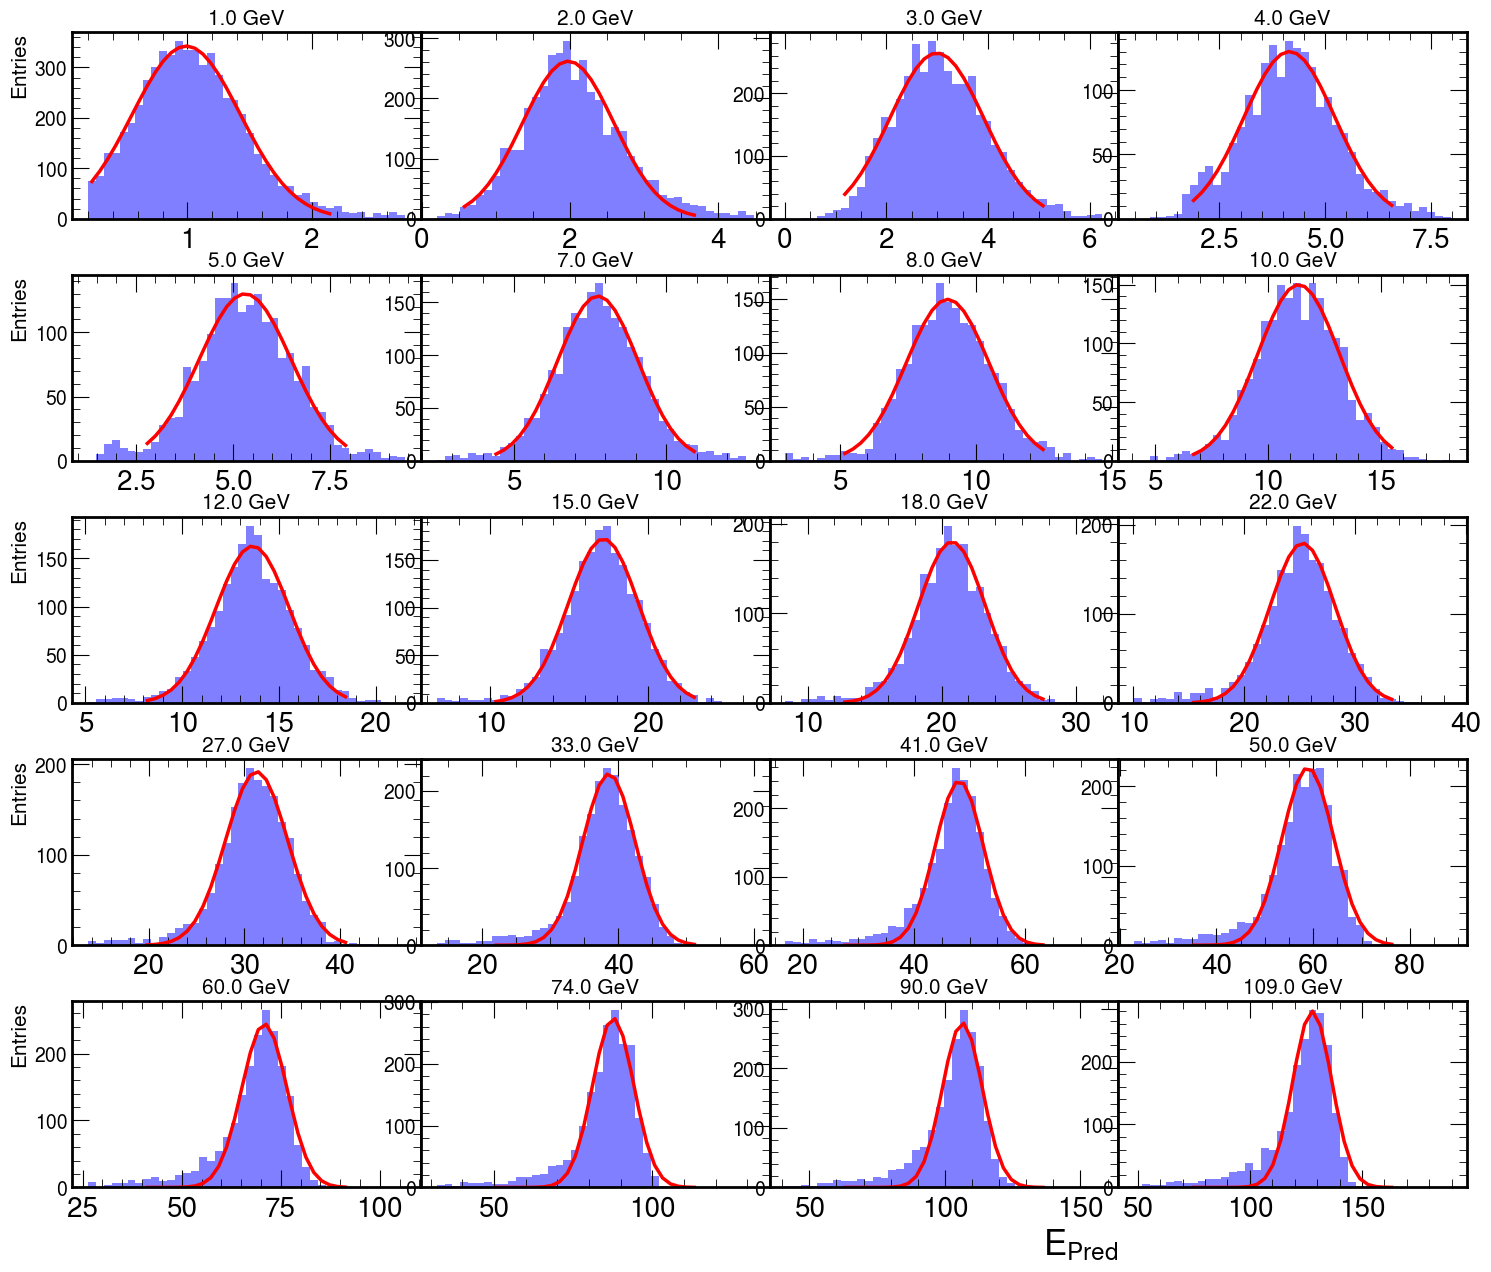

In [12]:
nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
#data_type='continuous'
data_type='discrete'
particle='pp'

#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=1
max_val=85
#Nbins=37
if (data_type=='discrete'):
    #binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133, 150]
    binning=[1.,   2.,   3.,   4.,   5.,   7.,   8.,  10. , 12.,  15.,  18.,  22.,  27.,  33.,
  41.,  50.,  60.,  74.,  90., 109., 133., 150]
    
    #binning=[80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80]
    
elif (data_type=='discrete') and (particle=='neutron'):
    binning=[10, 11, 12, 13, 14, 16, 17, 19, 21, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 70, 77, 85,\
             93, 103, 114, 125, 138, 152, 168, 185, 204, 225, 248, 274, 302]
    
elif data_type=='continuous':    
    binning=np.linspace(min_val, max_val, Nbins)
    #print(binning, max_val, '   ', min_val)
    
    
    
    
#theta_mask=combined_thetas>0
    
#theta_mask=combined_genP>-1
#combined_total_energy_mask=combined_total_energy[theta_mask]
#combined_genP_mask=combined_genP[theta_mask]



resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth, =get_res_scale_fit_log10_log2_local(
    combined_genP, combined_total_energy,  binning, nbins,data_type, particle, 'energy', fit_dist, plot_range=2)

In [13]:
input_features=4
approach='straw_'
output_dim=2
absorber='Fe'
particle_detector=f'calice_Fe'
name_tag=f'ds_{output_dim}D_output_'
particle='pp'

#true_fit=np.round(true_fit, 0)    
print_parameter(true_fit, approach +'energy',particle_detector ) 
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )

straw_energy_calice_Fe=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,
        22.,  27.,  33.,  41.,  50.,  60.,  74.,  90., 109.])
straw_res_fit_calice_Fe=np. array([0.436983, 0.312998, 0.309217, 0.259182, 0.22284 , 0.169989,
       0.170274, 0.159385, 0.138609, 0.129472, 0.120097, 0.116178,
       0.103879, 0.099697, 0.089444, 0.090692, 0.080434, 0.074079,
       0.068862, 0.067804])
straw_scale_median_calice_Fe=np. array([  0.990337,   1.974569,   2.992536,   4.155243,   5.309323,
         7.757596,   8.954768,  11.361342,  13.641037,  17.162932,
        20.761167,  25.279501,  31.295419,  38.622542,  48.138838,
        58.912178,  70.878892,  87.624427, 106.440512, 127.819879])


path_to_result /media/miguel/Elements/bishnu/calice_sim_data/calice_hcal_only_deepset_models/results_input4D_output1D_Fe_calice_hcalSize/ECCE_20230926-1826_deepsets_4D      c  test_predictions.npz


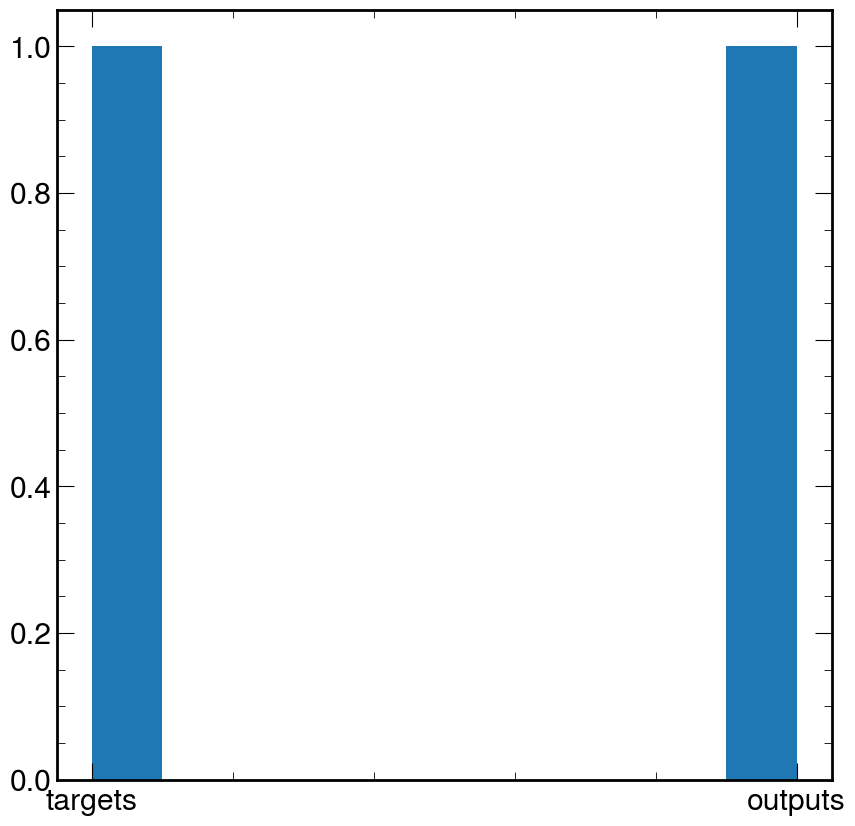

In [28]:
#granularity='z_sections'
#n_z_sections=4


input_features=4
output_dim=1
path='/media/miguel/Elements/bishnu/calice_sim_data/calice_hcal_only_deepset_models'
#path='/media/miguel/Elements/bishnu/calice_sim_data'
path_to_stat=f'{path}/preprocessed_input4D_output1D_Fe_calice_hcalSize'
pred_file='test_predictions.npz'
#pred_file='predictions_appended_calice_hcalSize.npz'

block_name='ECCE_20230926-1826_deepsets_4D'
    
path_to_result=f'{path}/results_input4D_output1D_Fe_calice_hcalSize/{block_name}'    
#path_to_result=\
#calice_hcal_only_deepset_models//'
    
def get_1D_inference_from_discrete_data_local( path_to_result, path_to_stat=path_to_stat,  file=pred_file):  

    npz_unpacked = np.load(f'{path_to_result}/{file}')
    print("path_to_result", path_to_result,'     c ', file)
    plt.hist(npz_unpacked)

    #predictions_ene= npz_unpacked['outputs_scaled']
    #targets_ene = npz_unpacked['targets_scaled']
    
    predictions_arr= npz_unpacked['outputs']
    targets_arr = npz_unpacked['targets']

    #means = pickle.load(f"preprocessed_data/means.p")

    means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'), compression='gzip')
    stdvs = pickle.load(open(f"{path_to_stat}/stdvs.p", 'rb'), compression='gzip')
    
    
    #means=1.08664 #1.0594748857606133
    #stdvs=0.631086 #0.6590587379489504
    #print(means)
    #print(stdvs)
    
    targets_ene = 10**(targets_arr*stdvs['genP'] + means['genP'])
    predictions_ene=10**(predictions_arr*stdvs['genP'] + means['genP'])
    
    #targets_ene = 10**(targets_arr*stdvs + means)
    #prediction_ene=10**(predictions_arr*stdvs + means)
    
    ### PREDICTED ENERGY
    #prediction_ene=predictions_arr*stdvs['genP'] + means['genP']
    
   
      
    return targets_ene, predictions_ene   

target_ene, pred_ene=get_1D_inference_from_discrete_data_local( path_to_result)

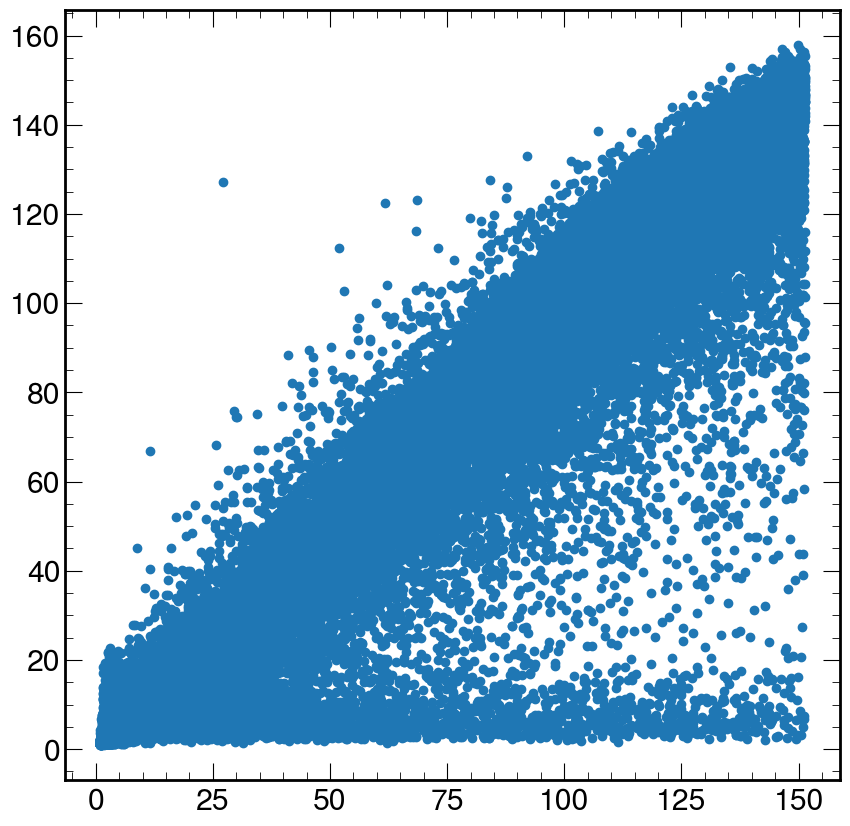

In [4]:
plt.scatter(target_ene, pred_ene)

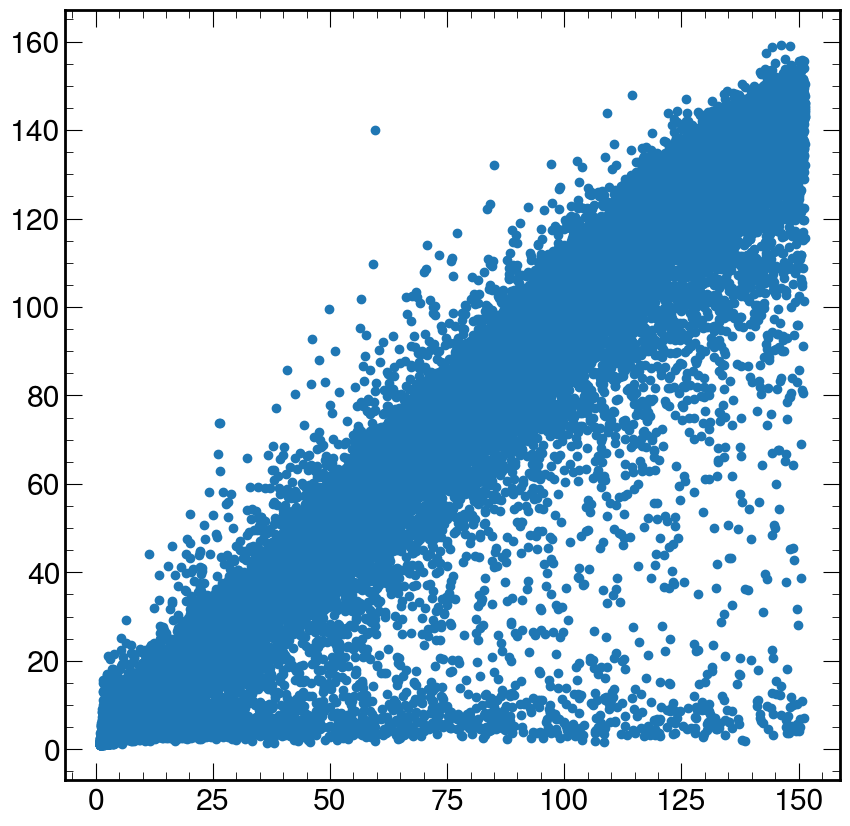

In [29]:
plt.scatter(target_ene, pred_ene)

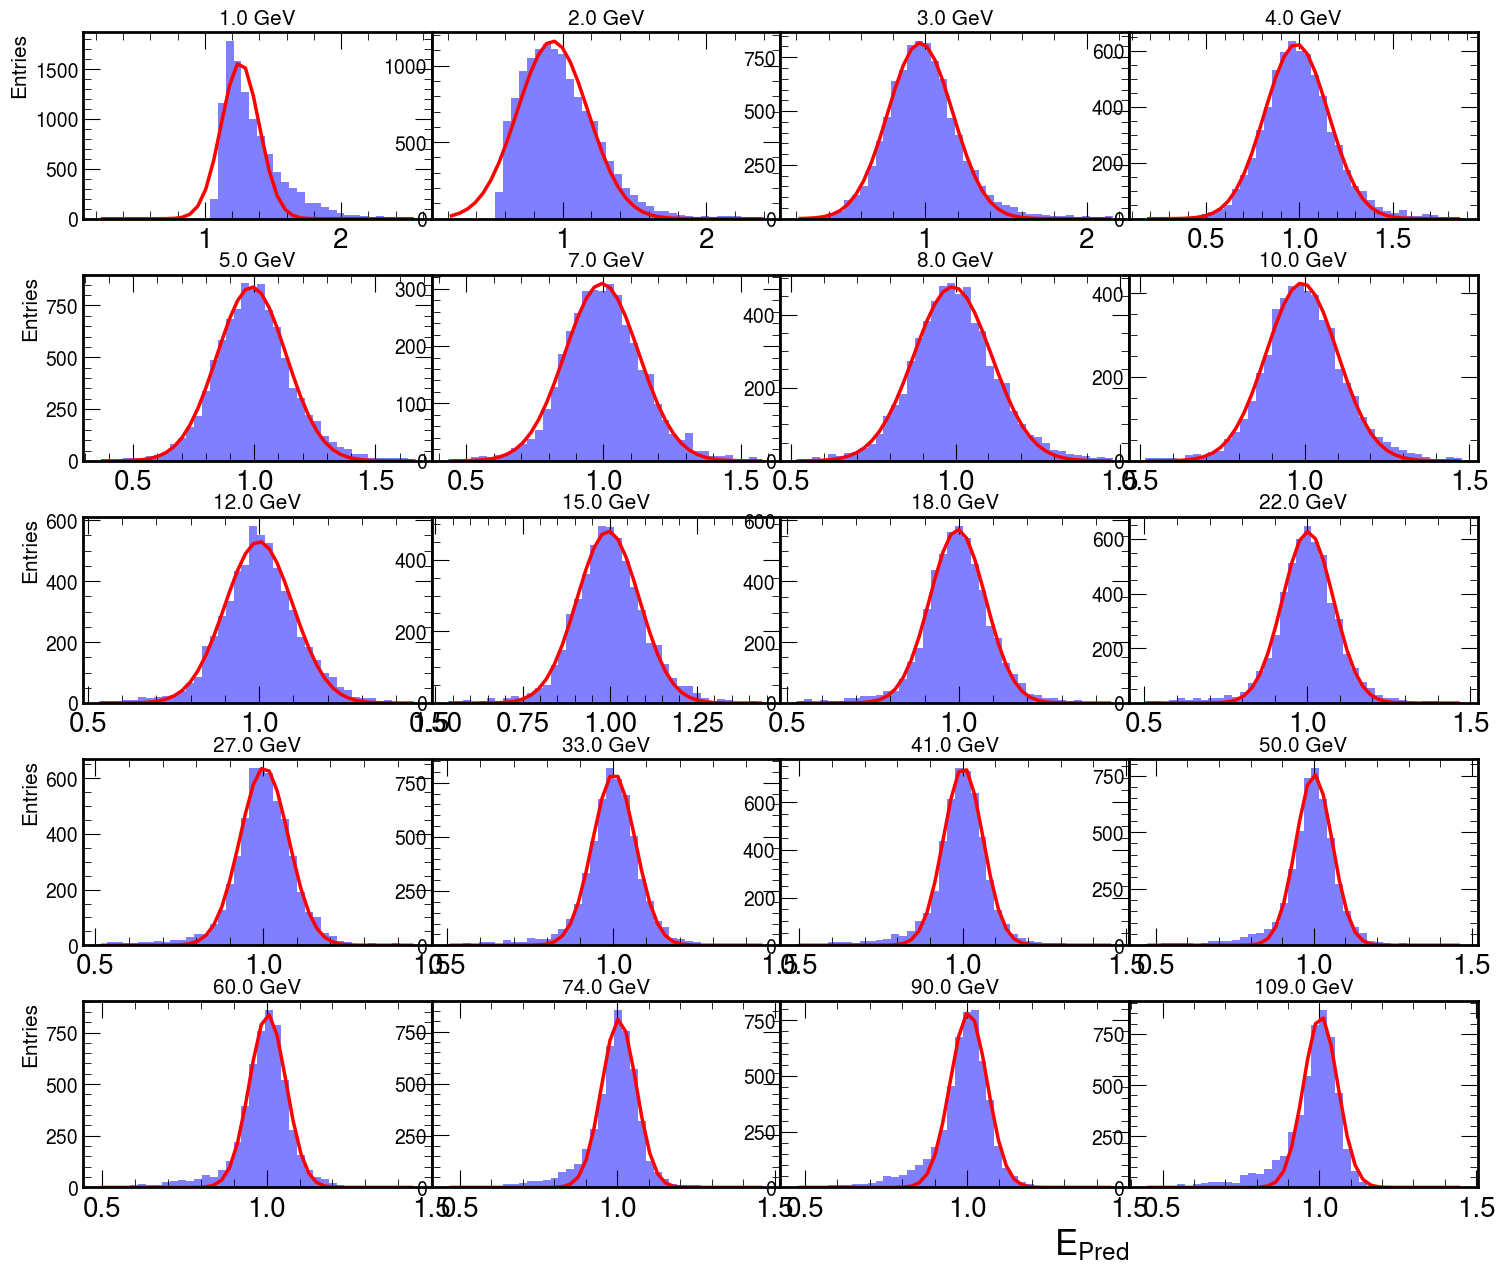

In [49]:
nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
#data_type='continuous'
data_type='discrete'
particle='pp'

#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=1
max_val=150
Nbins=26
if (data_type=='discrete'):
    #binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133, 150]
    binning=[1.,   2.,   3.,   4.,   5.,   7.,   8.,  10. , 12.,  15.,  18.,  22.,  27.,  33.,
  41.,  50.,  60.,  74.,  90., 109., 133.]
    #binning=[80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80]
    
elif (data_type=='discrete') and (particle=='neutron'):
    binning=[10, 11, 12, 13, 14, 16, 17, 19, 21, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 70, 77, 85,\
             93, 103, 114, 125, 138, 152, 168, 185, 204, 225, 248, 274, 302]
    
elif data_type=='continuous':    
    binning=np.linspace(min_val, max_val, Nbins)
    #print(binning, max_val, '   ', min_val)
    
    
    
    
#theta_mask=combined_thetas>0
    
#theta_mask=combined_genP>-1
#combined_total_energy_mask=combined_total_energy[theta_mask]
#combined_genP_mask=combined_genP[theta_mask]
#target_ene_discrete=np.rint(target_ene)


resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth, =get_res_scale_fit_log10_log2(
    target_ene, pred_ene,  binning, nbins,data_type, particle, 'energy', fit_dist, plot_range=2)

In [50]:
input_features=4
approach='ds_'
output_dim=2
absorber='Fe'
particle_detector=f'calice_Fedis_try'
name_tag=f'ds_{output_dim}D_output_'
particle='pp'

true_fit=np.floor(true_fit)    
print_parameter(true_fit, approach +'energy',particle_detector ) 
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )

ds_energy_calice_Fedis_try=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  19.,
        23.,  29.,  36.,  44.,  54.,  66.,  81.,  98., 120.])
ds_res_fit_calice_Fedis_try=np. array([0.13852 , 0.24548 , 0.200248, 0.170773, 0.143326, 0.134712,
       0.118264, 0.108813, 0.099094, 0.089329, 0.081104, 0.078126,
       0.072189, 0.064448, 0.06026 , 0.057339, 0.055674, 0.0548  ,
       0.056687, 0.054403])
ds_scale_median_calice_Fedis_try=np. array([1.259423, 0.930573, 0.96828 , 0.984156, 0.989253, 0.994203,
       0.99087 , 0.991304, 0.99927 , 0.99555 , 0.996384, 1.001946,
       1.00284 , 1.0023  , 1.001465, 1.001094, 1.003411, 1.00529 ,
       1.005082, 1.004378])


In [19]:
print(np.unique(target_ene[0:10]))

[  1.012231   1.063395   2.296963   2.870672  14.466991  32.238625
  35.911198  63.50781   71.104294 135.75304 ]


(66,)


'\ntrain_loss = npz_unpacked_loss[\'training\']\nval_loss = npz_unpacked_loss[\'validation\']\n\n\n#print(val_loss.shape)\nval_mean_loss=np.mean(val_loss, axis=1)\ntrain_mean_loss=np.mean(train_loss, axis=1)\n#print(val_mean_loss.shape)\n\nplt.plot(train_mean_loss,label=\'train \')\n\nplt.plot(val_mean_loss, label=\'val\')\n\nplt.xlabel("Epoch", fontsize=15)\nplt.ylabel("Loss (MAE)", fontsize=15)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nplt.ylim(0.06,0.12)\nplt.legend(fontsize=15)\nplt.grid()\n'

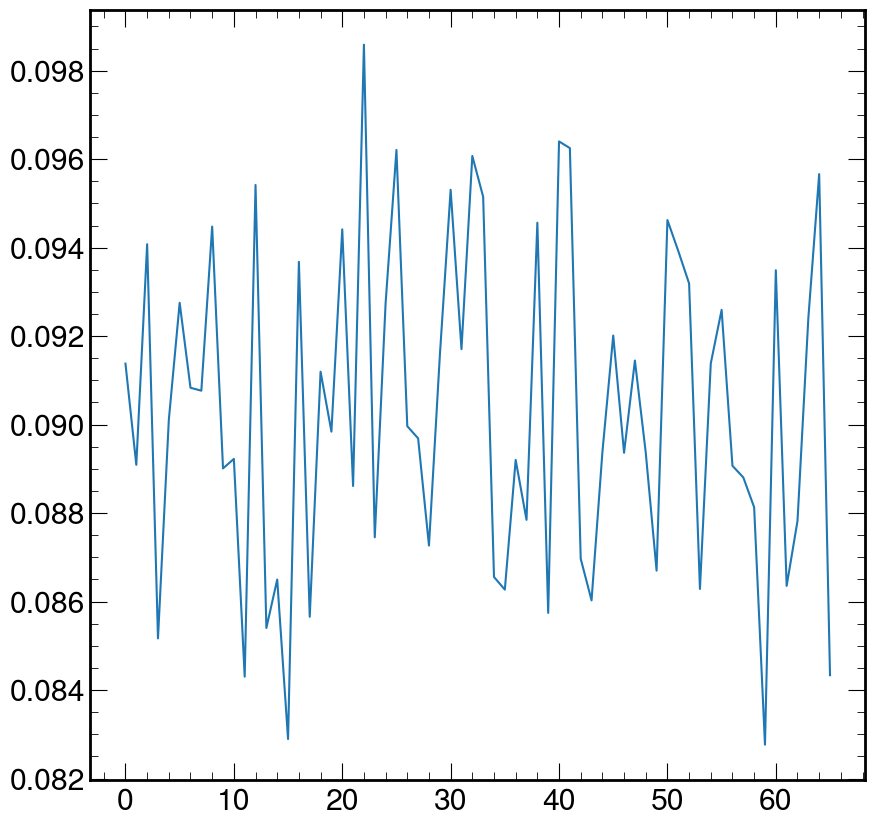

In [23]:
npz_unpacked_loss = np.load(path_to_result + "/losses.npz")
#npz_unpacked_loss = np.load(path_to_result + "/test_loss.npz")
#test_loss = npz_unpacked_loss['test']
#test_mean_loss=np.mean(test_loss, axis=1)
#print(test_loss.shape)
#plt.plot(test_loss,label='train ')

train_loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']


#print(val_loss.shape)
val_mean_loss=np.mean(val_loss, axis=1)
train_mean_loss=np.mean(train_loss, axis=1)
#print(val_mean_loss.shape)

plt.plot(train_mean_loss,label='train ')

plt.plot(val_mean_loss, label='val')

plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss (MAE)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.06,0.12)
plt.legend(fontsize=15)
plt.grid()


<ErrorbarContainer object of 3 artists>

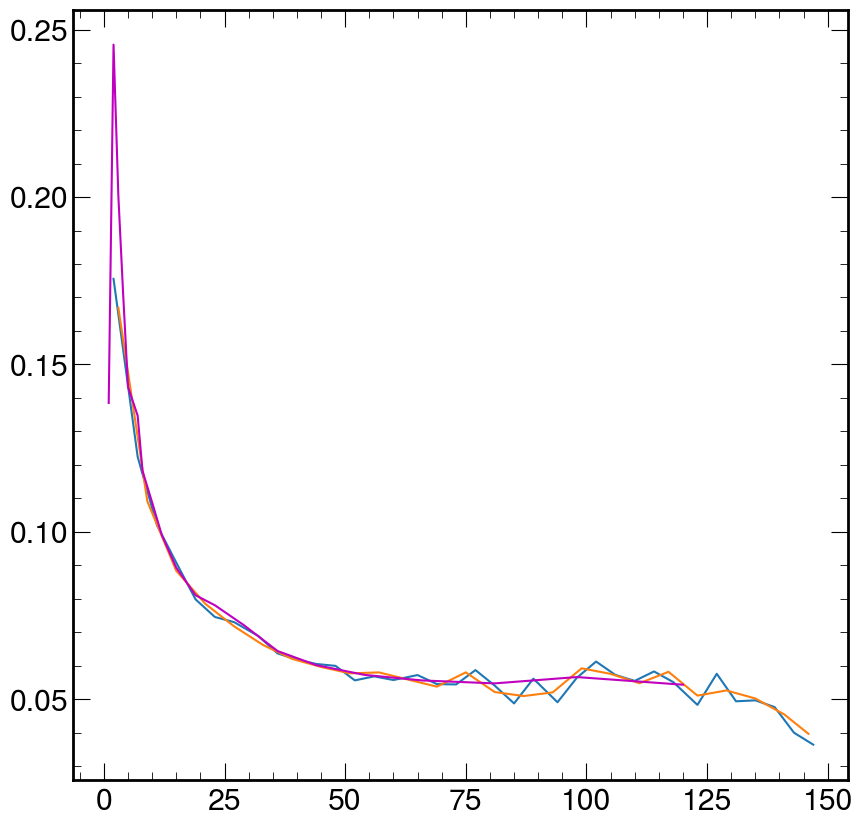

In [37]:
straw_energy_calice_Fe=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,
        22.,  27.,  33.,  41.,  50.,  60.,  74.,  90., 109.])

straw_res_fit_calice_Fe=np. array([0.436983, 0.312998, 0.309217, 0.259182, 0.22284 , 0.169989,
       0.170274, 0.159385, 0.138609, 0.129472, 0.120097, 0.116178,
       0.103879, 0.099697, 0.089444, 0.090692, 0.080434, 0.074079,
       0.068862, 0.067804])
straw_scale_median_calice_Fe=np. array([  0.990337,   1.974569,   2.992536,   4.155243,   5.309323,
         7.757596,   8.954768,  11.361342,  13.641037,  17.162932,
        20.761167,  25.279501,  31.295419,  38.622542,  48.138838,
        58.912178,  70.878892,  87.624427, 106.440512, 127.819879])


ds_energy_calice_Fedis_try=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  19.,
        23.,  29.,  36.,  44.,  54.,  66.,  81.,  98., 120.])
ds_res_fit_calice_Fedis_try=np. array([0.13852 , 0.24548 , 0.200248, 0.170773, 0.143326, 0.134712,
       0.118264, 0.108813, 0.099094, 0.089329, 0.081104, 0.078126,
       0.072189, 0.064448, 0.06026 , 0.057339, 0.055674, 0.0548  ,
       0.056687, 0.054403])
ds_scale_median_calice_Fedis_try=np. array([1.259423, 0.930573, 0.96828 , 0.984156, 0.989253, 0.994203,
       0.99087 , 0.991304, 0.99927 , 0.99555 , 0.996384, 1.001946,
       1.00284 , 1.0023  , 1.001465, 1.001094, 1.003411, 1.00529 ,
       1.005082, 1.004378])



ds_energy_Input4D_output2D_ZdcFe=np. array([ 13.66,  21.85,  30.  ,  38.03,  46.15,  54.2 ,  62.3 ,  70.36,
        78.39,  86.5 ,  94.49, 102.52, 110.66, 118.7 , 126.78, 134.82,
       142.87, 150.91, 158.95, 166.97, 175.19, 183.12, 191.37, 199.26,
       207.51, 215.33, 223.35, 231.48, 239.64, 247.73, 255.64, 263.81,
       271.73, 279.99, 287.88, 295.86])
ds_res_fit_Input4D_output2D_ZdcFe=np. array([0.096879, 0.095334, 0.080522, 0.072665, 0.064404, 0.060479,
       0.05682 , 0.053172, 0.05209 , 0.04847 , 0.04849 , 0.047058,
       0.043761, 0.043619, 0.042189, 0.041271, 0.042279, 0.038907,
       0.039308, 0.038525, 0.039479, 0.038831, 0.038143, 0.036598,
       0.037763, 0.039501, 0.03849 , 0.03715 , 0.039366, 0.036931,
       0.035057, 0.038091, 0.039369, 0.040198, 0.039752, 0.041683])
ds_scale_median_Input4D_output2D_ZdcFe=np. array([1.017114, 0.993721, 0.998943, 1.000682, 1.001505, 1.002168,
       1.002572, 1.001848, 1.00036 , 1.000509, 1.002899, 1.002123,
       1.000958, 1.005545, 1.003793, 1.00279 , 1.003036, 1.006434,
       1.004404, 1.004935, 1.005553, 1.005806, 1.002008, 1.006504,
       1.002932, 1.001516, 1.001382, 1.000184, 0.999009, 1.002433,
       1.002318, 0.996216, 0.995664, 0.994088, 0.989636, 0.986223])



ds_energy_calice_Fe36=np. array([  2.,   7.,  11.,  15.,  19.,  23.,  27.,  32.,  36.,  40.,  44.,
        48.,  52.,  56.,  60.,  65.,  69.,  73.,  77.,  81.,  85.,  89.,
        94.,  98., 102., 106., 110., 114., 118., 123., 127., 131., 135.,
       139., 143., 147.])
ds_res_fit_calice_Fe36=np. array([0.175574, 0.122429, 0.10203 , 0.090848, 0.079872, 0.074622,
       0.073078, 0.068944, 0.063736, 0.061908, 0.060602, 0.060025,
       0.055694, 0.056889, 0.055801, 0.057284, 0.054592, 0.054485,
       0.058767, 0.054121, 0.048813, 0.056205, 0.049165, 0.056465,
       0.061314, 0.057315, 0.055548, 0.058358, 0.055172, 0.048375,
       0.057666, 0.049447, 0.049735, 0.047721, 0.040083, 0.036504])
ds_scale_median_calice_Fe36=np. array([1.010923, 0.992697, 0.995811, 0.997319, 0.996625, 1.002157,
       1.002281, 1.003382, 1.002364, 1.002027, 1.002957, 1.001536,
       1.001551, 1.000811, 1.002938, 1.003185, 1.004545, 1.003462,
       1.00424 , 1.005214, 1.005552, 1.00492 , 1.002904, 1.00578 ,
       1.004956, 1.007126, 1.000494, 1.007363, 1.006071, 1.012772,
       1.001286, 0.997264, 0.995079, 0.987055, 0.981896, 0.967369])

ds_energy_calice_Fe26=np. array([  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
        69.,  75.,  81.,  87.,  93.,  99., 105., 111., 117., 123., 129.,
       135., 141., 146.])
ds_res_fit_calice_Fe26=np. array([0.166933, 0.109156, 0.08841 , 0.078576, 0.071808, 0.066248,
       0.062119, 0.059701, 0.057786, 0.058082, 0.055952, 0.053828,
       0.058089, 0.052211, 0.051021, 0.052108, 0.059303, 0.057641,
       0.05484 , 0.058256, 0.051149, 0.052692, 0.050291, 0.045525,
       0.03974 ])
ds_scale_median_calice_Fe26=np. array([1.007198, 0.993896, 0.998235, 0.998253, 1.003059, 1.003762,
       1.001465, 1.00109 , 1.001755, 1.000758, 1.002535, 1.004998,
       1.003683, 1.005255, 1.005123, 1.004071, 1.00455 , 1.007864,
       1.002637, 1.005534, 1.010525, 1.001314, 0.994624, 0.985356,
       0.970016])

ds_energy_calice_Fe=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  13.,  16.,  19.,
        24.,  29.,  36.,  45.,  54.,  66.,  81.,  99., 120.])
ds_res_fit_calice_Fe=np. array([0.107518, 0.26445 , 0.207926, 0.173585, 0.177261, 0.128201,
       0.136522, 0.11829 , 0.12213 , 0.105427, 0.106354, 0.105414,
       0.097001, 0.100642, 0.091107, 0.085242, 0.094977, 0.090282,
       0.091226, 0.090059])
ds_scale_median_calice_Fe=np. array([1.258611, 0.93504 , 0.972431, 0.984579, 0.982259, 0.989802,
       0.991239, 0.991605, 0.993532, 0.997825, 0.995346, 0.99618 ,
       1.000745, 0.997064, 0.998195, 0.997631, 0.997277, 0.99807 ,
       0.996017, 0.994768])

### CALICE UNCORRECTED
ene_calice_uncorr_pm=[9.85,  14.8,  17.9,  20.0,  24.9, 34.9, 39.8, 45.0, 49.9, 59.8, 79.9]
res_calice_uncorr_pm=[0.174, 0.147, 0.133, 0.131, 0.118, 0.0980, 0.0945, 0.0895, 0.083, 0.0760, 0.0646]



### CALICE CORRECTED GLOBAL SC
ene_calice_corr_pm=[10.1, 15.0, 18.0, 19.8, 24.8, 35.1, 40.0, 44.8, 49.8, 60.1, 80.0]
res_calice_corr_pm=[0.150, 0.121, 0.108, 0.106, 0.0920, 0.0798, 0.0740, 0.0700, 0.0650, 0.0596, 0.0537]



plt.errorbar(ds_energy_calice_Fe36, ds_res_fit_calice_Fe36)
plt.errorbar(ds_energy_calice_Fe26, ds_res_fit_calice_Fe26)
plt.errorbar(ds_energy_calice_Fedis_try, ds_res_fit_calice_Fedis_try, color='m')

Strawman 
CALICE Uncorrected
DeepSets (CALICE Fe-HCAL output 1D)
CALICE corrected
DeepSets (ZDC-Fe output 2D)


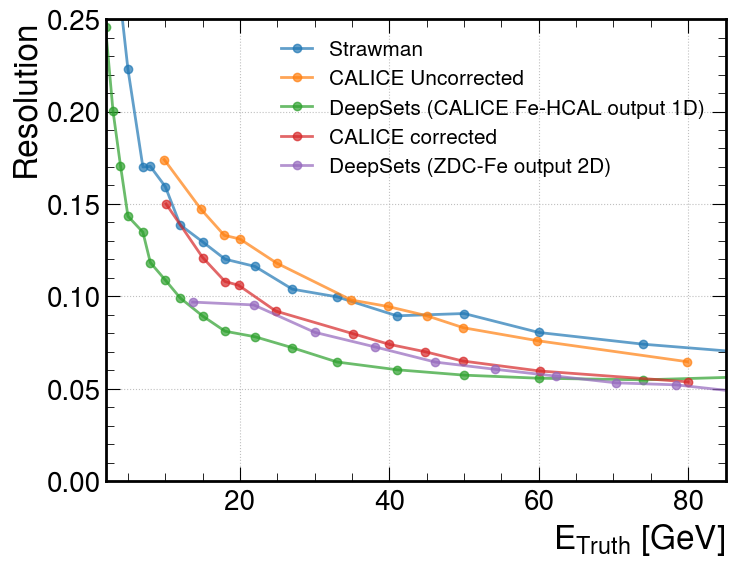

In [38]:
var_X=[straw_energy_calice_Fe,
       ene_calice_uncorr_pm,
       straw_energy_calice_Fe,
       ene_calice_corr_pm,
       ds_energy_Input4D_output2D_ZdcFe
       
      
       
     ]
#plt.errorbar(straw_energy_calice_Fe, straw_res_fit_calice_Fe)
#plt.errorbar(ene_calice_uncorr_pm, res_calice_uncorr_pm)fe
labels=[ "Strawman ", 'CALICE Uncorrected', "DeepSets (CALICE Fe-HCAL output 1D)" ,'CALICE corrected', "DeepSets (ZDC-Fe output 2D)"]

var_Y_res=[straw_res_fit_calice_Fe, 
            res_calice_uncorr_pm,
            ds_res_fit_calice_Fedis_try,
           res_calice_corr_pm, 
           ds_res_fit_Input4D_output2D_ZdcFe
           
           
           #straw_res_fit_calice_Fe1[::2]
           
          ]

particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[2,85]
ylim_max=[0.0,0.25]


draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')
plt.grid()

<ErrorbarContainer object of 3 artists>

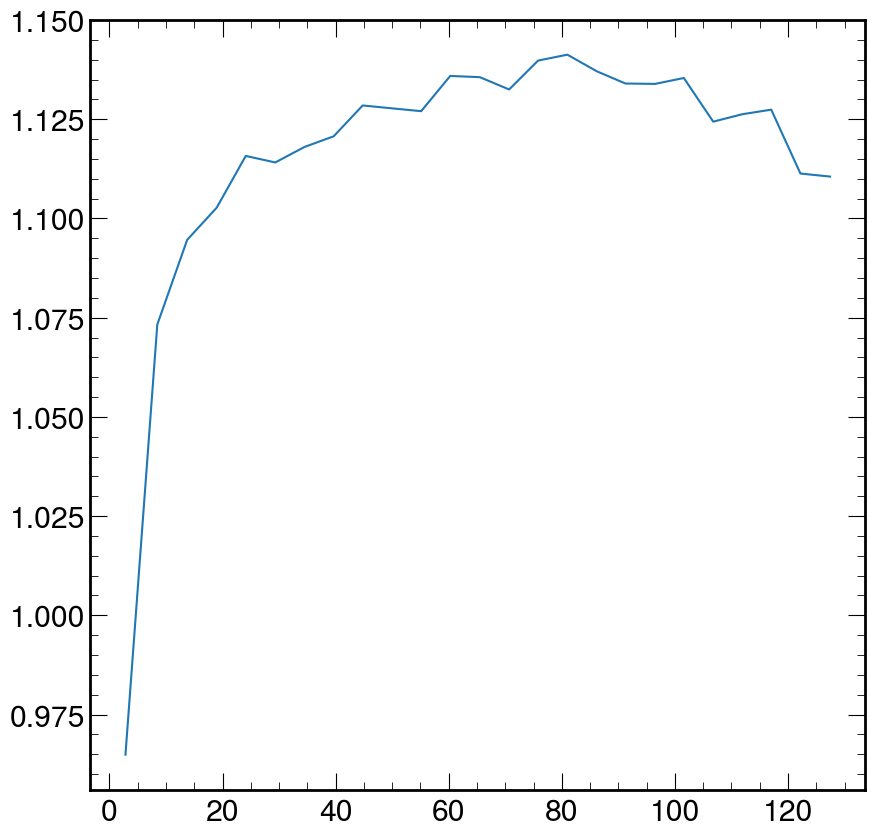

In [15]:
plt.errorbar(straw_energy_calice_Fe, straw_scale_median_calice_Fe)

(array([ 367.,   80.,   58.,   56.,   53.,   60.,   88.,   83.,  139.,
         170.,  225.,  395.,  774., 1288., 1468., 1528., 1409., 1269.,
        1278., 1213., 1203., 1119., 1056.,  995.,  933.,  868.,  904.,
         806.,  797.,  704.,  669.,  581.,  481.,  429.,  313.,  189.,
          98.,   46.,   11.,    3.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200.]),
 [<matplotlib.patches.Polygon at 0x7ff1248d6d60>])

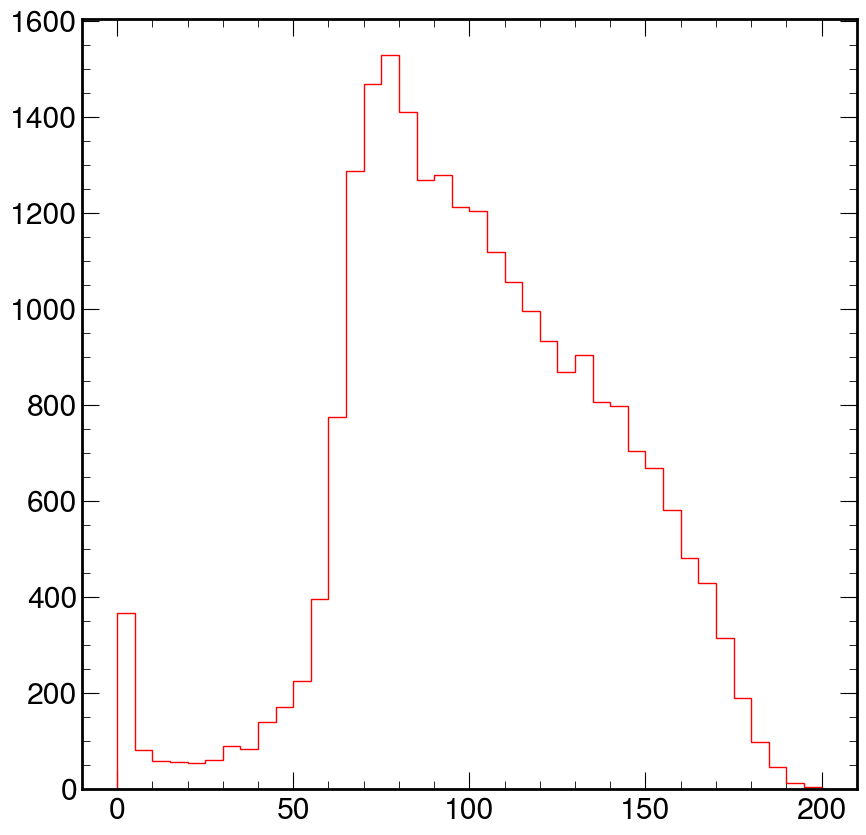

In [31]:
energy_min=45
energy_max=55
mask_genP=(combined_genP>energy_min) & (combined_genP>energy_max)
#combined_genP=np.rint(combined_genP)
ratio=np.divide(combined_total_energy,  combined_genP)
#plt.hist(combined_genP, bins=20, range=(40, 60), histtype='step', color='b')
plt.hist(combined_total_energy[mask_genP], bins=40, range=(0, 200), histtype='step', color='r' )
#mean=np.mean(combineda_total_energy)
#std=np.std(combined_total_energy)
#print(mean, 'he llo.  ', std)

(array([379.,   8.,   5.,   2.,   4.,   2.,   6.,   5.,  12.,  14.,  17.,
         29.,  16.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

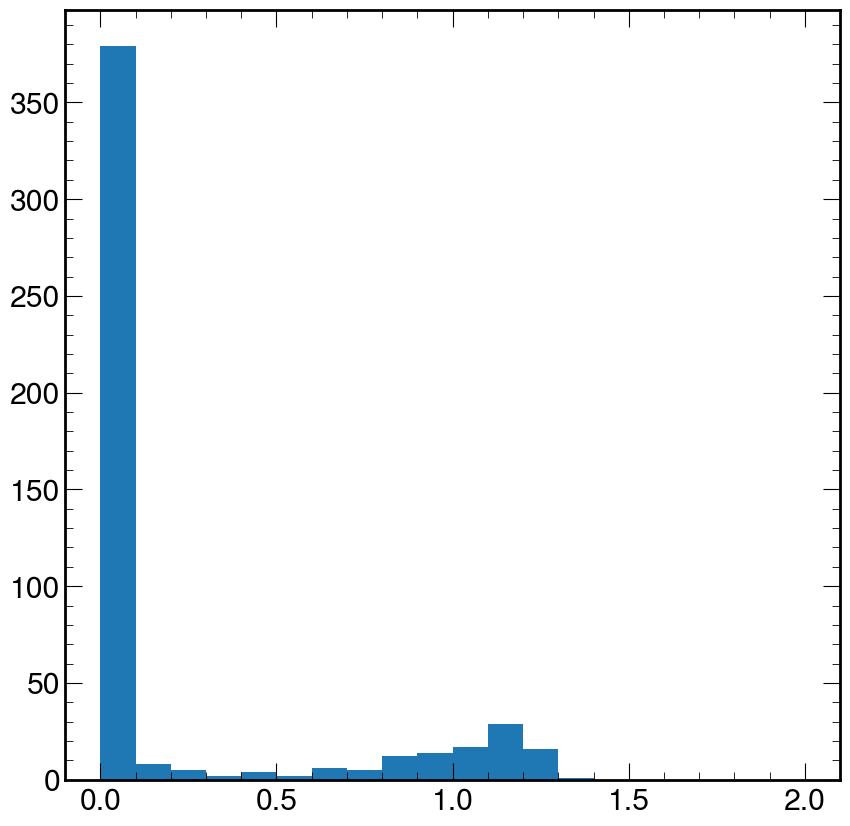

In [16]:
plt.hist(ratio, bins=20, range=(0,2))

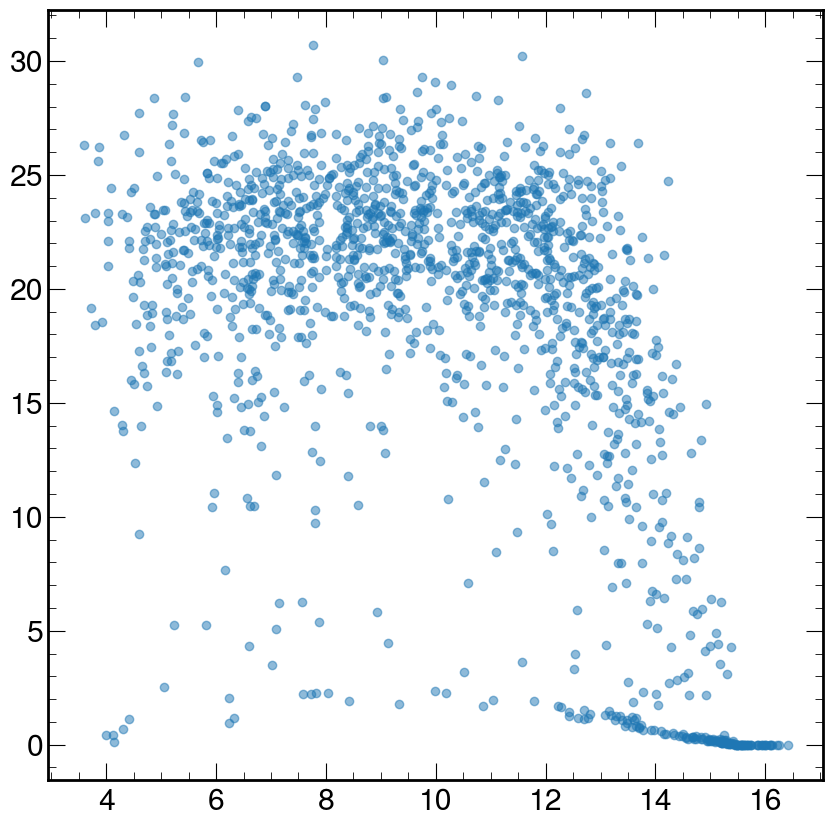

In [39]:
plt.scatter( combined_thetas, combined_total_energy, alpha=0.5)
#plt.xlim(10,40)

In [16]:
def gaussian_fit_on_distribution_local(FIT_SIGMA, sigma_guess, mean_guess, binscenters,  count, ax, min_range, max_range):
            mask=(binscenters>(mean_guess-FIT_SIGMA*sigma_guess)) & (binscenters<(mean_guess+FIT_SIGMA*sigma_guess))
            error_counts=np.sqrt(count)
            error_counts=np.where(error_counts==0,1,error_counts)
        
            param_bounds=([-np.inf,-np.inf,-np.inf], [np.inf,np.inf,np.inf])
            popt,pcov=curve_fit(gaussian,binscenters[mask],count[mask],p0=[np.max(count),mean_guess,sigma_guess],bounds=param_bounds)

            ax.plot(binscenters[mask], gaussian(binscenters[mask], *popt), color='red', linestyle='--', linewidth=3)
            
            #ax.set_xlim(math.floor(min_range),math.ceil(max_range))
            mean=popt[1]
            std=popt[2]
            return mean, std   

89.66680783123142  9.098306701100741
0.10146794472961881


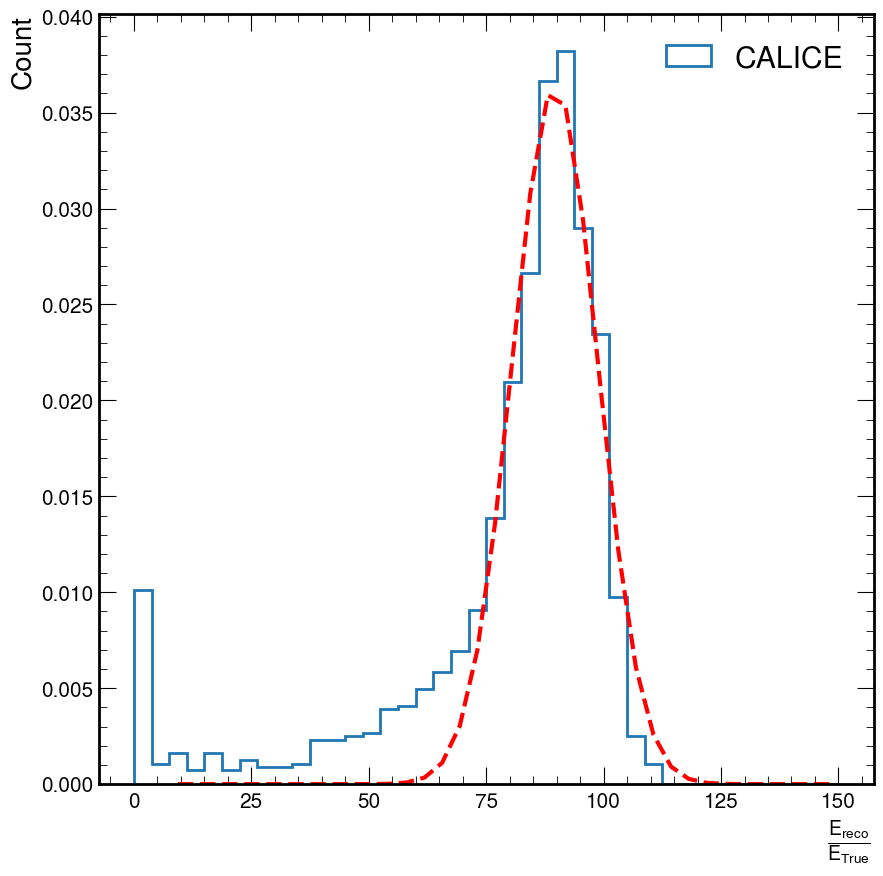

In [24]:
combined_genP=np.rint(combined_genP)
#plt.hist(combined_genP)
mask_theta=combined_thetas<13
nbins=40
#ratio_pred_truth=np.divide(combined_total_energy[mask_theta], combined_genP[mask_theta])
ratio_pred_truth=combined_total_energy_mask
counts, bins,_=plt.hist(ratio_pred_truth, bins=nbins, range=(-0,150), density=True, \
                              label="CALICE",histtype='step', linewidth=2)
          
binscenters_dp = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
mean_guess=np.mean(ratio_pred_truth)
std_guess=np.std(ratio_pred_truth)
mean, std=gaussian_fit_on_distribution_local(3, std_guess, mean_guess, binscenters_dp,  counts, plt, 0, 150)


#counts_s, bins_s,_=plt.hist(ratio_straw, bins=nbins, range=(0,2),histtype='step', linewidth=2,\
#                            density=True, label="Strawman")

#binscenters_s = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
#mean, std=gaussian_fit_on_distribution_local(3, 0.2, 1, binscenters_s,  counts_s, plt, 0, 2)


plt.xlabel("$\\frac{E_{reco}}{E_{True}}$ ", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

#plt.hist(combined_total_energy[mask_theta], bins=40, range=(0,50))
print(mean, '', std)
print(std/mean)

In [60]:
print(mean,'  std ',  std, ' res', std/mean)

1.1152522744631452   std  0.14395874829518718  res 0.12908177960406791


In [147]:
approach='ds_'
output_dim=1
name_tag=f'ds_{output_dim}D_output_'
particle='pp'

hadronic_detector='hcal'
#input_features=4
#input_dim='4D'
learning_rate='e3'
latent_size=64
error_type='mse'
incident_angle=10
#particle='pp'
num_layer=4
include_ecal=True

if include_ecal:
    ecal_status='with'
else:
    ecal_status='No'
detector_status=f'{hadronic_detector}_{ecal_status}_ecal'  
if granularity=='z_sections':
    #include_ecal=False
    particle_detector=f'{particle}_{detector_status}_Input{input_features}Z_Output{output_dim}D_L{num_layer}_lr{learning_rate}_\
size{latent_size}_{error_type}_{n_Z_layers}Z'
    
else:
    particle_detector=f'{particle}_{detector_status}_Input{input_features}D_Output{output_dim}D_L{num_layer}_lr{learning_rate}_\
size{latent_size}_{error_type}_{incident_angle}'
  
    
print_parameter(true_fit, approach +'energy',particle_detector ) 
#print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 

#print_parameter(res_sigma_median, name_tag +'res_sigma', particle_detector ) 
#print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )


ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10=np. array([  2.308916,   5.530942,   8.695872,  11.830702,  14.951797,
        18.089696,  21.207347,  24.334622,  27.449413,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031619,  46.149388,
        49.266022,  52.352143,  55.495652,  58.579826,  61.722538,
        64.824422,  67.95319 ,  71.05284 ,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621246,  89.750842,  92.846836,
        95.96986 ,  99.061075, 102.187504, 105.316681, 108.420275])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10=np. array([0.204908, 0.118829, 0.097485, 0.086302, 0.076941, 0.075338,
       0.072837, 0.065942, 0.066272, 0.057814, 0.059859, 0.056798,
       0.054516, 0.055444, 0.050416, 0.0522  , 0.053121, 0.048593,
       0.047863, 0.04898 , 0.044924, 0.047177, 0.044505, 0.042337,
       0.044708, 0.041176, 0.040624, 0.040818, 0.04228 , 0.039171,
       0.041496, 0.040066, 0.039043, 0.035066, 0.034

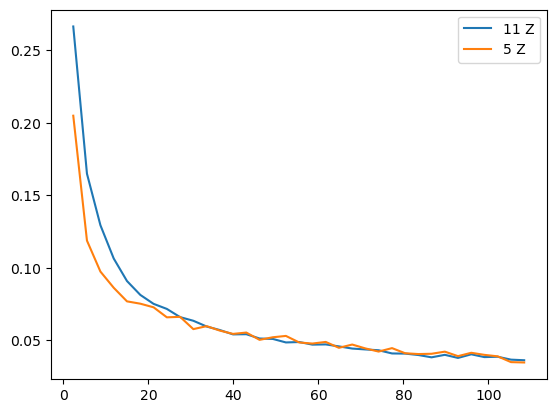

In [141]:
ds_energy_pp_hcal_with_ecal_Input4Z_Output3D_L4_lre3_size64_mse_11Z=np. array([  2.308916,   5.530942,   8.695872,  11.830702,  14.951797,
        18.089696,  21.207347,  24.334622,  27.449413,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031619,  46.149388,
        49.266022,  52.352143,  55.495652,  58.579826,  61.722538,
        64.824422,  67.95319 ,  71.05284 ,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621246,  89.750842,  92.846836,
        95.96986 ,  99.061075, 102.187504, 105.316681, 108.420275])
ds_res_fit_pp_hcal_with_ecal_Input4Z_Output3D_L4_lre3_size64_mse_11Z=np. array([0.266413, 0.164941, 0.129439, 0.106473, 0.090944, 0.081384,
       0.075228, 0.071731, 0.066079, 0.063569, 0.059599, 0.057189,
       0.054176, 0.054301, 0.051347, 0.051047, 0.048628, 0.048911,
       0.047117, 0.047262, 0.045907, 0.044414, 0.043801, 0.043244,
       0.041038, 0.04093 , 0.039955, 0.038367, 0.040088, 0.037954,
       0.040454, 0.038524, 0.03878 , 0.036769, 0.036363])


ds_scale_median_pp_hcal_with_ecal_Input4Z_Output3D_L4_lre3_size64_mse_11Z=np. array([1.203273, 1.034775, 1.009099, 1.004203, 1.006933, 1.004391,
       1.002989, 1.001961, 1.001857, 1.003254, 1.003812, 1.004661,
       1.002919, 1.00324 , 1.002648, 1.001682, 1.004476, 1.003538,
       1.006687, 1.003422, 1.003263, 1.004316, 1.004979, 1.003179,
       1.003715, 1.004855, 1.003028, 1.004944, 1.003437, 1.00479 ,
       1.003966, 1.006001, 1.007265, 1.00577 , 1.007274])


ds_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10=np. array([  2.308915,   5.530941,   8.695871,  11.830701,  14.951797,
        18.089695,  21.207346,  24.334622,  27.449414,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031618,  46.149387,
        49.266022,  52.352143,  55.495652,  58.579828,  61.722541,
        64.824423,  67.953191,  71.052841,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621247,  89.750843,  92.846839,
        95.969863,  99.061078, 102.187505, 105.316683, 108.420278])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10=np. array([0.152991, 0.120267, 0.099092, 0.091775, 0.082835, 0.078903,
       0.074893, 0.072985, 0.068187, 0.066334, 0.064282, 0.062103,
       0.06008 , 0.060865, 0.056551, 0.057089, 0.056088, 0.057025,
       0.054353, 0.054414, 0.05092 , 0.051547, 0.052445, 0.049081,
       0.052113, 0.050157, 0.047549, 0.046309, 0.043738, 0.046165,
       0.049319, 0.049072, 0.046396, 0.044468, 0.048225])

ds_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg=np. array([0.115703, 0.172074, 0.153489, 0.135938, 0.121741, 0.109599,
       0.098562, 0.088354, 0.081736, 0.07396 ,
                                                                                     0.066535, 0.062131,
       0.057021, 0.051955, 0.047515])

ds_energy_pp_hcal_with_ecal_Input4Z_Output1D_L4_lre3_size64_mse_5Z=np. array([  2.308916,   5.530942,   8.695872,  11.830702,  14.951797,
        18.089696,  21.207347,  24.334622,  27.449413,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031619,  46.149388,
        49.266022,  52.352143,  55.495652,  58.579826,  61.722538,
        64.824422,  67.95319 ,  71.05284 ,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621246,  89.750842,  92.846836,
        95.96986 ,  99.061075, 102.187504, 105.316681, 108.420275])
ds_res_fit_pp_hcal_with_ecal_Input4Z_Output1D_L4_lre3_size64_mse_5Z=np. array([0.204908, 0.118829, 0.097485, 0.086302, 0.076941, 0.075338,
       0.072837, 0.065942, 0.066272, 0.057814, 0.059859, 0.056798,
       0.054516, 0.055444, 0.050416, 0.0522  , 0.053121, 0.048593,
       0.047863, 0.04898 , 0.044924, 0.047177, 0.044505, 0.042337,
       0.044708, 0.041176, 0.040624, 0.040818, 0.04228 , 0.039171,
       0.041496, 0.040066, 0.039043, 0.035066, 0.034817])





ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_4D_old=np. array([  2.308916,   5.530942,   8.695872,  11.830702,  14.951797,
        18.089696,  21.207347,  24.334622,  27.449413,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031619,  46.149388,
        49.266022,  52.352143,  55.495652,  58.579826,  61.722538,
        64.824422,  67.95319 ,  71.05284 ,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621246,  89.750842,  92.846836,
        95.96986 ,  99.061075, 102.187504, 105.316681, 108.420275])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_4D_old=np. array([0.204908, 0.118829, 0.097485, 0.086302, 0.076941, 0.075338,
       0.072837, 0.065942, 0.066272, 0.057814, 0.059859, 0.056798,
       0.054516, 0.055444, 0.050416, 0.0522  , 0.053121, 0.048593,
       0.047863, 0.04898 , 0.044924, 0.047177, 0.044505, 0.042337,
       0.044708, 0.041176, 0.040624, 0.040818, 0.04228 , 0.039171,
       0.041496, 0.040066, 0.039043, 0.035066, 0.034817])

'''
plt.errorbar(ds_energy_pp_hcal_with_ecal_Input4Z_Output3D_L4_lre3_size64_mse_11Z,
            ds_res_fit_pp_hcal_with_ecal_Input4Z_Output3D_L4_lre3_size64_mse_11Z, label='11 Z')
plt.errorbar(ds_energy_pp_hcal_with_ecal_Input4Z_Output1D_L4_lre3_size64_mse_5Z,
ds_res_fit_pp_hcal_with_ecal_Input4Z_Output1D_L4_lre3_size64_mse_5Z, label='5 Z')
'''
plt.errorbar(ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_4D_old,
            ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_4D_old, label='4D old ')
plt.errorbar(ds_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg,
            ds_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg, label='old')
'''
plt.legend()

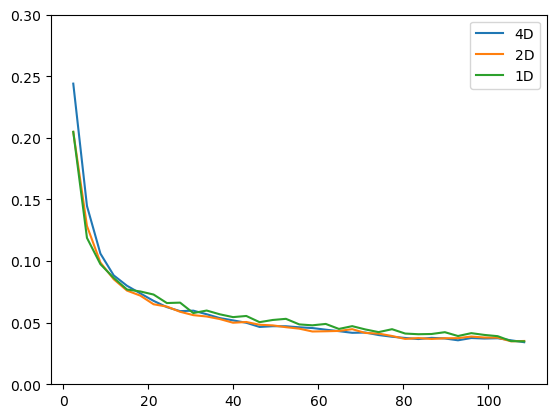

In [181]:
'''
ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10=np. array([  2.204389,   5.518044,   8.690953,  11.834411,  14.949777,
        18.0868  ,  21.203706,  24.327477,  27.440752,  30.556358,
        33.678478,  36.795043,  39.916084,  43.022279,  46.141225,
        49.254264,  52.351251,  55.49146 ,  58.600223,  61.720235,
        64.822377,  67.960046,  71.05911 ,  74.164908,  77.300559,
        80.419009,  83.528594,  86.608013,  89.764452,  92.861594,
        95.985653,  99.066337, 102.20208 , 105.336092, 108.406346])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10=np. array([0.147337, 0.103072, 0.086805, 0.08082 , 0.071937, 0.067059,
       0.064294, 0.061999, 0.058782, 0.055629, 0.053388, 0.052889,
       0.050782, 0.050636, 0.047084, 0.048001, 0.045698, 0.045619,
       0.044163, 0.043167, 0.042426, 0.044175, 0.044121, 0.042294,
       0.041852, 0.040928, 0.039677, 0.037976, 0.038267, 0.036328,
       0.037957, 0.035295, 0.037481, 0.035667, 0.035622])



ds_energy_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10=np. array([  2.204389,   5.518044,   8.690953,  11.834411,  14.949777,
        18.0868  ,  21.203706,  24.327477,  27.440752,  30.556358,
        33.678478,  36.795043,  39.916084,  43.022279,  46.141225,
        49.254264,  52.351251,  55.49146 ,  58.600223,  61.720235,
        64.822377,  67.960046,  71.05911 ,  74.164908,  77.300559,
        80.419009,  83.528594,  86.608013,  89.764452,  92.861594,
        95.985653,  99.066337, 102.20208 , 105.336092, 108.406346])
ds_res_fit_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10=np. array([0.143109, 0.102031, 0.08481 , 0.079064, 0.070717, 0.068194,
       0.064355, 0.060267, 0.057846, 0.055791, 0.054247, 0.053193,
       0.050898, 0.049256, 0.047464, 0.047363, 0.046767, 0.045936,
       0.044303, 0.042585, 0.042143, 0.042173, 0.041607, 0.040586,
       0.040246, 0.039265, 0.038705, 0.038565, 0.038259, 0.036176,
       0.037808, 0.037364, 0.039148, 0.03681 , 0.035382])

'''

ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_11Z=np. array([  2.308916,   5.530942,   8.695872,  11.830702,  14.951797,
        18.089696,  21.207347,  24.334622,  27.449413,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031619,  46.149388,
        49.266022,  52.352143,  55.495652,  58.579826,  61.722538,
        64.824422,  67.95319 ,  71.05284 ,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621246,  89.750842,  92.846836,
        95.96986 ,  99.061075, 102.187504, 105.316681, 108.420275])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_11Z=np. array([0.244035, 0.144744, 0.106068, 0.088377, 0.07996 , 0.073777,
       0.067704, 0.062633, 0.059372, 0.059756, 0.05684 , 0.053724,
       0.051878, 0.049916, 0.046543, 0.047133, 0.047093, 0.046249,
       0.045638, 0.044322, 0.043119, 0.04178 , 0.041995, 0.039954,
       0.038584, 0.037599, 0.036714, 0.037676, 0.037186, 0.035694,
       0.037547, 0.037133, 0.037365, 0.035694, 0.034147])



ds_energy_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_11Z=np. array([  2.308916,   5.530942,   8.695872,  11.830702,  14.951797,
        18.089696,  21.207347,  24.334622,  27.449413,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031619,  46.149388,
        49.266022,  52.352143,  55.495652,  58.579826,  61.722538,
        64.824422,  67.95319 ,  71.05284 ,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621246,  89.750842,  92.846836,
        95.96986 ,  99.061075, 102.187504, 105.316681, 108.420275])
ds_res_fit_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_11Z=np. array([0.20485 , 0.128519, 0.098835, 0.085246, 0.076053, 0.071962,
       0.064944, 0.063051, 0.058856, 0.056121, 0.055014, 0.052942,
       0.049959, 0.050558, 0.048299, 0.047803, 0.046343, 0.045142,
       0.042848, 0.043028, 0.043287, 0.04473 , 0.041657, 0.041148,
       0.039192, 0.036814, 0.037513, 0.036796, 0.037366, 0.037434,
       0.038746, 0.037952, 0.037864, 0.034883, 0.035144])



ds_energy_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_11Z=np. array([  2.308916,   5.530942,   8.695872,  11.830702,  14.951797,
        18.089696,  21.207347,  24.334622,  27.449413,  30.563165,
        33.703025,  36.791906,  39.906456,  43.031619,  46.149388,
        49.266022,  52.352143,  55.495652,  58.579826,  61.722538,
        64.824422,  67.95319 ,  71.05284 ,  74.16399 ,  77.324941,
        80.412091,  83.524357,  86.621246,  89.750842,  92.846836,
        95.96986 ,  99.061075, 102.187504, 105.316681, 108.420275])
ds_res_fit_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_11Z=np. array([0.204908, 0.118829, 0.097485, 0.086302, 0.076941, 0.075338,
       0.072837, 0.065942, 0.066272, 0.057814, 0.059859, 0.056798,
       0.054516, 0.055444, 0.050416, 0.0522  , 0.053121, 0.048593,
       0.047863, 0.04898 , 0.044924, 0.047177, 0.044505, 0.042337,
       0.044708, 0.041176, 0.040624, 0.040818, 0.04228 , 0.039171,
       0.041496, 0.040066, 0.039043, 0.035066, 0.034817])
plt.errorbar(ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_11Z,
           ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_11Z, label='4D')

plt.errorbar(ds_energy_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_11Z,
           ds_res_fit_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_11Z, label='2D')

plt.errorbar(ds_energy_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_11Z,
           ds_res_fit_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_11Z, label='1D')
plt.ylim(0,0.30)
plt.legend()

In [23]:
import uproot3 as ur
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
data_type='discrete'


if data_type=='continuous':
    path='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10continuous_1GeV-150GeV_10deg-30deg_07-21-23/'
    root_file='hadron_endcap_reco_pi+_log10continuous_1GeV-150GeV_theta_10deg-30deg_662402_111.edm4hep.root'
elif data_type=='discrete':
    path='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_07-23-23/'
    #root_file='hadron_endcap_reco_pi+_log10continuous_1GeV-150GeV_theta_10deg-30deg_674254_73.edm4hep.root'
    root_file='hadron_endcap_reco_pi+_log10continuous_1GeV-150GeV_theta_10deg-30deg_668745_1.edm4hep.root'
    
    
file_name=f'{path}{root_file}'


In [24]:
def read_start_stop(file_path, detector, entry_start, entry_stop):
    ur_file = ur.open(file_path)
    ur_tree = ur_file['events']
    num_entries = ur_tree.numentries
    #num_entries=int(train_frac*num_entriesss)

    #print(means.shape,'      ',stds.shape)
    #print("PRINT  DETECTOR ", detector)    
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
    elif detector=='ecal':
        detector_name = "EcalEndcapPHitsReco"
        
    elif detector=="hcal_insert":
        detector_name= "HcalEndcapPInsertHitsReco"
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
            
    if(entry_stop<entry_start):
        return
    #print(detector_name, 'xxxxxxxx')  
    genPx = ur_tree.array('MCParticles.momentum.x')[:,2]
    genPy = ur_tree.array('MCParticles.momentum.y')[:,2]
    genPz = ur_tree.array('MCParticles.momentum.z')[:,2]
    root_gen_P = np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
    
    reco_x = ur_tree.array(f'{detector_name}.position.x', entrystart=entry_start  , entrystop=entry_stop)/10.0
    reco_y = ur_tree.array(f'{detector_name}.position.y', entrystart=entry_start  , entrystop=entry_stop)/10.0
    #reco_z = ur_tree.array(f'{detector_name}.position.z')/10.0
    reco_z = ur_tree.array(f'{detector_name}.position.z', entrystart=entry_start  , entrystop=entry_stop)/10.0
    #
    #gen_energy=np.sqrt(root_gen_P**2 + mass**2)
    hit_raw =ur_tree.array(f'{detector_name}.energy', entrystart=entry_start  , entrystop=entry_stop)
    #hit_e =ur_tree.array(f'{detector_name}.energy',entrystart=entry_start, entrystop=entry_stop)
    #time =ur_tree.array(f'{detector_name}.time',entrystart=entry_start, entrystop=entry_stop)
    #print(reco_z)
    #return reco_x, reco_y, reco_z , genPz
    #return  hit_raw, reco_z
    return root_gen_P


In [27]:
start=0
end_event=start+10
genP= read_start_stop(file_name, 'hcal', start,end_event)
genP=genP[start:end_event]
print(int(genP))
#
print(np.sort(genP)) ## gives output <class 'numpy.ndarray'>
#reco_z=ak.flatten(reco_z)
#reco_zz = np.array(genP)

#inspect_z=np.unique(genP, 1e-1)
#print(inspect_z)
#print(np.sort(inspect_z))
#mask=reco_zz>490.0
#print(reco_zz[mask].all)
#print(reco_zz.shape)
#print('Min Val = ', np.min(inspect_z), 'Max Val: ', np.max(inspect_z))

#[  1   2   3   4   5   7   8  10  12  15  18  22  27  33  41  50  60  74
#  90 109 133]

TypeError: only size-1 arrays can be converted to Python scalars

## Strawman resolution first calculate true and predicted energy

In [30]:
### ECCE DISCRETE 
#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-23-23/'

### ECCE DISCRETE  HCAL. ONLY
#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_only_pi+_log10continuous_1GeV-150GeV_10deg-30deg_08-16-23/'

### ECCE CONTINUOUS
data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10continuous_1GeV-150GeV_10deg-30deg_07-21-23/'
'''
### ATHENA DISCRETE 
#data_dir='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_6k_10_30deg_ECAL_discrete/' 

## ePIC Configuration wiht 500 events
#data_dir="/media/miguel/Elements/ECCE_HCAL/try_epic_ecal500Event/"

#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_only_ele_fixedE_40GeV_17deg_08-23-23/'
'''
ecal_hcal_both=True
hadronic_detector='hcal'
start=0
total_files=10




def get_cluster_sum_from_hits_local(detector, ur_tree, last_entry):
    gen_energy_arr=[]
    hit_e_arr=[]
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        sampling_fraction= 0.0224 #0.0327 #0.0224   #0.0139 #  0.0224 #(ATHENA CONFIG 0.0224  
        MIP_TH=MIP_TH_HCAL
        
    elif detector=="zdc":
        detector_name= "ZDCHcalHitsReco"
        sampling_fraction=0.0224
        MIP_TH=MIP_TH_HCAL    

    elif detector=="hcal_insert":
        detector_name= "HcalEndcapPInsertHitsReco"
        sampling_fraction=0.0089
        MIP_TH=MIP_TH_HCAL

    elif detector =='ecal':
        detector_name= "EcalEndcapPHitsReco"
        sampling_fraction=1.
        MIP_TH=MIP_TH_ECAL
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
       
    hit_raw =ur_tree.array(f'{detector_name}.energy', entrystop=last_entry )
    time =ur_tree.array(f'{detector_name}.time', entrystop=last_entry)
    condition1 = hit_raw > MIP_TH
    condition2= time < time_TH
    condition3= hit_raw < 1e10
    combined_mask = condition1 & condition2 & condition3

    hit_e = hit_raw #ak.mask(hit_raw, combined_mask)
    #mask = (ak.num(hit_raw) > MIP_TH) & (ak.num(time) < time_TH) & (ak.num(hit_raw) < 1e10)
    #hit_e=hit_raw[mask]
        
    #PosRecoX_hcal = ur_tree.array(f'{detector_name}.position.x')/10.0
    #PosRecoY_hcal = ur_tree.array(f'{detector_name}.position.y')/10.0
    #PosRecoZ_hcal = ur_tree.array(f'{detector_name}.position.z')/10.0

    #hit_e_ecal =ur_tree.array(f'{detector_ecal}.energy')

    cluster_raw = ak.sum(hit_e, axis=-1)
    cluster_sum_temp = ak.to_numpy(cluster_raw)
    cluster_sum=np.divide(cluster_sum_temp,sampling_fraction)
    #cluster_sums.append(cluster_sum)
    return cluster_sum       

## READS ROOT FILES FROM LARGE SET OF DATA
## FOR GIVEN DATA DIRECTORY AND HADRONIC DETECTOR IT GIVES TOTAL CLUSTER SUM AND HCAL SUM
## IF FLAG det_Ecal is True, then it also gives sum of HCAL + ECAL
        
def read_root_files_chain_local(data_dir, hadronic_detector, start,total_files, ecal_hcal_both=True):
   
    root_files_total = np.sort(glob.glob(data_dir+'*root'))
    file_list=root_files_total[start:total_files]
        
    genP=[]
    cluster_sums_hcal=[]
    cluster_sums_ecal=[]
    tot_energy=[]
    thetas=[]
    for file_num in file_list:
        #print(file_num)
        ur_tree=ur.open(file_num)['events']
        num_entries=ur_tree.numentries
        print("Total Entries. == ", num_entries)
        last_entry= num_entries #10
        genPx = ur_tree.array('MCParticles.momentum.x', entrystop=last_entry )[:,2]
        genPy = ur_tree.array('MCParticles.momentum.y', entrystop=last_entry )[:,2]
        genPz = ur_tree.array('MCParticles.momentum.z', entrystop=last_entry )[:,2]
        mass = ur_tree.array("MCParticles.mass", entrystop=last_entry)[:,2]
        root_gen_P = np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
        gen_energy=np.sqrt(root_gen_P**2 + mass**2)
        theta = np.arccos(genPz/root_gen_P)*180/np.pi
        
        cluster_sum_hcal= get_cluster_sum_from_hits_local(hadronic_detector, ur_tree, last_entry)
        if ecal_hcal_both:
            cluster_sum_ecal= get_cluster_sum_from_hits_local('ecal', ur_tree, last_entry)
            total_clust_energy = cluster_sum_hcal +  cluster_sum_ecal
            cluster_sums_ecal.append(cluster_sum_ecal)
                   
        else:
            total_clust_energy = cluster_sum_hcal
            
        cluster_sums_hcal.append(cluster_sum_hcal)  
        '''
        print('gen Energy')
        print(gen_energy)
        print('cluster sum')
        print(total_clust_energy)
        print('ecal energy ')
        print(cluster_sums_ecal)
        print(' hcal energy ')
        print(cluster_sums_hcal)
        '''
        genP.append(gen_energy)
        thetas.append(theta)

        tot_energy.append(total_clust_energy)
    
    #print(cluster_sums_hcal.shape)
    combined_cluster_sums_hcal= np.concatenate(cluster_sums_hcal)   
    combined_genP = np.concatenate(genP)
    combined_thetas=np.concatenate(thetas)
    
    combined_total_energy=np.concatenate(tot_energy)
    
    if ecal_hcal_both:
        combined_cluster_sums_ecal= np.concatenate(cluster_sums_ecal)
        return combined_genP, combined_thetas, combined_cluster_sums_hcal,  combined_cluster_sums_ecal, combined_total_energy 
    else:
        combined_cluster_sums_ecal=combined_cluster_sums_hcal ## if there is not ecal then hcal = ecal for easy ness
        return combined_genP, combined_thetas, combined_cluster_sums_hcal,  None, combined_total_energy
     
        
combined_genP, combined_thetas, combined_cluster_sums_hcal,  combined_cluster_sums_ecal, combined_total_energy=\
read_root_files_chain_local(data_dir, hadronic_detector, start,total_files, ecal_hcal_both) 


Total Entries. ==  8000
Total Entries. ==  8000
Total Entries. ==  8000
Total Entries. ==  8000
Total Entries. ==  8000
Total Entries. ==  7212
Total Entries. ==  973
Total Entries. ==  8000
Total Entries. ==  5042
Total Entries. ==  5893


## Plot for the given range of predicted values from strawman

0.25036743553530294


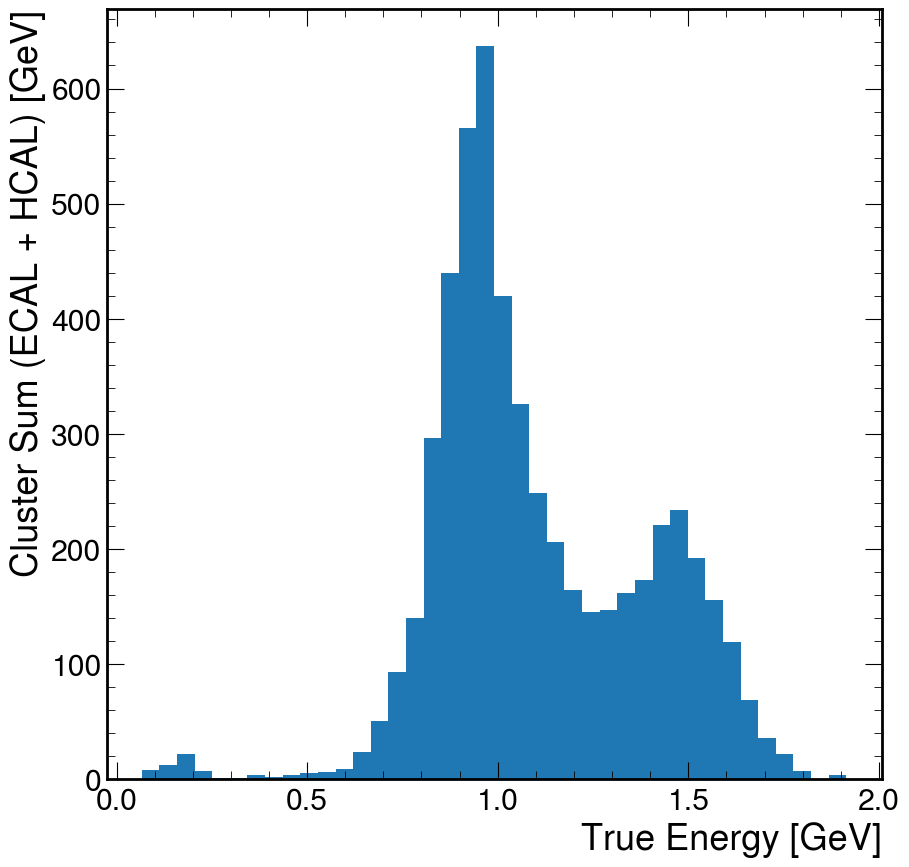

In [45]:
ene_min=17.4
ene_max=22.5
mask = np.logical_and(combined_genP> ene_min, combined_genP< ene_max)
ratio=np.divide(combined_total_energy[mask], combined_genP[mask] )
#plt.scatter(combined_genP[mask], combined_total_energy[mask], alpha=0.1)
#plt.hist(combined_total_energy[mask], bins=40)
plt.hist(ratio, bins=40)
plt.xlabel("True Energy [GeV]")
plt.ylabel("Cluster Sum (ECAL + HCAL) [GeV]")
mean=np.nanmean(ratio)
std=np.nanstd(ratio)
resolution=std/mean
print(resolution)

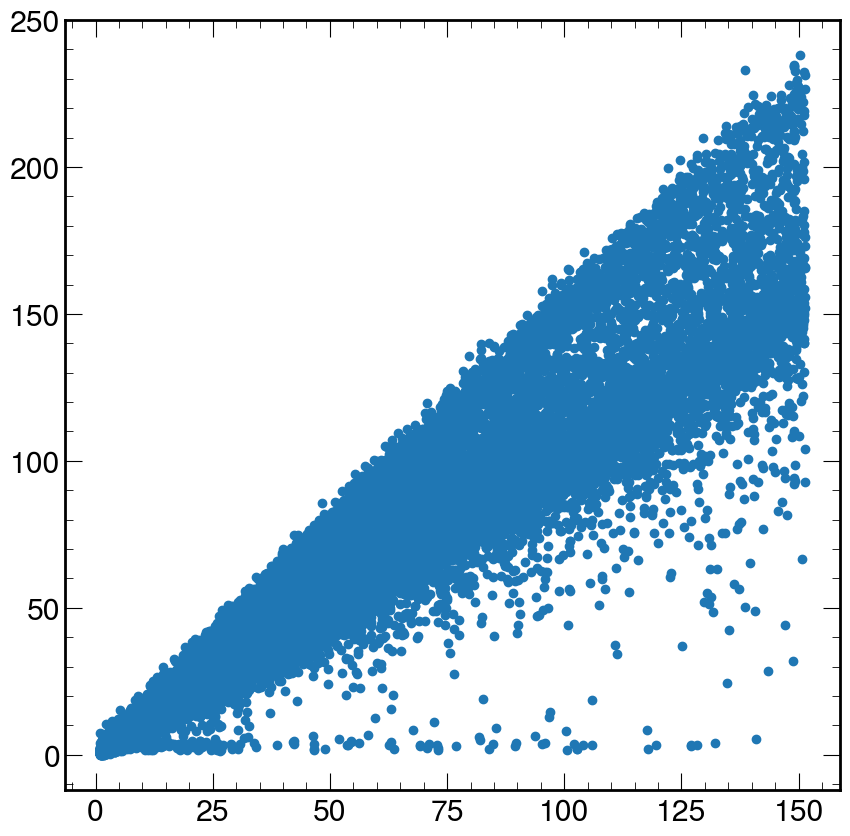

In [27]:
#print(combined_genP)
#plt.hist(combined_genP, bins=20, range=(45, 55))
plt.scatter(combined_genP, combined_total_energy)

   22.947888465656984  29.50805227805434        0.7776822492185882


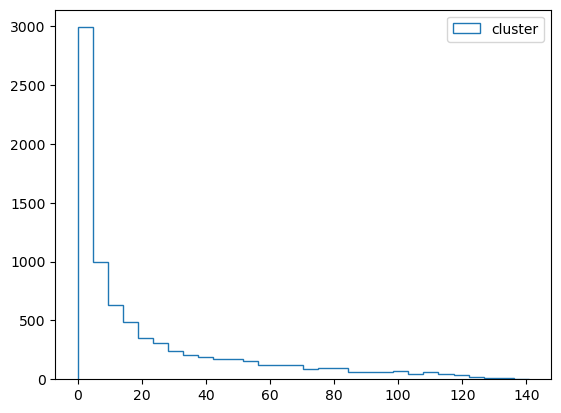

In [42]:
#genP_real=np.unq1ique(np.rint(combined_genP))
#print(genP_real)
#plt.hist(combined_genP, bins=50, histtype='step', label='true')
plt.hist(combined_total_energy, bins=30, histtype='step', label='cluster')
mean_pred=np.mean(combined_total_energy)
mean_truth=np.mean(combined_genP)
#print(combined_genP[0:10])
plt.legend()
sampling_fraction=mean_pred/mean_truth
print('  ',mean_pred, '', mean_truth, '      ', sampling_fraction)

## Now get the fit parameter for Resolution from Strawman

In [31]:
def get_res_scale_fit_log10_log2_local(truth,pred, binning, nbins, data_type, particle, label='energy', fit='True', plot_range=3):   
    N_Bins=len(binning)
    plot_range=3
    FIT_SIGMA=3 ## fit within +- 3 sigma                                                                                                                                                                                                             
    row=math.ceil(np.sqrt(N_Bins-1))
    if (row**2-N_Bins)>1:
        col=row-1
    else:
        col=row

    resolution_arr=[]
    mean_arr=[]
    resolution_cor_arr=[]
    scale_arr=[]
    avg_truth_arr=[]
    slices_arr=[]
    slices_pred_truth_arr=[]
    slices_truth_arr=[]
    scale_median_arr=[]
    
    res_stdev_pred_median_arr=[]
    res_sigma_median_arr=[]
    
    if label=='energy':
        xtitle='$E_{Pred}/E_{Truth}$'
        unit='GeV'
        
    elif label=='theta':
        xtitle='Theta (Deg)'
        unit='Deg'
       
    elif label=='phi':
        xtitle='Phi (Deg)'
        unit='Deg'    
    elif label=='theta-energy':
        xtitle=r'$\Theta_{pred} - \Theta_{true}$' 
        unit='GeV'
        
    elif label=='phi-energy':
        xtitle=r'$\phi_{pred} - \phi_{true}$' 
        unit='GeV'    
       
        
    else:
        print('PLEASE PROVIDE THE VARIABLE YOU WANT TO REGRESS')
        return
    
    #fig,axs = plt.subplots(row,col, figsize=(22, 10),sharex=True,constrained_layout=True)
    fig,axs = plt.subplots(row,col, figsize=(18, 15),sharex=False)#,constrained_layout=True)
    plt.subplots_adjust(wspace=0, hspace=0.3)
    if (len(truth) != len(pred)):
        print("truth and prediction arrays must be same length")
        #return
    if data_type=='discrete':
        truth=np.rint(truth)
    indecies = np.digitize(truth,binning)-1 #Get the bin number each element belongs to.
    indecies=np.where(indecies < 0, 0, indecies)
    #if any(indecies<0): print(indicies)
    max_count = np.bincount(indecies).max()
    slices = np.empty((N_Bins,max_count))
    
    slices_truth=np.empty((N_Bins,max_count))
    slices_truth.fill(np.nan)
    
    #slices_pred_truth=np.empty((N_Bins,max_count))
    #slices_pred_truth.fill(np.nan)
    
    slices.fill(np.nan)
    
    scale_array = np.empty((N_Bins,max_count+1))
    scale_array.fill(np.nan)

    counter = np.zeros(N_Bins,int) #for getting mean from sum, and incrementing element number in bin                                                                
    avg_truth = np.zeros(N_Bins,float)
    pred_over_truth = np.zeros(N_Bins,float)
    xticks=np.linspace(0,100,6)
    one_ytics=round(max_count,-3)## round to thousand                                                                                                                
    yticks=np.linspace(0,one_ytics,6)
    
    #print(binning)
    
    for i in range(len(pred)):
    #for i in range(len(pred)):
        bin = indecies[i]
        if (bin>=N_Bins): continue
        slices[bin][counter[bin]] = pred[i] #slice_array[bin number][element number inside bin] = pred[i]                                                            
        slices_truth[bin][counter[bin]] = truth[i]
        
        avg_truth[bin]+=truth[i]
        if truth[i]<=0:
            print('Hello')
        #    truth[i]=999
        pred_over_truth[bin] += pred[i]/truth[i]
        scale_array[bin][counter[bin]] = pred[i]/truth[i]
        #print(pred[i])
        #print(truth[i])
        counter[bin]+=1
    counter[counter == 0] = 1
    
    #nan_mask=np.isnan(scale_array).any(axis=1)
    #rows_with_nan = np.any(nan_mask, axis=1)
    #print("Rows with NaN values:", rows_with_nan)
    #scale_array=scale_array[~nan_mask]
    avg_truth = avg_truth/counter

    #stdev_pred = np.nanstd(slices,axis=1)
    #avg_pred   = np.nanmean(slices,axis=1)
    
    stdev_pred = np.nanstd(scale_array,axis=1)
    avg_pred   = np.nanmean(scale_array,axis=1)
    
    
    
    #print(avg_pred, '     ',  stdev_pred)
    
    stdev_truth = np.nanstd(slices_truth,axis=1)
    scale_median_comp=np.nanmedian(scale_array,axis=-1)
    median_pred=np.nanmedian(slices,axis=-1)
    #median_scale = np.nanmedian(scale_array,axis=-1)
    #print(avg_pred)
    
    for ii in range(0,N_Bins-1):
        ## guess parameters for fitting                                                                                                                              
        mean_guess=avg_pred[ii]
        sigma_guess=stdev_pred[ii]
        #print(ii,'   mean guess.  ', mean_guess,'  binning ',binning[ii], ' - ', binning[ii+1])
        
        ## min and max range for histogram to be fitted to extract resolution/scale                                                                                  
        min_range=mean_guess - plot_range*sigma_guess
        max_range=mean_guess + plot_range*sigma_guess
        '''
        if label=='energy':
            if min_range<0:
                min_range=0.2
                
        #min_range=-2
        #max_range=2
        print(mean_guess, '  guess value.   ',  sigma_guess)
        
        ## mean value of range within which histogram is draw
  
        '''
        #print(min_range, '      min and max.  ',  max_range)
        irow=int(ii/col)
        icol=int(ii%col)
        
        if irow<row:
            
            ax = axs[irow,icol]
            #count, bins,_=ax.hist(slices[ii].ravel(),bins=nbins,alpha=0.5,range=(min_range,max_range),label='HCAL',color='b',linewidth=8)
            count, bins,_=ax.hist(scale_array[ii].ravel(),bins=nbins,alpha=0.5,range=(min_range,max_range),label='HCAL',color='b',linewidth=8)
            
            count=count[~np.isnan(count)]
            bins=bins[~np.isnan(bins)]
            
            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
            
          
            # PARAMETER BOUNDS ARE NOT USED FOR NOW
            if fit:
                mean, std=gaussian_fit_on_distribution(FIT_SIGMA, sigma_guess, mean_guess, binscenters,  count,ax, min_range, max_range)
                #, binning[i], binning[i+1])
            else:
                mean=np.nanmean(scale_array[ii])
                std=np.nanstd(scale_array[ii])
        
            for_plot=round(avg_truth[ii])
            y_text_val=int(np.max(count))*0.7
            
            if data_type=='continuous':
                ax.set_title("{0:.1f} - {1:.1f} {2} ".format(binning[ii],  binning[ii+1], unit ) , fontsize=15)
            else: 
                ax.set_title("{0} {1}".format(binning[ii], unit), fontsize=15)
        
            
            if ((irow==row-1) & (icol==int(col/2))):
                ax.set_xlabel('{0}'.format(xtitle),fontsize=25) 
    
            if icol==0:
                ax.set_ylabel("Entries",fontsize=15)


            #plt.savefig(file_name)
            #ax.set_xticks(fonstsize=20)
            ax.tick_params(axis='x', labelsize=20)
            ax.tick_params(axis='y', labelsize=14)
            
            #scale_median=scale_median_comp[ii]
            #scale=mean/avg_truth[ii]
            scale=mean
            
            mean_arr.append(mean)
            avg_truth_arr.append(avg_truth[ii])
            #resolution=std
            
            if label=='energy':
                resolution=(std/mean)/scale    #Scale corrected Strawman
                
                #resolution_scale_corr=(stdev_pred[ii]/avg_truth[ii])/scale_median  ## this is std vs median
                #resolution_scale_corrected=np.nan_to_num(resolution_scale_corr)

                #res_stdev_pred_median=stdev_pred[ii]/median_pred[ii]

                #res_sigma_median=std/avg_truth[ii]
                slices_pred_truth=  (slices[ii] - slices_truth[ii])/slices_truth[ii]

                
                
                #resolution_cor_arr.append(resolution_scale_corrected)
                scale_arr.append(scale)
                slices_arr.append(slices[ii])
                
                #scale_median_arr.append(scale_median)


                slices_pred_truth_arr.append(slices_pred_truth)

                #res_stdev_pred_median_arr.append(res_stdev_pred_median)
                #res_sigma_median_arr.append(res_sigma_median)
            elif label=='theta' or label=='phi' or label =='theta-energy' or label =='phi-energy':
                 resolution=std
                
            else:
                print("Please provide the right label like energy or theta")
            resolution_arr.append(resolution)
            
        else:
            continue
            
    if label=='energy' or label=='theta-energy' or label=='phi-energy':      
        return resolution_arr, scale_arr, avg_truth_arr, slices_arr, slices_pred_truth_arr
    else:
        return avg_truth_arr, resolution_arr, scale_arr, mean_arr
    

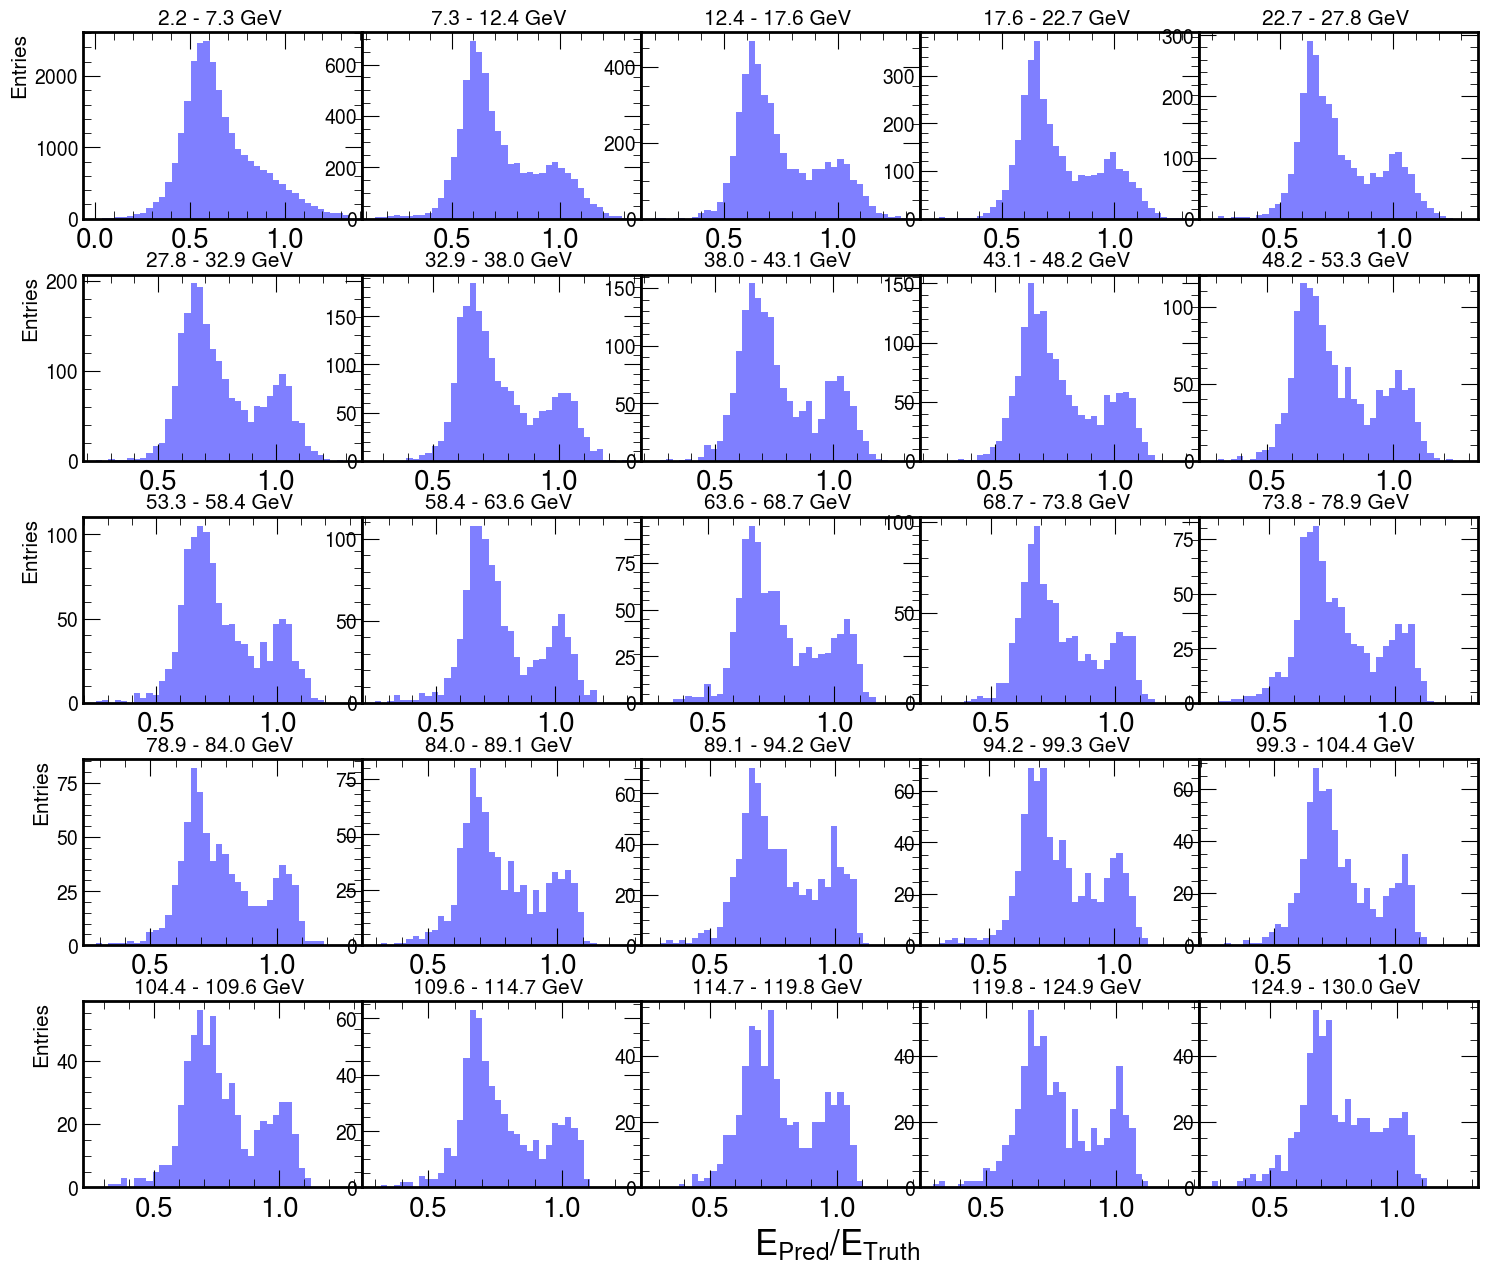

In [32]:
nbins=40
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='continuous'
#data_type='discrete'
particle='pp'

#detector='hcal'
#fit_dist=True
fit_dist=False
min_val=2.22
max_val=130
Nbins=26
if data_type=='discrete':
    binning=[1, 2, 3, 4, 5, 7, 8, 10, 12, 15, 18, 22, 27, 33, 41, 50, 60, 74,90, 109, 133]
elif data_type=='continuous':
    Nbins=26
    binning=np.linspace(min_val, max_val, Nbins)

    
factor=(0.0139/0.0224)*1.10      
combined_total_energy_n= np.multiply(combined_total_energy, factor)
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth, =\
get_res_scale_fit_log10_log2_local(combined_genP,\
            combined_total_energy_n,  binning, nbins,data_type, particle, 'energy', fit_dist, plot_range=0.6)

In [33]:
approach='straw_'
particle_detector=f'ecal_hcal_ECCE_Fit'
#name_tag=f'ds_{output_dim}D_output_'
particle='pp'

true_fit=np.round(true_fit,2)    
print_parameter(true_fit, approach +'energy',particle_detector ) 
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )





straw_energy_ecal_hcal_ECCE_Fit=np. array([  3.17,   9.69,  14.85,  20.04,  25.14,  30.26,  35.4 ,  40.5 ,
        45.57,  50.78,  55.89,  60.85,  66.16,  71.24,  76.25,  81.46,
        86.52,  91.67,  96.79, 101.85, 106.99, 112.09, 117.25, 122.31,
       127.45])
straw_res_fit_ecal_hcal_ECCE_Fit=np. array([0.49569 , 0.36807 , 0.331013, 0.327877, 0.32336 , 0.299758,
       0.281544, 0.296442, 0.297384, 0.27244 , 0.291885, 0.29637 ,
       0.271185, 0.283252, 0.277882, 0.271621, 0.265437, 0.27613 ,
       0.277771, 0.295988, 0.282015, 0.264569, 0.275197, 0.265031,
       0.282735])
straw_scale_median_ecal_hcal_ECCE_Fit=np. array([0.671248, 0.729888, 0.74884 , 0.756633, 0.75853 , 0.773633,
       0.77193 , 0.776325, 0.770256, 0.782826, 0.774026, 0.77417 ,
       0.785979, 0.775975, 0.776483, 0.784657, 0.784334, 0.783166,
       0.781943, 0.767975, 0.773234, 0.773936, 0.778074, 0.78337 ,
       0.76931 ])


[381.8, 383.8, 385.8, 387.8, 389.8, 391.8, 393.8, 395.8, 397.8, 399.8, 401.8, 403.8, 405.8, 407.8, 409.8, 411.8, 413.8, 415.8, 417.8, 419.8, 421.8, 423.8, 425.8, 427.8, 429.8, 431.8, 433.8, 435.8, 437.8, 439.8, 441.8, 443.8, 445.8, 447.8, 449.8, 451.8, 453.8, 455.8, 457.8, 459.8, 461.8, 463.8, 465.8, 467.8, 469.8, 471.8, 473.8, 475.8, 477.8, 479.8, 481.8, 483.8, 485.8, 487.8, 489.8, 491.8, 493.8, 495.8, 497.8, 499.8, 501.8, 503.8, 505.8, 507.8]


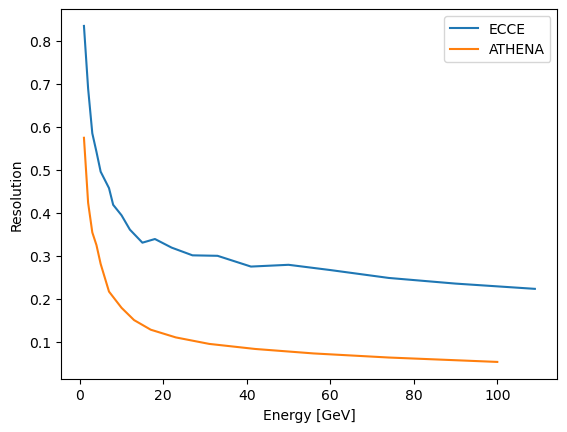

In [18]:

straw_energy_pp_hcal_with_ecal_ECCE=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,
        22.,  27.,  33.,  41.,  50.,  60.,  74.,  90., 109.])
straw_res_fit_pp_hcal_with_ecal_ECCe=np. array([0.835019, 0.689084, 0.585248, 0.541946, 0.495927, 0.457662,
       0.418798, 0.394505, 0.36115 , 0.330729, 0.339248, 0.31924 ,
       0.301292, 0.30019 , 0.275153, 0.279263, 0.267059, 0.248695,
       0.235549, 0.223317])
straw_scale_median_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse=np. array([0.516355, 0.527457, 0.54041 , 0.550053, 0.578339, 0.611647,
       0.62915 , 0.643581, 0.655781, 0.671923, 0.674997, 0.685682,
       0.695717, 0.696998, 0.713752, 0.711439, 0.718427, 0.729927,
       0.736892, 0.742863])

straw_discrete_energy_pp_hcal_with_ecal_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg=np. array([0.5748  , 0.423479, 0.354707, 0.324964, 0.281366, 0.216982,
       0.179239, 0.150666, 0.128259, 0.110343, 0.095243, 0.08347 ,
       0.073066, 0.063552, 0.053316])

plt.errorbar(straw_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse,\
             straw_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse, label='ECCE')

plt.errorbar(straw_discrete_energy_pp_hcal_with_ecal_10_30deg, straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg,\
            label='ATHENA')

plt.ylabel("Resolution")
plt.xlabel("Energy [GeV]")
plt.legend()
width=2.0
z_min=381.8
min_val_z=380
max_val_z=508
z_vals=[]
for i in range(0,64):
    z_value=z_min+(i*width)
    z_vals.append(z_value)
print(z_vals)

In [73]:
z_val_try=np.linspace(380,508,9)
print(z_val_try)

[380. 396. 412. 428. 444. 460. 476. 492. 508.]


## Z layers model prediction

In [37]:
#input_features=4,    output_dim=3
n_z_layers=8
path='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/z_segmentaion_models'
result=f'results_{n_z_layers}Z_seg_size64_lre3_4Lay_pp_mse'
block='Block_20230821_0821_concatTrue'
to_stat=f'preprocessed_data_pp_{n_z_layers}Z_seg'
path_to_stat=f'{path}/{to_stat}/test' 
path_to_result=f'{path}/z_segmentation/{result}/{block}'


def get_3D_inference_from_discrete_data_zseg(path_to_result, path_to_stat, file="test_predictions.npz"):

    npz_unpacked = np.load(f'{path_to_result}/{file}')

    predictions_arr = npz_unpacked['outputs']
    targets_arr = npz_unpacked['targets']

    #means = pickle.load(f"preprocessed_data/means.p")

    means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'), compression='gzip')
    stdvs = pickle.load(open(f"{path_to_stat}/stdvs.p", 'rb'), compression='gzip')
    
    ### True ENERGY
    targets_ene_plt = targets_arr[:,0]*stdvs['genP'] + means['genP']
    #targets_ene_plt = 10**targets_ene

    ### PREDICTED ENERGY
    prediction_ene_plt=predictions_arr[:,0]*stdvs['genP'] + means['genP']
    #prediction_ene_plt=10**prediction_ene


    ### True Theta
    targets_theta= targets_arr[:,1]*stdvs['theta'] + means['theta']


    ### PREDICTED THETA
    predictions_theta=predictions_arr[:,1]*stdvs['theta'] + means['theta']
    #prediction_theta_plt=predictions_theta


    ### True phi
    targets_phi= targets_arr[:,2]*stdvs['phi'] + means['phi']

    ### PREDICTED PHI
    predictions_phi=predictions_arr[:,2]*stdvs['phi'] + means['phi']

    return targets_ene_plt, prediction_ene_plt, targets_theta, predictions_theta, targets_phi, predictions_phi


target_ene, pred_ene, target_theta, pred_theta, target_phi, pred_phi=\
    get_3D_inference_from_discrete_data_zseg( path_to_result, path_to_stat) 

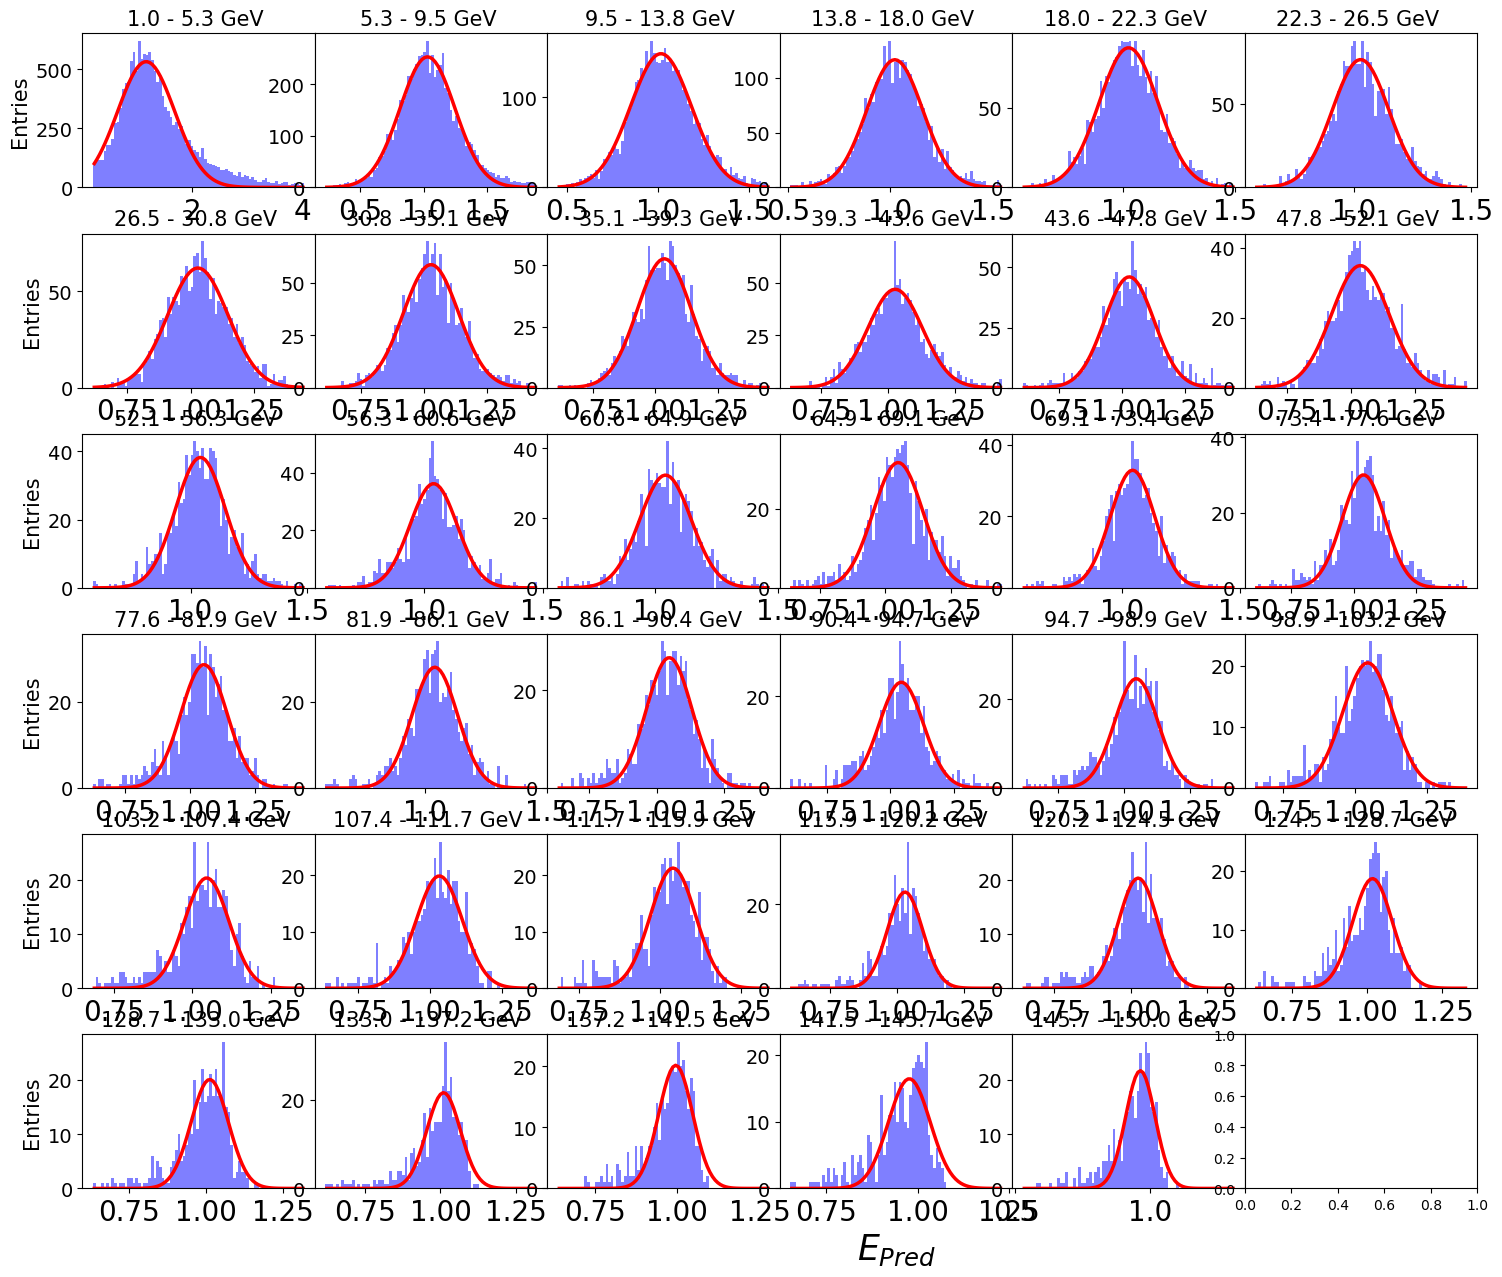

In [38]:
nbins=80
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='continuous'
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=1
max_val=150
Nbins=36
binning=np.linspace(min_val, max_val, Nbins)


#resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,\
#slices_pred_truth,res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(target_ene,pred_ene,
#                                                    binning, nbins,data_type, particle, 'energy', fit_dist)

resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(target_ene,pred_ene, binning, nbins, data_type, particle, 'energy', fit=True, plot_range=0.6)

In [46]:
#input_dim='4D'
hadronic_detector='hcal'
learning_rate='e3'
latent_size=64
error_type='mse'
#particle='pp'
num_layer=4
include_ecal=True
output_dim=3
approach='ds'


particle_detector=f'{particle}_{detector_status}_Input{n_z_layers}Z_Output{output_dim}D_L{num_layer}_lr{learning_rate}_\
size{latent_size}_{error_type}'
    

  
    
print_parameter(true_fit, approach +'energy',particle_detector ) 
#print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 

#print_parameter(res_sigma_median, name_tag +'res_sigma', particle_detector ) 
#print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )

dsenergy_pp_hcal_with_ecal_Input8Z_Output3D_L4_lre3_size64_mse=np. array([  2.699683,   7.210514,  11.520311,  15.799528,  20.113672,
        24.316338,  28.581136,  32.830863,  37.152555,  41.416274,
        45.707541,  49.939546,  54.238495,  58.393817,  62.773327,
        66.96105 ,  71.173589,  75.517573,  79.691419,  83.973813,
        88.282612,  92.471588,  96.644621, 101.00152 , 105.300346,
       109.430201, 113.797166, 118.095156, 122.37102 , 126.606558,
       130.760694, 135.018788, 139.349718, 143.645977, 147.87127 ])
dsres_fit_pp_hcal_with_ecal_Input8Z_Output3D_L4_lre3_size64_mse=np. array([0.380581, 0.204563, 0.162744, 0.130739, 0.124565, 0.113353,
       0.112365, 0.103855, 0.100271, 0.096409, 0.09276 , 0.103511,
       0.098152, 0.091472, 0.096812, 0.086046, 0.086395, 0.080065,
       0.080037, 0.085696, 0.077023, 0.079754, 0.074985, 0.079203,
       0.064821, 0.075202, 0.06437 , 0.062123, 0.061291, 0.063839,
       0.059451, 0.054827, 0.051954, 0.059745, 0.058894])
ds

## ECCE Config, discrete data generation

In [32]:
seed=0.085
binning=[]
for i in range(0,25):
    expo=(i+1)*seed
    value=int (pow(10,expo))
    binning.append(value)
    
binning=np.unique(binning)    
print(binning)    
mean_gen= np.mean(binning)
print('Mean  ', mean_gen, '  log of mean ', np.log10(mean_gen), '. computed = ')

real=10**1.065
print(real)

[  1   2   3   4   5   7   8  10  12  15  18  22  27  33  41  50  60  74
  90 109 133]
Mean   34.476190476190474   log of mean  1.5375192714632275 . computed = 
11.614486138403427


## Inspect the preprocessed data

In [19]:
event_num=1
last_event=event_num+1000
path_to_stat='/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_Fe_zdc'
#path_to_stat='/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_ZDCFe_zseg16'
means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open(f"{path_to_stat}/stdvs.p", 'rb'), compression='gzip')
print(means)
file_data=pickle.load(open(f"{path_to_stat}/data_000.p", 'rb'),compression='gzip')

node_arr=[]
target_arr=[]
cluster_sum=[]
for hits, target, meta in file_data[event_num:last_event]:
    node=hits['nodes'] 
    cluster=hits['globals']
    #print(node)
array_hcal = node[node[:, -1] == 1]    
array_ecal = node[node[:, -1] == 0] 

array_hcal[:, 0]= array_hcal[:, 0] * stdvs['.energy'] +  means['.energy']    
array_hcal[:, 1]= array_hcal[:, 1] * stdvs['.position.z'] +  means['.position.z'] 
array_hcal[:, 2]= array_hcal[:, 2] * stdvs['.position.x'] +  means['.position.x'] 

array_ecal[:, 0]= array_ecal[:, 0] * stdvs['ecal_energy'] +  means['ecal_energy'] 

{'ZDCHcalHitsReco.energy': -2.8189800034994703, '.position.z': 37750.733973582304, '.position.x': -0.5529060045625167, '.position.y': -0.6500783666718388, 'clusterE': 1.603144059420693, 'genP': 1.7376134765625}


FileNotFoundError: [Errno 2] No such file or directory: '/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_Fe_zdc/data_000.p'

In [68]:
print(array_ecal)

[[-1.109250e+03 -3.220230e+03 -3.398466e+00 -1.342664e-02  0.000000e+00]
 [-1.133900e+03 -3.227500e+03 -3.406082e+00 -1.343482e-02  0.000000e+00]]


In [4]:
z_val_try=np.linspace(380,508,3)
central_value=(z_val_try[1:] + z_val_try[:-1])/2
print(z_val_try)
print(central_value)

[380. 444. 508.]
[412. 476.]


## Get total number of entries in given directory

In [67]:
MIP=0.0006 ## GeV
MIP_ECAL=0.13
time_TH=150  ## ns
energy_TH_HCAL=0.5*MIP
energy_TH_ECAL=0.5*MIP_ECAL
NHITS_MIN=2

#data_dir1='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-23-23/'
data_dir2='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10continuous_1GeV-150GeV_10deg-30deg_07-21-23/'

## ATHENA CONFIG
#data_dir2="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_6k_10_30deg_ECAL_discrete/"
#data_dir2="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_10-30-deg_ECAL_updated_1/"
#data_dir2="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_10-30-deg_ECAL_updated_1/\
#reco_pi+_45GeV_theta_10-30deg_pi+_445426_99.edm4hep.root"


ecal_hcal_both=True
hadronic_detector='ecal'
start=0
total_files=1
    

#root_files_total1 = np.sort(glob.glob(data_dir1+'*root'))
#root_files_total2 = np.sort(glob.glob(data_dir2+'*root'))
#file_list=root_files_total[start:total_files]
if hadronic_detector=='hcal':
    detector_name = "HcalEndcapPHitsReco" 
    energy_TH=energy_TH_ECAL 
    
    
elif hadronic_detector=='ecal':    
    detector_name= "EcalEndcapPHitsReco"
    energy_TH=energy_TH_HCAL
total=0
#for file_num in file_list:
    
ur_tree2=ur.open(data_dir2)['events']
#ur_tree2=ur.open(root_files_total2[0])['events']
num_entries=ur_tree2.numentries


last_entry=2000 #num_entries



#print("Total Entries. == ", num_entries)    
#total=total+num_entries
test_variable=['.energy', '.position.x', '.position.y', '.position.z', '.time' ]  
pick_index=0    
max_range=0.05
#hit_raw1 =ur_tree1.array(f'{detector_name}.energy')
#hit_raw2 =ur_tree2.array(f'{detector_name}.energy')
energy =ur_tree2.array(f'{detector_name}{test_variable[pick_index]}', entrystop=last_entry)
time =ur_tree2.array(f'{detector_name}{test_variable[4]}', entrystop=last_entry)


    
    
condition1 = energy> energy_TH
condition2= time < time_TH
condition3=energy < 1e10
combined_mask = condition1 & condition2 & condition3

energy_mask = ak.mask(energy, combined_mask)
mean=ak.mean(energy_mask)
std=ak.std(energy_mask)
norm_energy=(energy_mask - mean )/std
#energy_log=np.log10(energy_mask)
#mask_ecal = (energy > L) & (time_ecal<time_TH) & (energy<1e10)


pos_x= ur_tree2.array(f'{detector_name}{test_variable[1]}', entrystop=last_entry)/10.0
pos_y= ur_tree2.array(f'{detector_name}{test_variable[2]}', entrystop=last_entry)/10.0
pos_z= ur_tree2.array(f'{detector_name}{test_variable[3]}', entrystop=last_entry)
#time2 =ur_tree2.array(f'{detector_name}{test_variable[pick_index]}')  
vari=pos_x
var=ak.mask(vari, combined_mask)

mean_var=ak.mean(var)
std_var=ak.std(var)
print(mean_var)
print(std_var)
print(detector_name, '    ', hadronic_detector)

IsADirectoryError: [Errno 21] Is a directory: '/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10continuous_1GeV-150GeV_10deg-30deg_07-21-23/'

In [109]:
print(detector_name)
print(pos_z)

HcalEndcapPHitsReco
[[3821.5 3844.9 3868.3 ... 4406.5 4383.1 4336.3] [3821.5 3844.9 3868.3 ... 4640.5 4546.9 4125.7] [3821.5 3844.9 3868.3 ... 4055.5 4055.5 4055.5] ... [3844.9 3844.9 3891.7 ... 3844.9 3844.9 3868.3] [3821.5 3844.9 3868.3 ... 4172.5 4195.9 4266.1] [3868.3 4008.7 4032.1 ... 4523.5 4476.7 4500.1]]


## Cell Hit Energy 

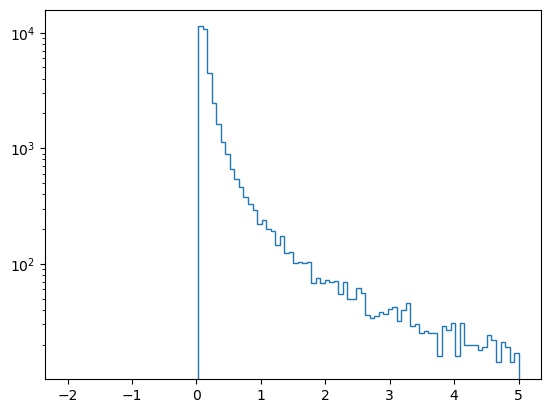

In [58]:
plt.hist(ak.flatten(energy_mask), bins=100, range=(-2, 5), histtype='step')

plt.yscale('log')

In [106]:
print(mean_z, ' mean and std  ', std_z)
fig = plt.figure(figsize=(8, 6))
#plt.hist(ak.flatten(time1), bins=100, range=(0, max_range), histtype='step')
plt.hist(ak.flatten(norm_energy), bins=1000, histtype='step', label='normalized')
plt.hist(ak.flatten(energy_mask), bins=100, range=(-2, 5), histtype='step', label='not normalized')
plt.xlabel("Hit Energy [GeV]")
plt.yscale("log")
plt.xlim(-1,2)
plt.legend()
mean=ak.mean(energy_mask)
print(mean)

#HCAL. 0.004109451665857775  mean and std   0.010914807653760098

#X -8.009810791871057   115.42598918237985
#Y 1.45760336370007      123.00081239299472

SyntaxError: invalid syntax (1919713354.py, line 15)

In [128]:
10**-2.547545195422934

0.002834358656902897

##  Cell Position X

Text(0.5, 0, 'Position X [cm]')

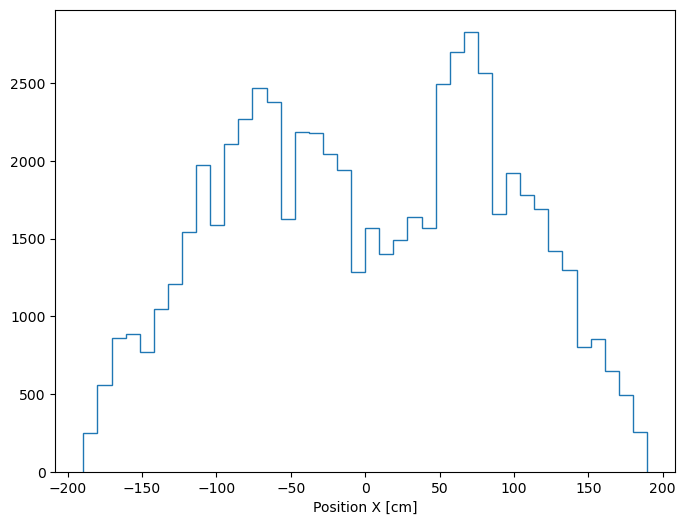

In [111]:
fig = plt.figure(figsize=(8, 6))
plt.hist(ak.flatten(pos_x), bins=40 , histtype='step')
plt.xlabel("Position X [cm]")

##  Cell Position Y

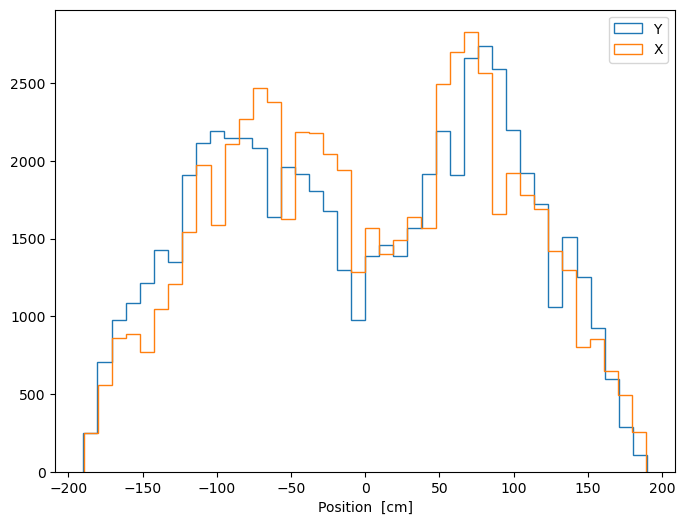

In [112]:
fig = plt.figure(figsize=(8, 6))
plt.hist(ak.flatten(pos_y), bins=40,  histtype='step', label='Y')
plt.hist(ak.flatten(pos_x), bins=40,  histtype='step', label='X')
plt.xlabel("Position  [cm]")
plt.legend()

##  Cell Position Z

In [70]:
'''
fig = plt.figure(figsize=(8, 6))
plt.hist(ak.flatten(pos_z), bins=40,  histtype='step')
plt.xlabel("Position Z [cm]")

print('Total events ',total) 
plt.legend()
'''
print(np.max(ak.flatten(pos_z)))
distinct_zval=np.unique(ak.flatten(pos_z))

371.5


In [71]:
## /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_6k_10_30deg_ECAL_discrete
print(pos_z[0:6])

for sublist in pos_z:
    for value in sublist:
        if value > 508:
            print(value)

[[371.5 371.5 371.5 ... 371.5 371.5 371.5] [371.5 371.5 371.5 ... 371.5 371.5 371.5] [371.5 371.5 371.5 ... 371.5 371.5 371.5] [371.5 371.5 371.5 ... 371.5 371.5 371.5] [371.5 371.5 371.5 ... 371.5 371.5 371.5]]


In [39]:
print(distinct_zval[0:200])
print(len(distinct_zval))

[382, 384, 387, 389, 392, 394, 396, 399, ..., 494, 497, 499, 501, 504, 506, 509]
55


In [92]:
z_centers= np.linspace(380,509, 6 )
print(z_centers)
z_val=(z_centers[1:]+z_centers[:-1])/2.

[380.  405.8 431.6 457.4 483.2 509. ]


[396.125 428.375 460.625 492.875]


In [89]:
#2.0+ 0.3+0.04 =382.15 
0.15 + 0.04 + 2.0 +0.15 
def z_seg_ATHENA(nseg):
    vall=[]
    absorber=2.0
    scintillator=0.3
    z_min=380.0
    air=0.04
    
    for i in range(0,55):
        if i==0:
            total_thickness=2.15
        else:
            total_thickness=2.34
        val=z_min + total_thickness*i
        vall.append(val)
        
        
def z_seg_ECCE(nseg):
    vall=[]
    absorber=1.6
    scintillator=0.3
    z_min=380.0
    air=0.04
    
    for i in range(0,55):
        if i==0:
            total_thickness=2.15
        else:
            total_thickness=2.34
        val=z_min + total_thickness*i
        vall.append(val)        
print(vall)    

[382.15, 384.48999999999995, 386.83, 389.16999999999996, 391.51, 393.84999999999997, 396.19, 398.53, 400.87, 403.21, 405.54999999999995, 407.89, 410.22999999999996, 412.57, 414.90999999999997, 417.25, 419.59, 421.92999999999995, 424.27, 426.60999999999996, 428.95, 431.28999999999996, 433.63, 435.96999999999997, 438.30999999999995, 440.65, 442.98999999999995, 445.33, 447.66999999999996, 450.01, 452.34999999999997, 454.68999999999994, 457.03, 459.37, 461.71, 464.04999999999995, 466.39, 468.72999999999996, 471.06999999999994, 473.40999999999997, 475.75, 478.09, 480.42999999999995, 482.77, 485.10999999999996, 487.45, 489.78999999999996, 492.13, 494.46999999999997, 496.80999999999995, 499.15, 501.48999999999995, 503.83, 506.16999999999996, 508.51]


[[5.737301e-04 3.871111e+03]
 [1.094971e-02 3.871111e+03]
 [3.759766e-03 3.871111e+03]
 [4.225464e-02 3.871111e+03]]


In [33]:
z_sec=55
z_section=z_sec+1
for i in range(0,z_section):
    #print(i, '   ', i*2.34+380)

SyntaxError: unexpected EOF while parsing (3043926698.py, line 4)

In [29]:

z=np.linspace(start,end, z_section)
print(z)

NameError: name 'z_section' is not defined

In [62]:
## THINK N Z LAYERS = HOW MANY CENTRAL VALUES
## N Z LAYERS = 1, ONLY TWO EXTREME VALUES
## N Z LAYER =2, TWO EXTREMW VALUE + 1 
#new_z_seg=3
how_many_central_value=5
n_Z_layers= how_many_central_value+1
factor=int(z_sec/new_z_seg)
print(factor)
z_new=np.linspace(start,end, n_Z_layers)
print(z_new)
z_centers=([1:] + z_new[:-1])/2
print(z_centers)

18
[380.   405.74 431.48 457.22 482.96 508.7 ]
[392.87 418.61 444.35 470.09 495.83]


In [34]:
def get_z_edges(start, end, n_Z_layers):
    n_Z_layers=n_Z_layers+1
    n_z_layers=np.linspace(start, end, n_Z_layers)
    return n_z_layers

start=380
end=508.7
z_layers=get_z_edges(start, end, 11)
z_centers=(z_layers[1:] + z_layers[:-1])/2
print(z_centers)
print(z_layers)

[385.85 397.55 409.25 420.95 432.65 444.35 456.05 467.75 479.45 491.15
 502.85]
[380.  391.7 403.4 415.1 426.8 438.5 450.2 461.9 473.6 485.3 497.  508.7]


In [87]:
column_means = np.mean(data, axis=0)
column_stds = np.std(data, axis=0)
column_stds[column_stds == 0] = 1


In [87]:
1.31225586e-03 + 1.26342778e-03  + 5.00488270e-04  + 3.66210938e-04 + 6.95190439e-03 

0.010394287238

## Piyush result


In [26]:
################# ECCE STRAWMAN WITH AND WITHOUT FITTING THE PARAMETER 
straw_energy_ecal_hcal_ECCE_notFit=np. array([  3.106829,   9.458223,  14.670711,  19.81594 ,  24.957291,
        30.078601,  35.218579,  40.382643,  45.429281,  50.607098,
        55.748154,  60.768461,  66.008439,  71.097675,  76.159823,
        81.342805,  86.452566,  91.617762,  96.726429, 101.799973,
       106.918247, 112.026762, 117.185078, 122.352978, 127.447309])

straw_res_fit_ecal_hcal_ECCE_notFit=np. array([0.336119, 0.254256, 0.227318, 0.226276, 0.218089, 0.205398,
       0.199659, 0.199185, 0.198225, 0.18949 , 0.196598, 0.194898,
       0.194327, 0.192281, 0.194713, 0.188557, 0.180066, 0.183329,
       0.192622, 0.203182, 0.195309, 0.184287, 0.190353, 0.176846,
       0.195394])


straw_scale_median_ecal_hcal_ECCE_noFit=np. array([0.670363, 0.727534, 0.749657, 0.754757, 0.760521, 0.768621,
       0.769081, 0.777659, 0.775   , 0.778106, 0.776763, 0.776513,
       0.7807  , 0.779203, 0.774792, 0.787724, 0.785127, 0.783127,
       0.779572, 0.766219, 0.773283, 0.77158 , 0.776419, 0.77952 ,
       0.769626])
#straw_scale_median_ecal_hcal_ECCE_notFit=np. array([0.982089, 1.065844, 1.098255, 1.105726, 1.114171, 1.126037,
#       1.126711, 1.139278, 1.135383, 1.139932, 1.137966, 1.137599,
#       1.143733, 1.14154 , 1.135078, 1.154024, 1.150219, 1.147289,
#       1.142081, 1.122518, 1.132867, 1.130372, 1.137462, 1.142004,
#       1.127509])

straw_energy_ecal_hcal_ECCE_Fit=np. array([  3.106829,   9.458223,  14.670711,  19.81594 ,  24.957291,
        30.078601,  35.218579,  40.382643,  45.429281,  50.607098,
        55.748154,  60.768461,  66.008439,  71.097675,  76.159823,
        81.342805,  86.452566,  91.617762,  96.726429, 101.799973,
       106.918247, 112.026762, 117.185078, 122.352978, 127.447309])
straw_res_fit_ecal_hcal_ECCE_Fit=np. array([0.270365, 0.180114, 0.162301, 0.142122, 0.15461 , 0.145706,
       0.14032 , 0.140846, 0.146055, 0.19778 , 0.14223 , 0.118349,
       0.133687, 0.15096 , 0.159412, 0.199519, 0.193771, 0.201206,
       0.197018, 0.15909 , 0.194836, 0.13484 , 0.192954, 0.187275,
       0.19172 ])
straw_scale_median_ecal_hcal_ECCE_Fit=np. array([0.874822, 0.9256  , 0.957614, 0.963251, 0.986368, 0.99665 ,
       0.995935, 1.007398, 1.016723, 1.064973, 1.029242, 1.023455,
       1.024868, 1.045474, 1.045832, 1.101087, 1.100347, 1.09902 ,
       1.103484, 1.058349, 1.097419, 1.039152, 1.108191, 1.095209,
       1.103882])

#####################################################

straw_discrete_energy_pp_hcal_with_ecal_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg=np. array([0.5748  , 0.423479, 0.354707, 0.324964, 0.281366, 0.216982,
       0.179239, 0.150666, 0.128259, 0.110343, 0.095243, 0.08347 ,
       0.073066, 0.063552, 0.053316])
straw_discrete_scale_median_pp_hcal_with_ecal_10_30deg=np. array([0.604453, 0.634241, 0.653127, 0.681595, 0.717147, 0.762174,
       0.789358, 0.807832, 0.822634, 0.836532, 0.852265, 0.865178,
       0.877904, 0.887713, 0.895942])



ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([0.132504, 0.16347 , 0.146986, 0.117995, 0.107497, 0.092505,
       0.086217, 0.077024, 0.067624, 0.063765, 0.054861, 0.05084 ,
       0.045406, 0.043488, 0.036342])
ds_scale_median_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([1.161978, 0.975009, 0.99517 , 0.999129, 0.999003, 0.997085,
       0.99127 , 0.995905, 0.99209 , 0.992178, 0.996025, 0.996372,
       0.994097, 0.996587, 0.996023])



## ECCE CONFIG
straw_energy_pp_hcal_with_ecal_ECCE=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,
        22.,  27.,  33.,  41.,  50.,  60.,  74.,  90., 109.])
straw_res_fit_pp_hcal_with_ecal_ECCE=np. array([0.835019, 0.689084, 0.585248, 0.541946, 0.495927, 0.457662,
       0.418798, 0.394505, 0.36115 , 0.330729, 0.339248, 0.31924 ,
       0.301292, 0.30019 , 0.275153, 0.279263, 0.267059, 0.248695,
       0.235549, 0.223317])



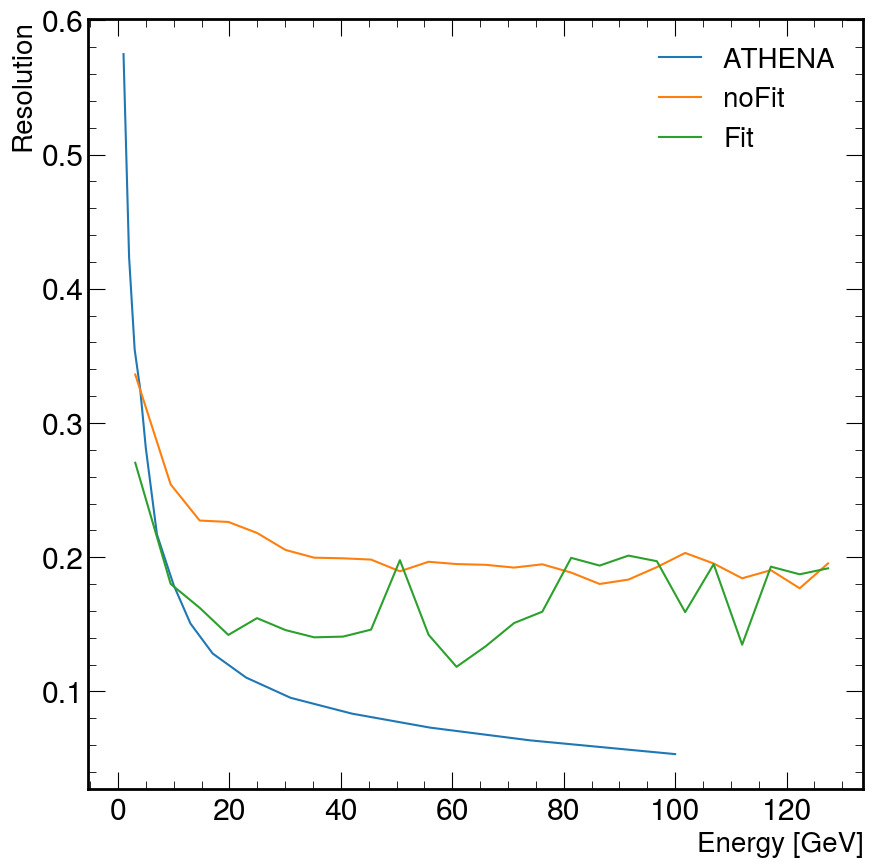

In [27]:
straw_energy_pp_hcal_with_ecal_ECCE=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  18.,
        22.,  27.,  33.,  41.,  50.,  60.,  74.,  90., 109.])
straw_res_fit_pp_hcal_with_ecal_ECCe=np. array([0.835019, 0.689084, 0.585248, 0.541946, 0.495927, 0.457662,
       0.418798, 0.394505, 0.36115 , 0.330729, 0.339248, 0.31924 ,
       0.301292, 0.30019 , 0.275153, 0.279263, 0.267059, 0.248695,
       0.235549, 0.223317])
straw_scale_median_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse=np. array([0.516355, 0.527457, 0.54041 , 0.550053, 0.578339, 0.611647,
       0.62915 , 0.643581, 0.655781, 0.671923, 0.674997, 0.685682,
       0.695717, 0.696998, 0.713752, 0.711439, 0.718427, 0.729927,
       0.736892, 0.742863])

straw_discrete_energy_pp_hcal_with_ecal_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg=np. array([0.5748  , 0.423479, 0.354707, 0.324964, 0.281366, 0.216982,
       0.179239, 0.150666, 0.128259, 0.110343, 0.095243, 0.08347 ,
       0.073066, 0.063552, 0.053316])

#plt.errorbar(straw_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse,\
#             straw_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse, label='ECCE')

plt.errorbar(straw_discrete_energy_pp_hcal_with_ecal_10_30deg, straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg,\
            label='ATHENA')
plt.errorbar(straw_energy_ecal_hcal_ECCE_notFit, straw_res_fit_ecal_hcal_ECCE_notFit, label='noFit')
plt.errorbar(straw_energy_ecal_hcal_ECCE_Fit, straw_res_fit_ecal_hcal_ECCE_Fit, label='Fit')
#straw_scale_median_ecal_hcal_ECCE_notFit
plt.ylabel("Resolution", fontsize=20)
plt.xlabel("Energy [GeV]", fontsize=20)
plt.legend(fontsize=20)

## STRAWMAN USING the ECCE

Baseline
Deepset 1D
Deepset 2D
Deepset 4D
Graphnet 4D
[0.670363 0.727534 0.749657 0.754757 0.760521 0.768621 0.769081 0.777659
 0.775    0.778106 0.776763 0.776513 0.7807   0.779203 0.774792 0.787724
 0.785127 0.783127 0.779572 0.766219 0.773283 0.77158  0.776419 0.77952
 0.769626]


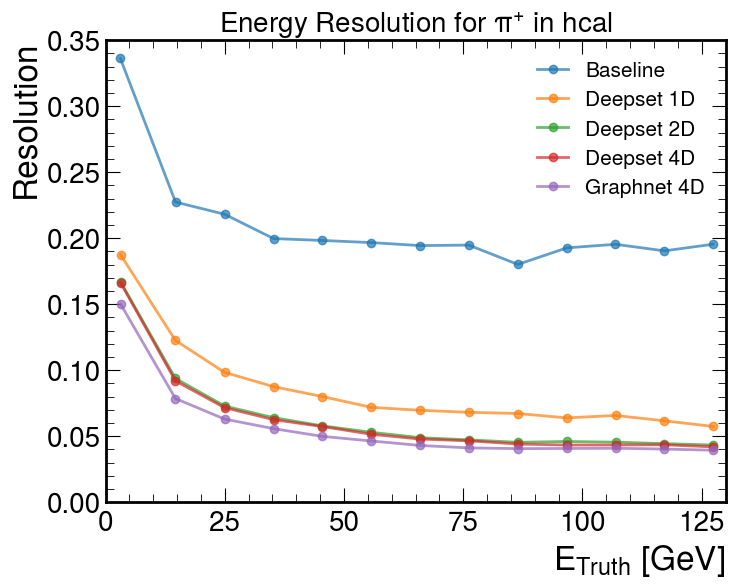

[0.982089 1.065844 1.098255 1.105726 1.114171 1.126037 1.126711 1.139278
 1.135383 1.139932 1.137966 1.137599 1.143733 1.14154  1.135078 1.154024
 1.150219 1.147289 1.142081 1.122518 1.132867 1.130372 1.137462 1.142004
 1.127509]


Baseline
Deepset 1D
Deepset 2D
Deepset 4D
Graphnet 4D


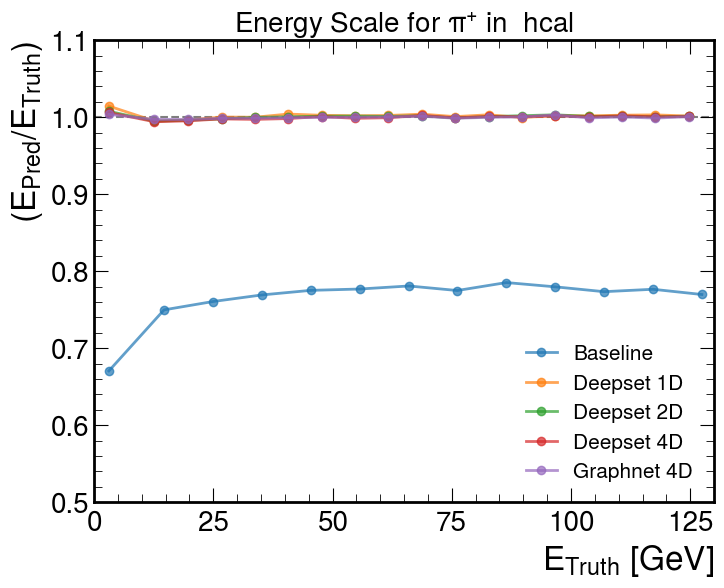

## Using ATHENA DATA Only for STRAWMAN

Strawman
Deepset 1D
Deepset 2D
Deepset 4D
Graphnet 4D


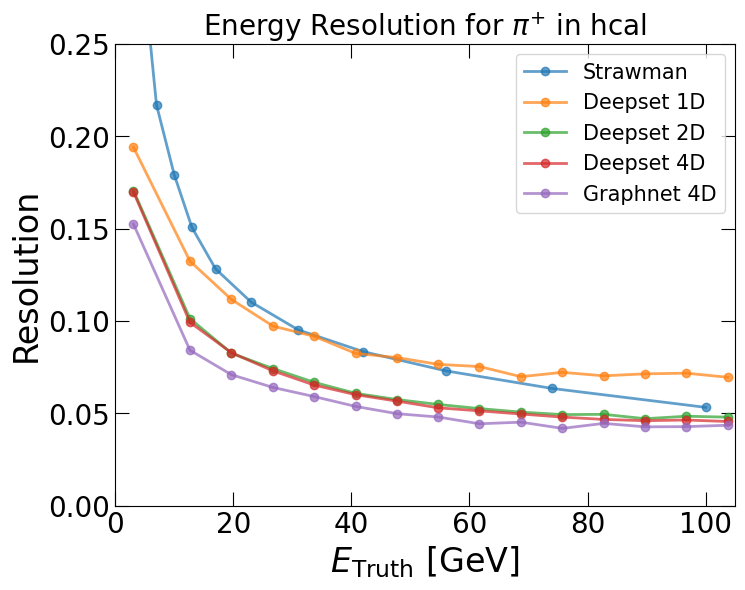

In [119]:
energy_min=2
energy_max=105

step=2
#[::step]
mask=np.logical_and(ds_energy_1D_piyush>energy_min, ds_energy_1D_piyush<energy_max)

#labels=[  'Deepset 1D' ,"Deepset 2D", 'Deepset 4D', 'Graphnet 4D']
labels=[ "Strawman", 'Deepset 1D' ,"Deepset 2D", 'Deepset 4D', 'Graphnet 4D']# "CALICE (Uncorrected)", \
       # "CALICE (Uncorrected)" ]
#straw_discrete_energy_pp_hcal_with_ecal_10_30deg, straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg, straw_discrete_scale_median_pp_hcal_with_ecal_10_30deg
var_X=[ straw_discrete_energy_pp_hcal_with_ecal_10_30deg,
       ds_energy_1D_piyush[mask][::step], \
       ds_energy_2D_piyush[mask][::step],  ds_energy_4D_piyush[mask][::step], graph_energy_4D_piyush[mask][::step],
 ]


var_Y_res=[straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg, 
        ds_res_fit_1D_piyush[mask][::step], ds_res_fit_2D_piyush[mask][::step], ds_res_fit_4D_piyush[mask][::step],
           graph_res_fit_4D_piyush[mask][::step],
            res_calice_uncorr_pm, res_calice_corr_pm
          
]

var_Y_scale=[straw_scale_median_ecal_hcal_ECCE_notFit,
            ds_scale_median_1D_piyush[mask][::step], ds_scale_median_2D_piyush[mask][::step],
            ds_scale_median_4D_piyush[mask][::step], graph_scale_median_4D_piyush[mask][::step],
            ]



particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,105]
ylim_max=[0.0,0.25]
draw_plot_res_scale(var_X[0:], var_Y_res[0:], labels[0:], title,  xlim_max, ylim_max, particle, detector, 'upper right')



## Comparsion with ECCE and CALICE PIYUSH DATA

CALICE (Uncorrected)
CALICE (Corrected)
Deepset 4D
Graphnet 4D
Strawman


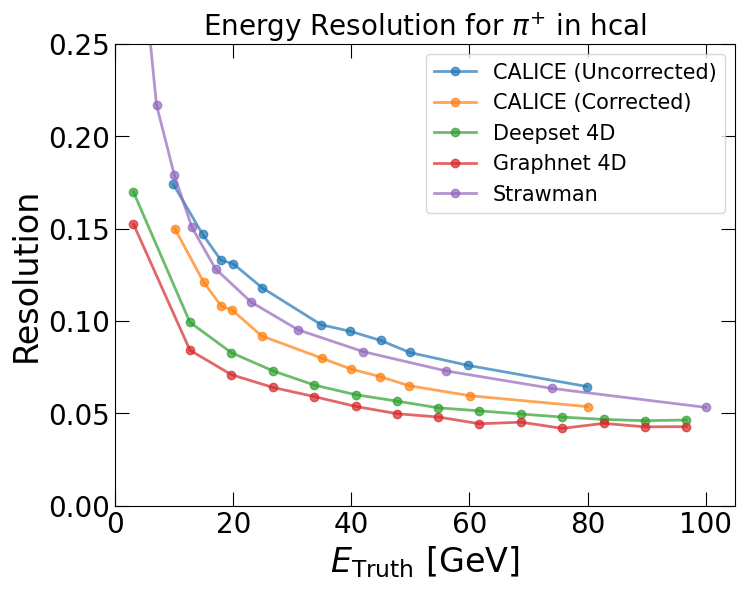

In [129]:
energy_min=2
energy_max=100

step=2
#[::step]
mask=np.logical_and(ds_energy_1D_piyush>energy_min, ds_energy_1D_piyush<energy_max)

#labels=[  'Deepset 1D' ,"Deepset 2D", 'Deepset 4D', 'Graphnet 4D']
labels=[ "CALICE (Uncorrected)", \
        "CALICE (Corrected)",'Deepset 4D', 'Graphnet 4D',  "Strawman"]
'''
#straw_discrete_energy_pp_hcal_with_ecal_10_30deg, straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg, straw_discrete_scale_median_pp_hcal_with_ecal_10_30deg
var_X=[straw_energy_pp_hcal_with_ecal_ECCE, ds_energy_4D_piyush[mask][::step],\
       graph_energy_4D_piyush[mask][::step],
 ene_calice_uncorr_pm, ene_calice_corr_pm]


var_Y_res=[straw_res_fit_pp_hcal_with_ecal_ECCE, 
         ds_res_fit_4D_piyush[mask][::step],
           graph_res_fit_4D_piyush[mask][::step],
            res_calice_uncorr_pm, res_calice_corr_pm
          
]
'''



var_X=[ene_calice_uncorr_pm, 
       ene_calice_corr_pm, 
       ds_energy_4D_piyush[mask][::step],\
       graph_energy_4D_piyush[mask][::step],
       straw_discrete_energy_pp_hcal_with_ecal_10_30deg,
         ]


var_Y_res=[res_calice_uncorr_pm, 
           res_calice_corr_pm,
           ds_res_fit_4D_piyush[mask][::step], 
            graph_res_fit_4D_piyush[mask][::step],
           straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg
            ]




particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,105]
ylim_max=[0.0,0.25]
draw_plot_res_scale(var_X[0:], var_Y_res[0:], labels[0:], title,  xlim_max, ylim_max, particle, detector, 'upper right')


## Use Electron for sampling fraction 

In [10]:
### ECCE DISCRETE 
#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-23-23/'

### ECCE DISCRETE  HCAL. ONLY#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_only_pi+_log10continuous_1GeV-150GeV_10deg-30deg_08-16-23/'
data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10continuous_1GeV-150GeV_10deg-30deg_07-21-23/\
hadron_endcap_reco_pi+_log10continuous_1GeV-150GeV_theta_10deg-30deg_674241_60.edm4hep.root'
### ECCE CONTINUOUS
#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_only_ele_fixedE_40GeV_17deg_08-23-23/'

### ECCE DISCRETE 
#data_dir='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_6k_10_30deg_ECAL_discrete/' 
#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-23-23/\
#hadron_endcap_reco_pi+_discrete_1GeV-150GeV_theta_10deg-30deg_747827_106.edm4hep.root'

## ePIC Configuration wiht 500 events
##data_dir="/media/miguel/Elements/ECCE_HCAL/try_epic_ecal500Event/"

#data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_only_ele_fixedE_40GeV_17deg_08-23-23/'

ecal_hcal_both=False
hadronic_detector='hcal'
start=0
total_files=11

def get_cell_hit(detector, file_name, last_entry):
    gen_energy_arr=[]
    hit_e_arr=[]
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        sampling_fraction= 1 #0.0224 #0.0327 #0.0224   #0.0139 #  0.0224 #(ATHENA CONFIG 0.0224  
        MIP_TH=MIP_TH_HCAL
         

    elif detector =='ecal':
        detector_name= "EcalEndcapPHitsReco"
        sampling_fraction=1.
        MIP_TH=MIP_TH_ECAL
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
    ur_tree=ur.open(data_dir)['events']
    num_entries=ur_tree.numentries   
    hit_raw =ur_tree.array(f'{detector_name}.energy', entrystop=last_entry )
    time =ur_tree.array(f'{detector_name}.time', entrystop=last_entry)
    condition1 = hit_raw > MIP_TH
    condition2= time < time_TH
    condition3= hit_raw < 1e10
    combined_mask = condition1 & condition2 & condition3

    hit_e = hit_raw #ak.mask(hit_raw, combined_mask)
    #mask = (ak.num(hit_raw) > MIP_TH) & (ak.num(time) < time_TH) & (ak.num(hit_raw) < 1e10)
    #hit_e=hit_raw[mask]
        
    PosRecoX_hcal = ur_tree.array(f'{detector_name}.position.x')/10.0
    PosRecoY_hcal = ur_tree.array(f'{detector_name}.position.y')/10.0
    PosRecoZ_hcal = ur_tree.array(f'{detector_name}.position.z')/10.0

  

  
    #cluster_sum_temp = ak.to_numpy(cluster_raw)
    #cluster_sum=np.divide(cluster_sum_temp,sampling_fraction)
    #print(sampling_fraction, 'Xxxxxxxxxxxxx')
    #cluster_sums.append(cluster_sum)
    return hit_e,  PosRecoX_hcal ,  PosRecoY_hcal,  PosRecoZ_hcal  

nentries=5
hit_e,  PosRecoX_hcal ,  PosRecoY_hcal,  PosRecoZ_hcal  = get_cell_hit(hadronic_detector, data_dir, nentries)


In [11]:
z_sec_discrete=np.unique(ak.flatten(PosRecoZ_hcal))

In [12]:
print(z_sec_discrete)

[382, 384, 386, 388, 390, 392, 394, 396, ..., 496, 498, 500, 502, 504, 506, 508]


In [ ]:
discrete = [382, 384, 386, 388, 390, 392, 394, 396, ..., 496, 498, 500, 502, 504, 506, 508]

## Get cluster sum

In [20]:
def get_cluster_sum_from_hits_local(detector, ur_tree, last_entry):
    gen_energy_arr=[]
    hit_e_arr=[]
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        sampling_fraction= 1 #0.0224 #0.0327 #0.0224   #0.0139 #  0.0224 #(ATHENA CONFIG 0.0224  
        MIP_TH=MIP_TH_HCAL
         

    elif detector =='ecal':
        detector_name= "EcalEndcapPHitsReco"
        sampling_fraction=1.
        MIP_TH=MIP_TH_ECAL
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
       
    hit_raw =ur_tree.array(f'{detector_name}.energy', entrystop=last_entry )
    time =ur_tree.array(f'{detector_name}.time', entrystop=last_entry)
    condition1 = hit_raw > MIP_TH
    condition2= time < time_TH
    condition3= hit_raw < 1e10
    combined_mask = condition1 & condition2 & condition3

    hit_e = hit_raw #ak.mask(hit_raw, combined_mask)
    #mask = (ak.num(hit_raw) > MIP_TH) & (ak.num(time) < time_TH) & (ak.num(hit_raw) < 1e10)
    #hit_e=hit_raw[mask]
        
    PosRecoX_hcal = ur_tree.array(f'{detector_name}.position.x')/10.0
    PosRecoY_hcal = ur_tree.array(f'{detector_name}.position.y')/10.0
    PosRecoZ_hcal = ur_tree.array(f'{detector_name}.position.z')/10.0

  

  
    #cluster_sum_temp = ak.to_numpy(cluster_raw)
    #cluster_sum=np.divide(cluster_sum_temp,sampling_fraction)
    #print(sampling_fraction, 'Xxxxxxxxxxxxx')
    #cluster_sums.append(cluster_sum)
    return hit_e,  PosRecoX_hcal ,  PosRecoY_hcal,  PosRecoZ_hcal      



## READS ROOT FILES FROM LARGE SET OF DATA
## FOR GIVEN DATA DIRECTORY AND HADRONIC DETECTOR IT GIVES TOTAL CLUSTER SUM AND HCAL SUM
## IF FLAG det_Ecal is True, then it also gives sum of HCAL + ECAL
        
def read_root_files_chain_local(data_dir, hadronic_detector, start,total_files, ecal_hcal_both=True):
   
    root_files_total = np.sort(glob.glob(data_dir+'*root'))
    file_list=root_files_total[start:total_files]
        
    genP=[]
    cluster_sums_hcal=[]
    cluster_sums_ecal=[]
    tot_energy=[]
    thetas=[]
    total=0
    for file_num in file_list:
        #print(file_num)
        ur_tree=ur.open(file_num)['events']
        num_entries=ur_tree.numentries
        
        #print("Total Entries. == ", num_entries)
        total=total+num_entries
        
        last_entry= 500 #num_entries/ #10
        genPx = ur_tree.array('MCParticles.momentum.x', entrystop=last_entry )[:,2]
        genPy = ur_tree.array('MCParticles.momentum.y', entrystop=last_entry )[:,2]
        genPz = ur_tree.array('MCParticles.momentum.z', entrystop=last_entry )[:,2]
        mass = ur_tree.array("MCParticles.mass", entrystop=last_entry)[:,2]
        root_gen_P = np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
        gen_energy=np.sqrt(root_gen_P**2 + mass**2)
        theta = np.arccos(genPz/root_gen_P)*180/np.pi
        genE=np.unique(np.round(gen_energy,0))
        result = ', '.join(map(str, genE))
        print(result)
        '''
        cluster_sum_hcal= get_cluster_sum_from_hits_local(hadronic_detector, ur_tree, last_entry)
        if ecal_hcal_both:
            cluster_sum_ecal= get_cluster_sum_from_hits_local('ecal', ur_tree, last_entry)
            total_clust_energy = cluster_sum_hcal +  cluster_sum_ecal
            cluster_sums_ecal.append(cluster_sum_ecal)
                   
        else:
            total_clust_energy = cluster_sum_hcal
            
        cluster_sums_hcal.append(cluster_sum_hcal)  
        
        genP.append(gen_energy)
        thetas.append(theta)

        tot_energy.append(total_clust_energy)
        '''
    '''    
    #print(cluster_sums_hcal.shape)
    combined_cluster_sums_hcal= np.concatenate(cluster_sums_hcal)   
    combined_genP = np.concatenate(genP)
    combined_thetas=np.concatenate(thetas)
    
    combined_total_energy=np.concatenate(tot_energy)
    
    if ecal_hcal_both:
        combined_cluster_sums_ecal= np.concatenate(cluster_sums_ecal)
        return combined_genP, combined_thetas, combined_cluster_sums_hcal,  combined_cluster_sums_ecal, combined_total_energy 
    else:
        combined_cluster_sums_ecal=combined_cluster_sums_hcal ## if there is not ecal then hcal = ecal for easy ness
        return combined_genP, combined_thetas, combined_cluster_sums_hcal,  None, combined_total_energy
    '''
    print(total)
data_dir='/media/miguel/Elements/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-23-23/'
start=0
total_files=1
        
#combined_genP_ele, combined_thetas_ele, combined_cluster_sums_hcal_ele,  combined_cluster_sums_ecal, combined_total_energy_ele=\
read_root_files_chain_local(data_dir, hadronic_detector, start,total_files, ecal_hcal_both) 


1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 18.0, 22.0, 27.0, 33.0, 41.0, 50.0, 60.0, 74.0, 90.0, 109.0, 133.0
5000


In [21]:
binning_ECCE=[1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 18.0, 22.0, 27.0, 33.0, \
              41.0, 50.0, 60.0, 74.0, 90.0, 109.0, 133.0]
bin_len=len(binning_ECCE)
print(bin_len)

21


0.5618684879848652


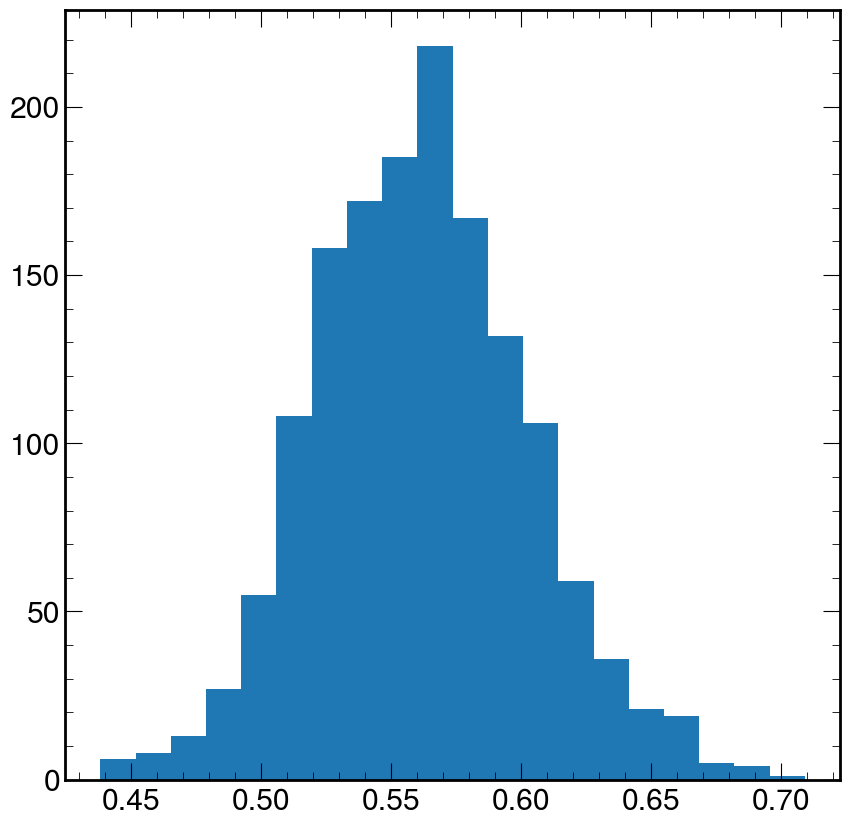

In [82]:
plt.hist(combined_cluster_sums_hcal_ele, bins=20)
mean=np.mean(combined_cluster_sums_hcal_ele)
print(mean)

0.014046712193117025  40.00000001852278


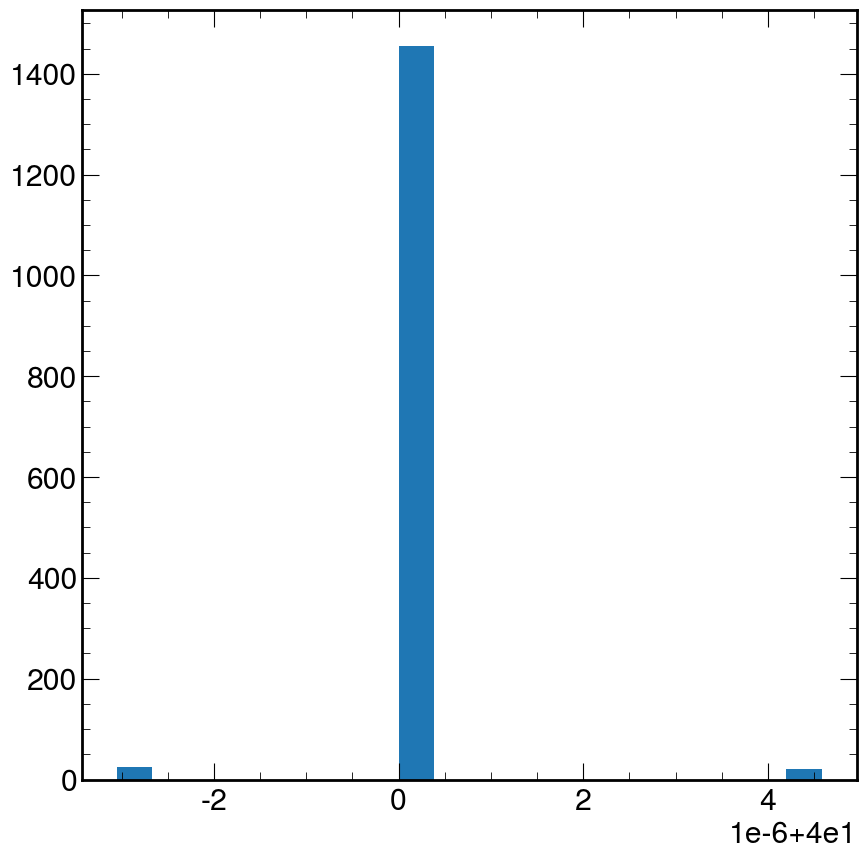

In [78]:
plt.hist(combined_genP_ele, bins=20)
mean_gen=np.mean(combined_genP_ele)
print(mean/mean_gen, '', mean_gen)

<ErrorbarContainer object of 3 artists>

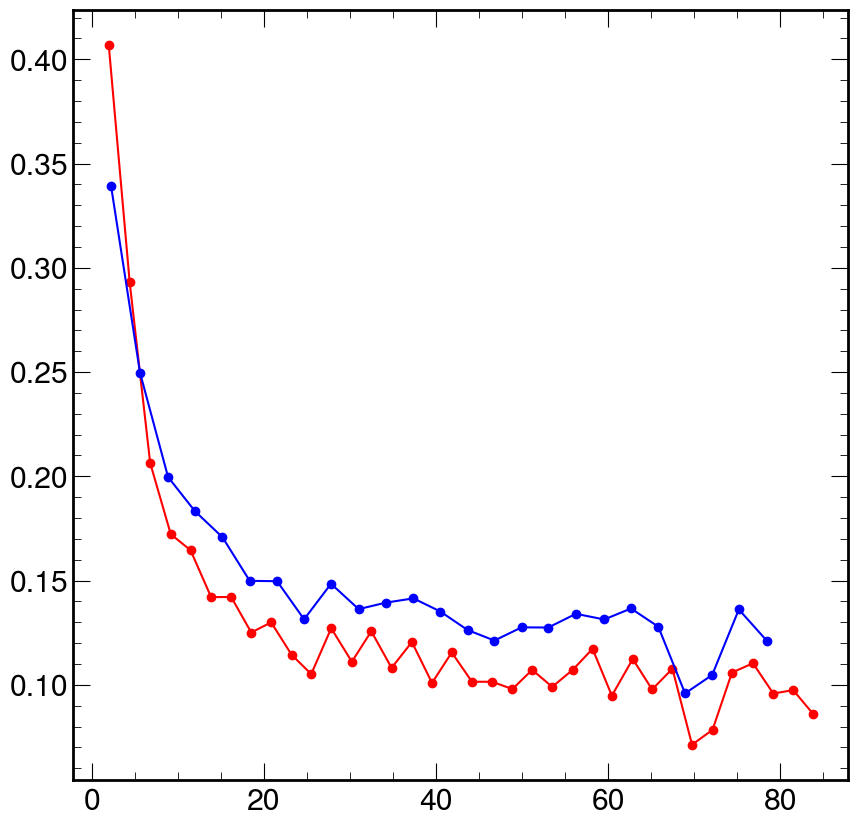

In [36]:







straw_energy_calice_Fe=np. array([ 2.22,  5.58,  8.84, 11.97, 15.16, 18.33, 21.51, 24.65, 27.78,
       30.99, 34.16, 37.36, 40.49, 43.65, 46.77, 49.93, 53.03, 56.25,
       59.53, 62.65, 65.82, 68.93, 72.08, 75.18, 78.51])
straw_res_fit_calice_Fe=np. array([0.339019, 0.249679, 0.199647, 0.183275, 0.170817, 0.149895,
       0.149727, 0.131462, 0.148506, 0.13634 , 0.139457, 0.141494,
       0.135187, 0.126329, 0.121275, 0.127602, 0.127517, 0.134103,
       0.131379, 0.136643, 0.127907, 0.095946, 0.104759, 0.136177,
       0.120822])
straw_scale_median_calice_Fe=np. array([0.933018, 1.007163, 1.059373, 1.071546, 1.085962, 1.096347,
       1.089391, 1.102419, 1.1033  , 1.091744, 1.111905, 1.093787,
       1.105452, 1.101876, 1.095386, 1.116034, 1.119266, 1.119715,
       1.113338, 1.085343, 1.114397, 1.137569, 1.136042, 1.104791,
       1.108309])

plt.errorbar(straw_energy_calice_Fe1, straw_res_fit_calice_Fe1, color='r', marker='o')
plt.errorbar(straw_energy_calice_Fe, straw_res_fit_calice_Fe, color='b',  marker='o')

In [ ]:
def get_pred_1D(data_gen_test):
    for graph_data_test, targets_test in get_batch(data_gen_test.generator()):
            losses_test, output_test = val_step(graph_data_test, targets_test)

            test_loss.append(losses_test.numpy())
            targets_test = targets_test.numpy()
            #output_test = output_test.numpy().reshape(-1)

            output_test_scaled = 10**(output_test*stdvs_dict['genP'] + means_dict['genP'])
            targets_test_scaled = 10**(targets_test*stdvs_dict['genP'] + means_dict['genP'])

            all_targets.append(targets_test)
            all_outputs.append(output_test)
            all_targets_scaled.append(targets_test_scaled)
            all_outputs_scaled.append(output_test_scaled)
            if (i<4):
                print(output_test.shape, '  shapes   ', targets_test.shape )
            if not (i)%100:
                end = time.time()
                print('Iter: {:03d}, Test_loss_curr: {:.4f}, Test_loss_mean: {:.4f}'. \
                      format(i, test_loss[-1], np.mean(test_loss)), end='  ')
                print('Took {:.3f} secs'.format(end-start))
                start = time.time()

            i += 1

(2.0, 90.0)

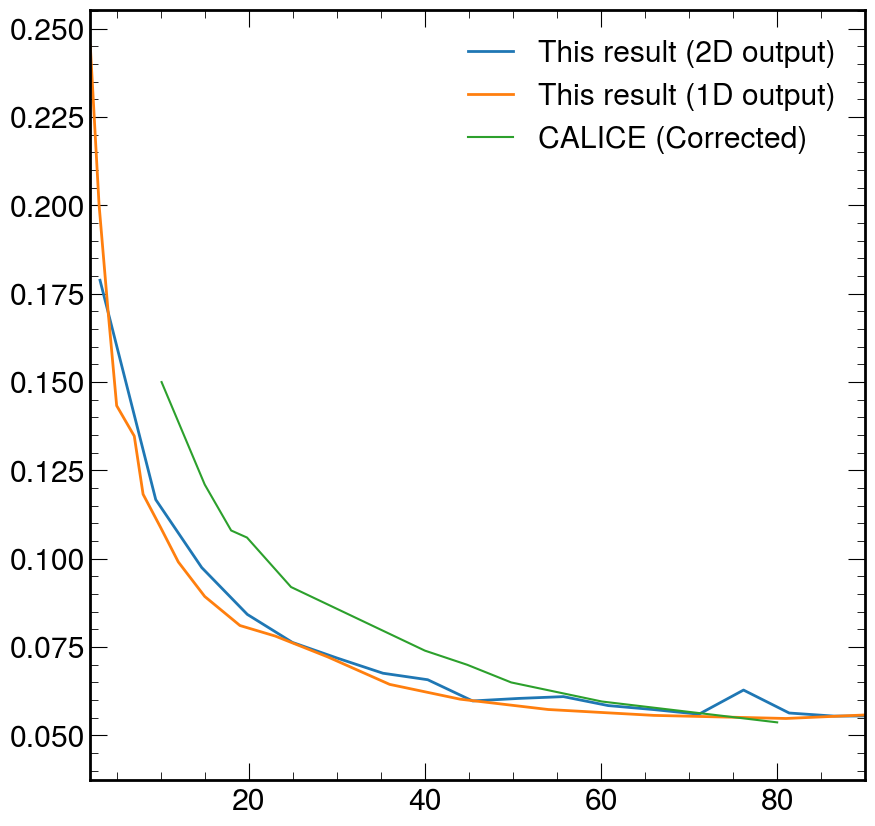

In [13]:
ds_energy_Input4D_2D=np. array([  3.11,   9.44,  14.66,  19.84,  24.95,  30.06,  35.24,  40.32,
        45.42,  50.64,  55.73,  60.81,  65.94,  71.11,  76.18,  81.36,
        86.46,  91.6 ,  96.74, 101.8 , 106.94, 112.01, 117.21, 122.34,
       127.5 ])
ds_res_fit_Input4D_2D=np. array([0.178806, 0.116725, 0.097506, 0.084244, 0.076334, 0.071875,
       0.067604, 0.065767, 0.059763, 0.060474, 0.060984, 0.058449,
       0.057329, 0.056008, 0.062841, 0.056348, 0.055473, 0.05553 ,
       0.057747, 0.056921, 0.056195, 0.052088, 0.058084, 0.047389,
       0.060569])
ds_scale_median_Input4D_2D=np. array([1.010093, 0.989375, 0.997212, 0.999049, 1.001131, 1.002034,
       0.999659, 1.002301, 1.000694, 1.000811, 1.001988, 1.002958,
       1.003733, 1.005496, 1.005337, 1.006746, 1.012704, 1.010466,
       1.007814, 1.00894 , 1.006517, 1.003016, 0.99947 , 1.003683,
       0.993866])

ds_energy_calice_Fedis_try=np. array([  1.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  12.,  15.,  19.,
        23.,  29.,  36.,  44.,  54.,  66.,  81.,  98., 120.])
ds_res_fit_calice_Fedis_try=np. array([0.13852 , 0.24548 , 0.200248, 0.170773, 0.143326, 0.134712,
       0.118264, 0.108813, 0.099094, 0.089329, 0.081104, 0.078126,
       0.072189, 0.064448, 0.06026 , 0.057339, 0.055674, 0.0548  ,
       0.056687, 0.054403])
ds_scale_median_calice_Fedis_try=np. array([1.259423, 0.930573, 0.96828 , 0.984156, 0.989253, 0.994203,
       0.99087 , 0.991304, 0.99927 , 0.99555 , 0.996384, 1.001946,
       1.00284 , 1.0023  , 1.001465, 1.001094, 1.003411, 1.00529 ,
       1.005082, 1.004378])
### CALICE CORRECTED GLOBAL SC
ene_calice_corr_pm=[10.1, 15.0, 18.0, 19.8, 24.8, 35.1, 40.0, 44.8, 49.8, 60.1, 80.0]
res_calice_corr_pm=[0.150, 0.121, 0.108, 0.106, 0.0920, 0.0798, 0.0740, 0.0700, 0.0650, 0.0596, 0.0537]
plt.errorbar(ds_energy_Input4D_2D,ds_res_fit_Input4D_2D , linewidth=2, label='This result (2D output)' )
plt.errorbar(ds_energy_calice_Fedis_try, ds_res_fit_calice_Fedis_try, linewidth=2, label='This result (1D output)' )
plt.errorbar(ene_calice_corr_pm, res_calice_corr_pm, label='CALICE (Corrected)')
plt.legend()
plt.xlim(2, 90)

In [22]:
import numpy as np

# Sample data (replace this with your actual data)
data = np.array([[1.0, 2.0, 3.0, 4.0],
                 [5.0, 6.0, 7.0, 8.0],
                 [9.0, 10.0, 11.0, 12.0]])

# Take the natural logarithm (base e) of the first column
log_first_column = np.log10(data[:, 0])

# Create a new array with the logarithmic values and the original values from the other columns
new_data = np.column_stack((log_first_column, data[:, 1:]))

print(new_data)

[[ 0.        2.        3.        4.      ]
 [ 0.69897   6.        7.        8.      ]
 [ 0.954243 10.       11.       12.      ]]


In [21]:
np.log10(5.0)

0.6989700043360189